In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.set()  # Use seaborn style

# # List of cities
# cities = ["Berlin", "Hamburg", "Munich", "Cologne", "Frankfurt", "Dresden", "Stuttgart"]

# dfs = []

# # Load DataFrames
# for city in cities:
#     df = pd.read_csv(f"../../data/actual_weather_by_city/{city}.csv", delimiter=",")
#     df = df.set_index("date")
#     df = df.drop(columns=["idx"], errors="ignore")  # Ignore errors if 'idx' doesn't exist
#     dfs.append(df)

# # Setup grid dimensions
# ncols = len(cities)
# nrows = max(len(df.columns) for df in dfs)  # Rows based on max columns across all DataFrames
# fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 3))  # Adjust figsize

# # Flatten axs for flexible iteration if nrows or ncols == 1
# if nrows == 1 or ncols == 1:
#     axs = axs.flatten()

# # Plot density charts using matplotlib
# import numpy as np
# from scipy.stats import gaussian_kde

# for i, (df, city) in enumerate(zip(dfs, cities)):
#     for j, (col_name, data) in enumerate(df.items()):
#         ax = axs[j, i] if nrows > 1 and ncols > 1 else axs[i + j]  # Handle indexing for axs
        
#         # Filter out NaN values
#         clean_data = data.dropna()
        
#         # Compute density using Gaussian KDE
#         density = gaussian_kde(clean_data, bw_method=1.25) if col_name == "Precipitation (rain/snow)" else gaussian_kde(clean_data)
#         xs = np.linspace(clean_data.min(), clean_data.max(), 300)
#         ax.plot(xs, density(xs), color="blue")  # Matplotlib density plot
        
#         # Set title and labels
#         ax.set_title(f"{city} - {col_name}") if not col_name == "Precipitation (rain/snow)" else ax.set_title(f"{city} - {col_name} - bandwidth scaling (x1.25)")
#         ax.set_xlabel(col_name)


# plt.tight_layout()
# plt.show()


In [27]:
# rows = 9
# fig, axs = plt.subplots(rows, figsize=(15, 30))
# mean_weather_df = pd.read_csv(f"../../data/germany_weather_average.csv", delimiter=",")
# mean_weather_df = mean_weather_df.set_index("date")
# mean_weather_df = mean_weather_df.drop(columns=["idx"], errors="ignore")

# describe = []
# for i, (cols_name, data) in enumerate(mean_weather_df.items()):
#     print(cols_name)
#     describe.append(data.describe())
#     density = gaussian_kde(data, bw_method=2.8) if cols_name == "Precipitation (rain/snow)" else gaussian_kde(data)
#     xs = np.linspace(data.min(), data.max(), 300)
#     axs[i].plot(xs, density(xs), color="blue")  # Matplotlib density plot
    
#     y_pos = (rows - i - 0.5) / rows
#     fig.text(0.0, y_pos, cols_name, ha='right', va='center', rotation=45, fontsize=13)
# fig.tight_layout()
# plt.show()
# print(describe)

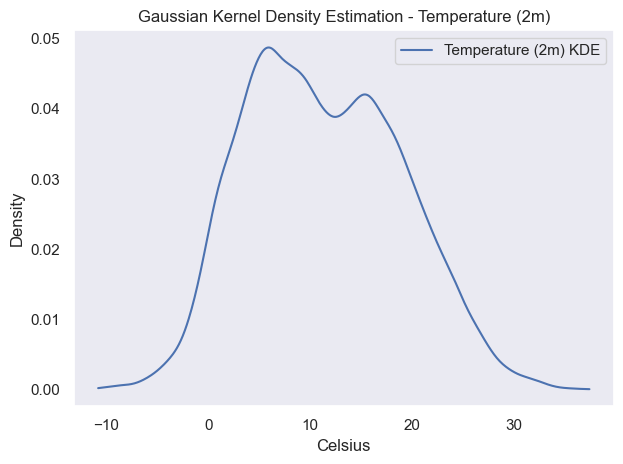

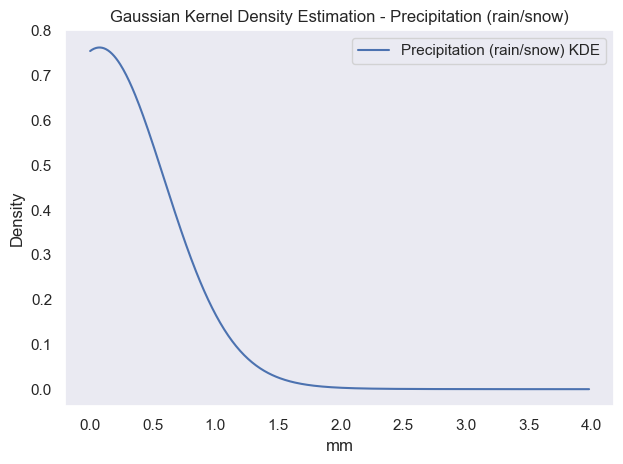

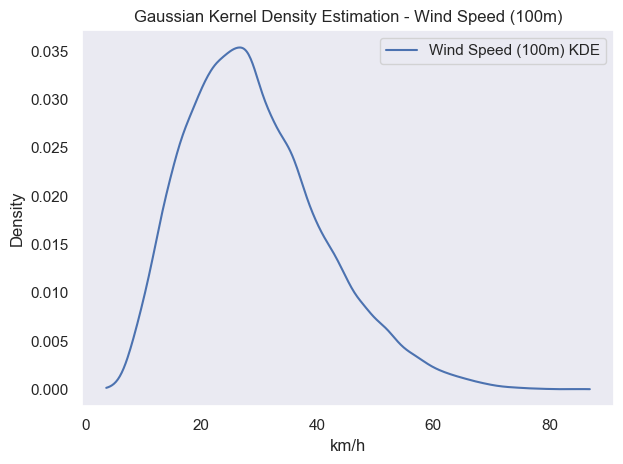

KeyError: 'Global Horizontal Irradiance'

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

sns.set()
# Define columns and units
cols = ["temperature_2m", "Precipitation (rain/snow)", "wind_speed_100m", "Global Horizontal Irradiance"]
col_units = ["Celsius", "mm", "km/h", "W/m²"]
col_rename = ["Temperature (2m)", "Precipitation (rain/snow)", "Wind Speed (100m)", "Global Horizontal Irradiance"]

# Read the data
df = pd.read_csv("../data/germany_weather_average.csv", delimiter=",")

# Loop through columns and plot KDE
for col, unit, rename in zip(cols, col_units, col_rename):

    # Extract data
    data = df[col].dropna()  # Drop NaNs to avoid issues

    # Compute KDE with different bandwidth for precipitation
    bw_method = 2.8 if col == "Precipitation (rain/snow)" else None
    density = gaussian_kde(data, bw_method=bw_method)

    # Create a range of values for plotting KDE
    x_range = np.linspace(data.min(), data.max(), 500)
    density_values = density(x_range)

    # Plot the KDE line
    plt.plot(x_range, density_values, label=f'{rename} KDE')

    # Labeling the plot
    plt.xlabel(unit)
    plt.ylabel("Density")
    plt.title(f"Gaussian Kernel Density Estimation - {rename}")
    plt.legend()
    plt.grid()
    plt.tight_layout()

    # Show the plot
    plt.show()


# Energy Mix (Legacy)

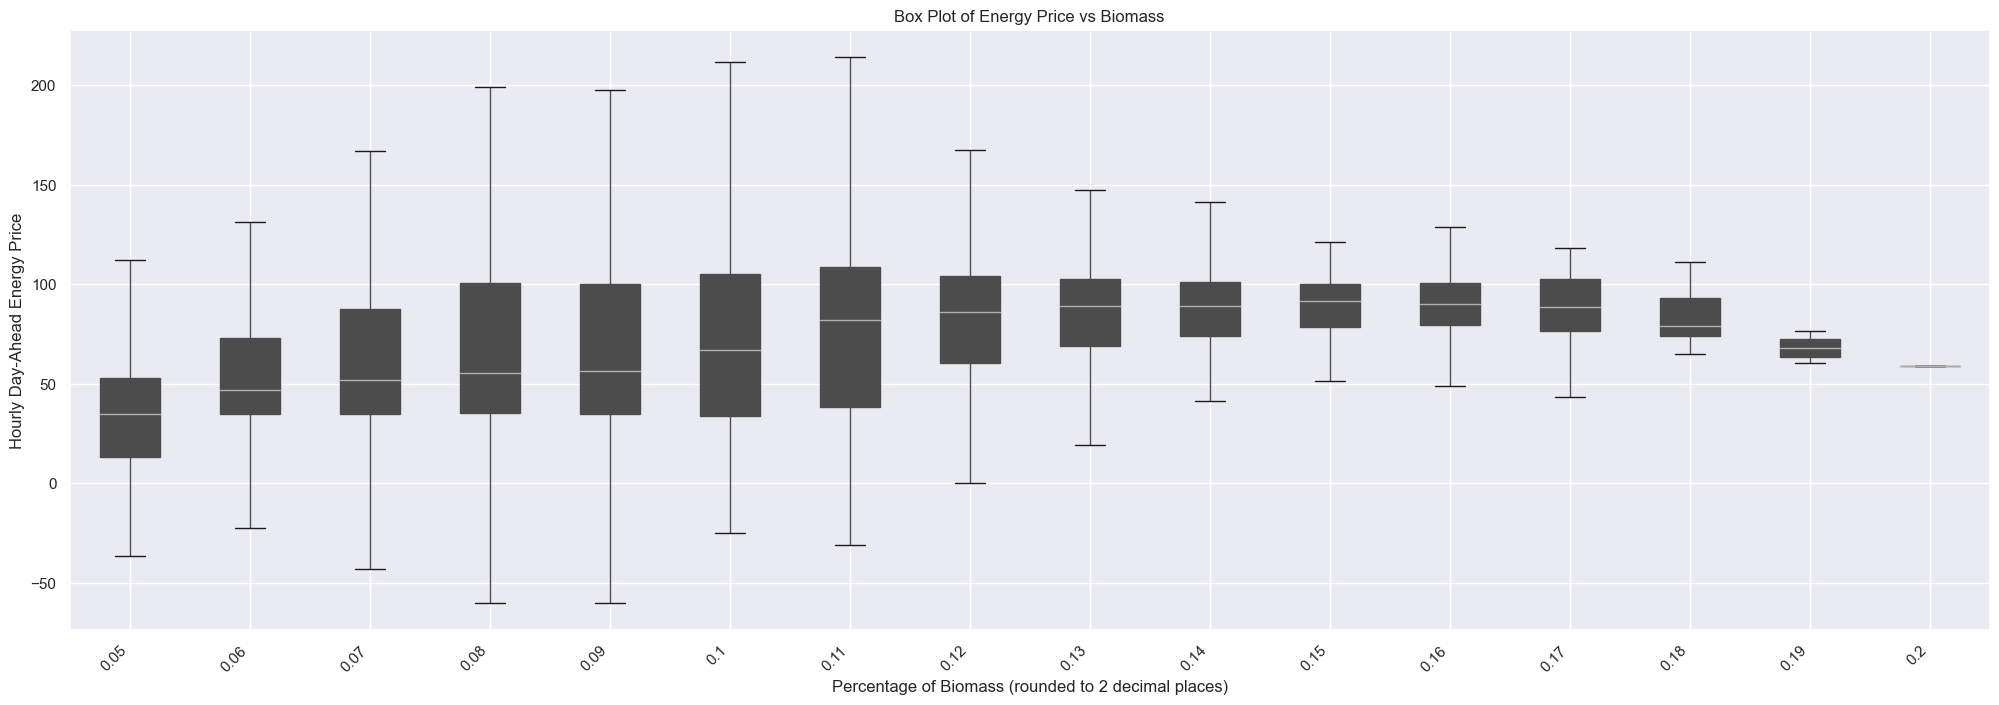

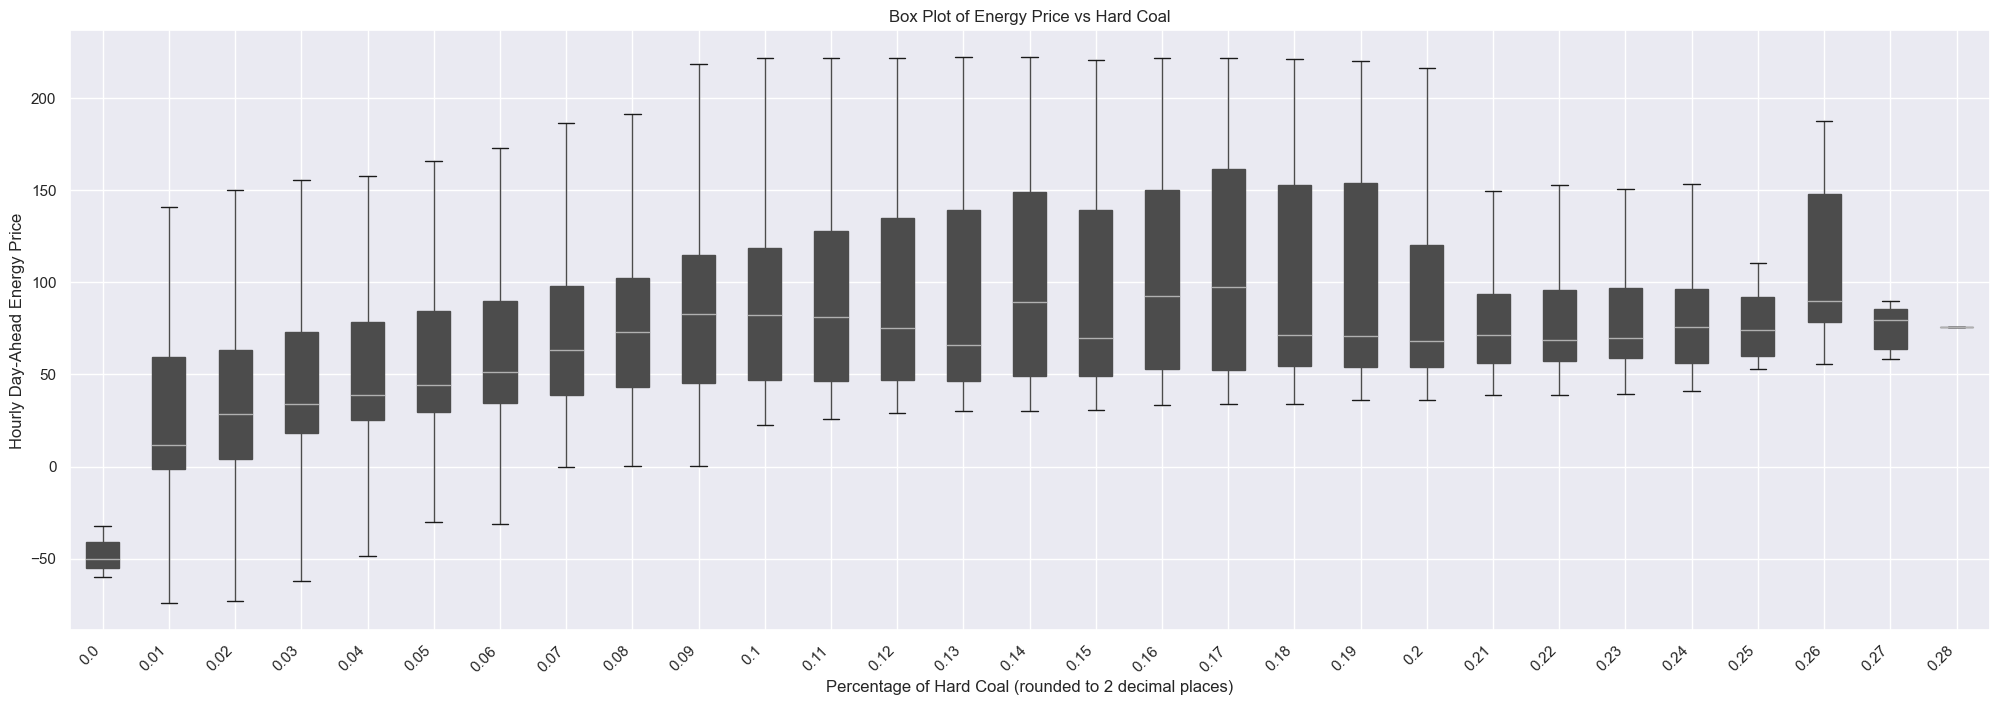

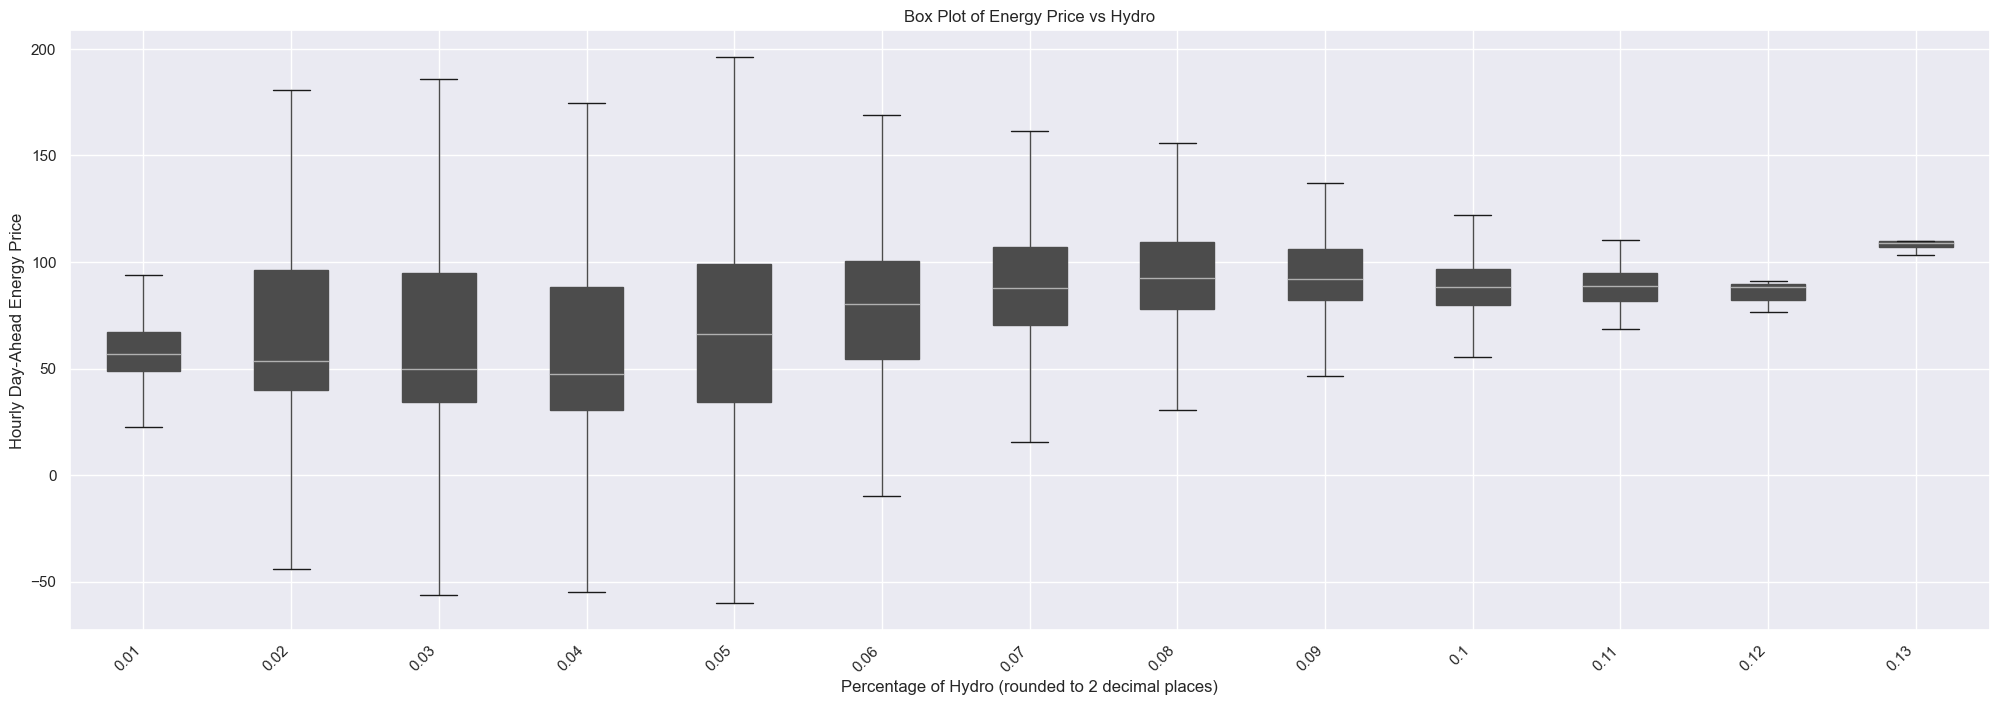

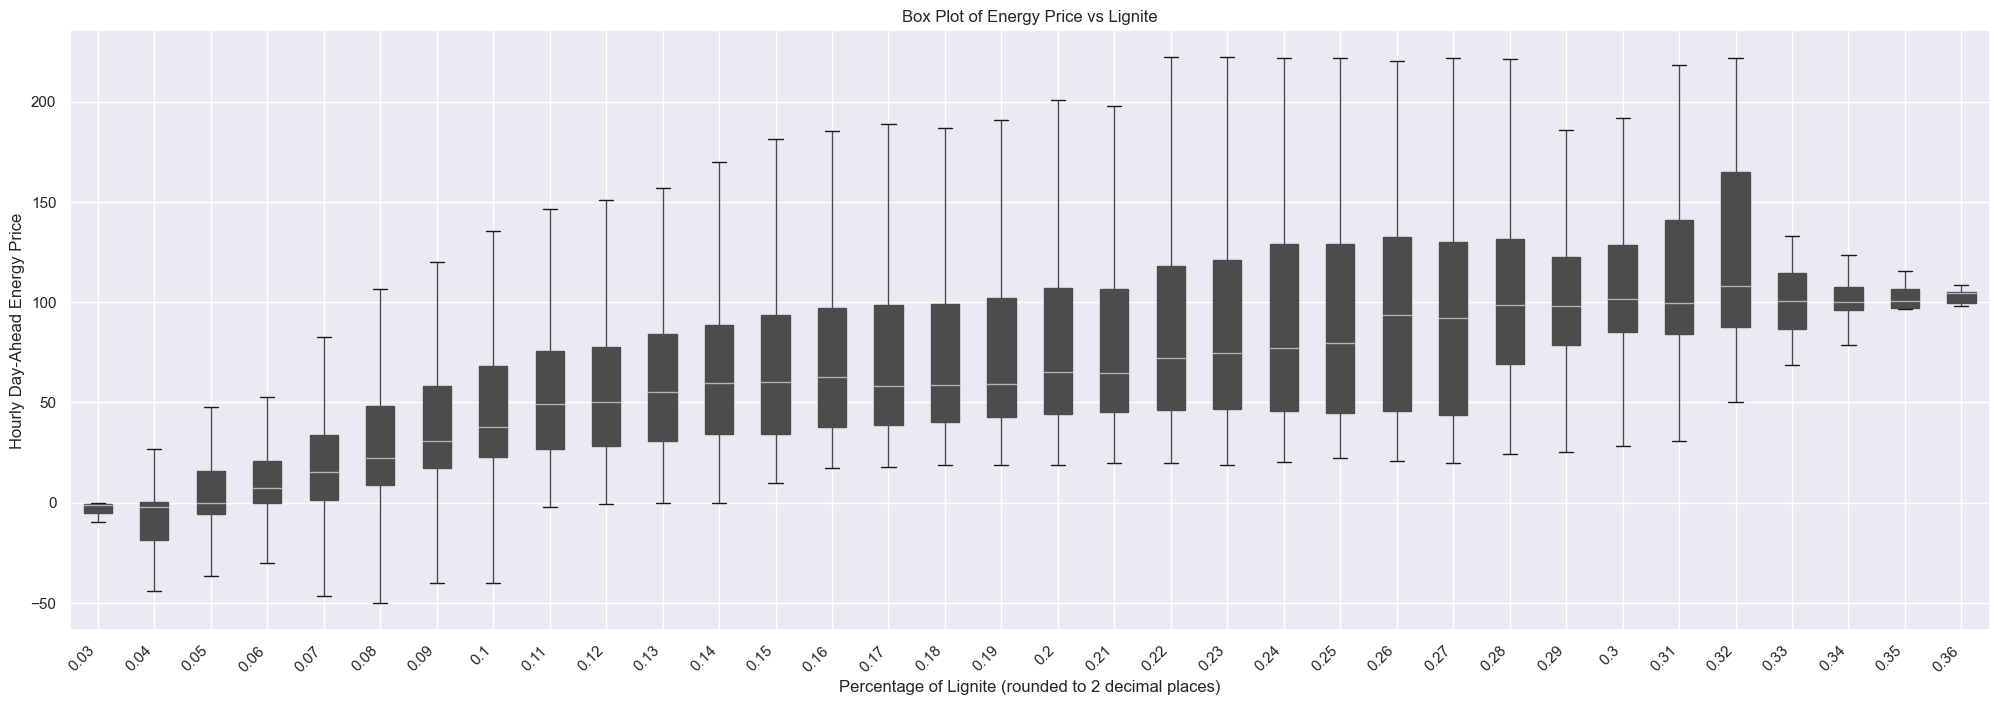

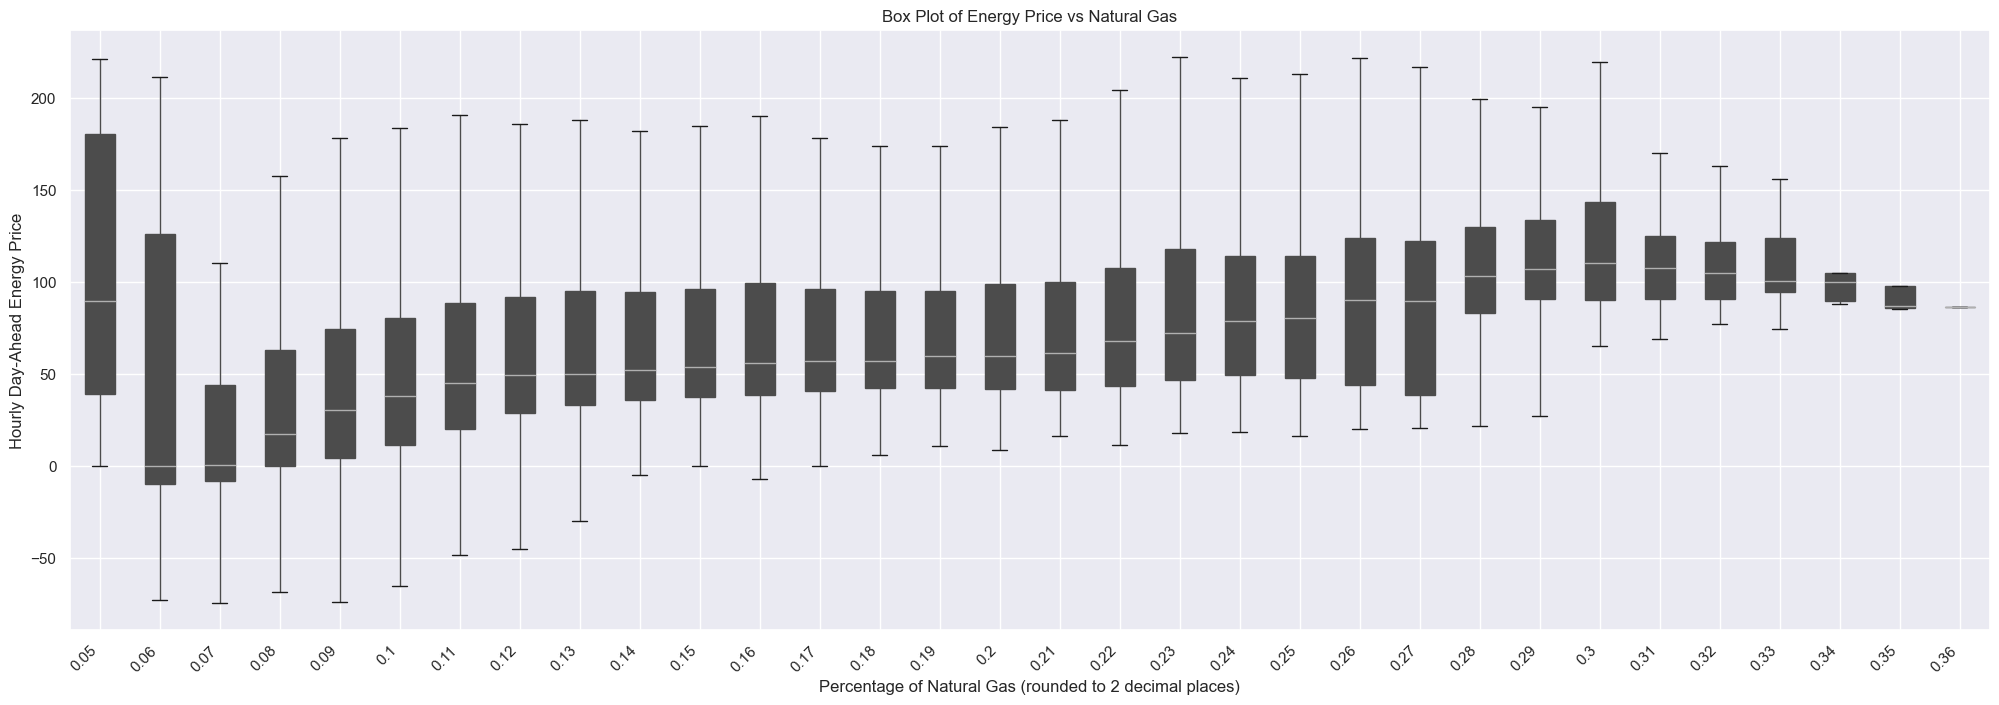

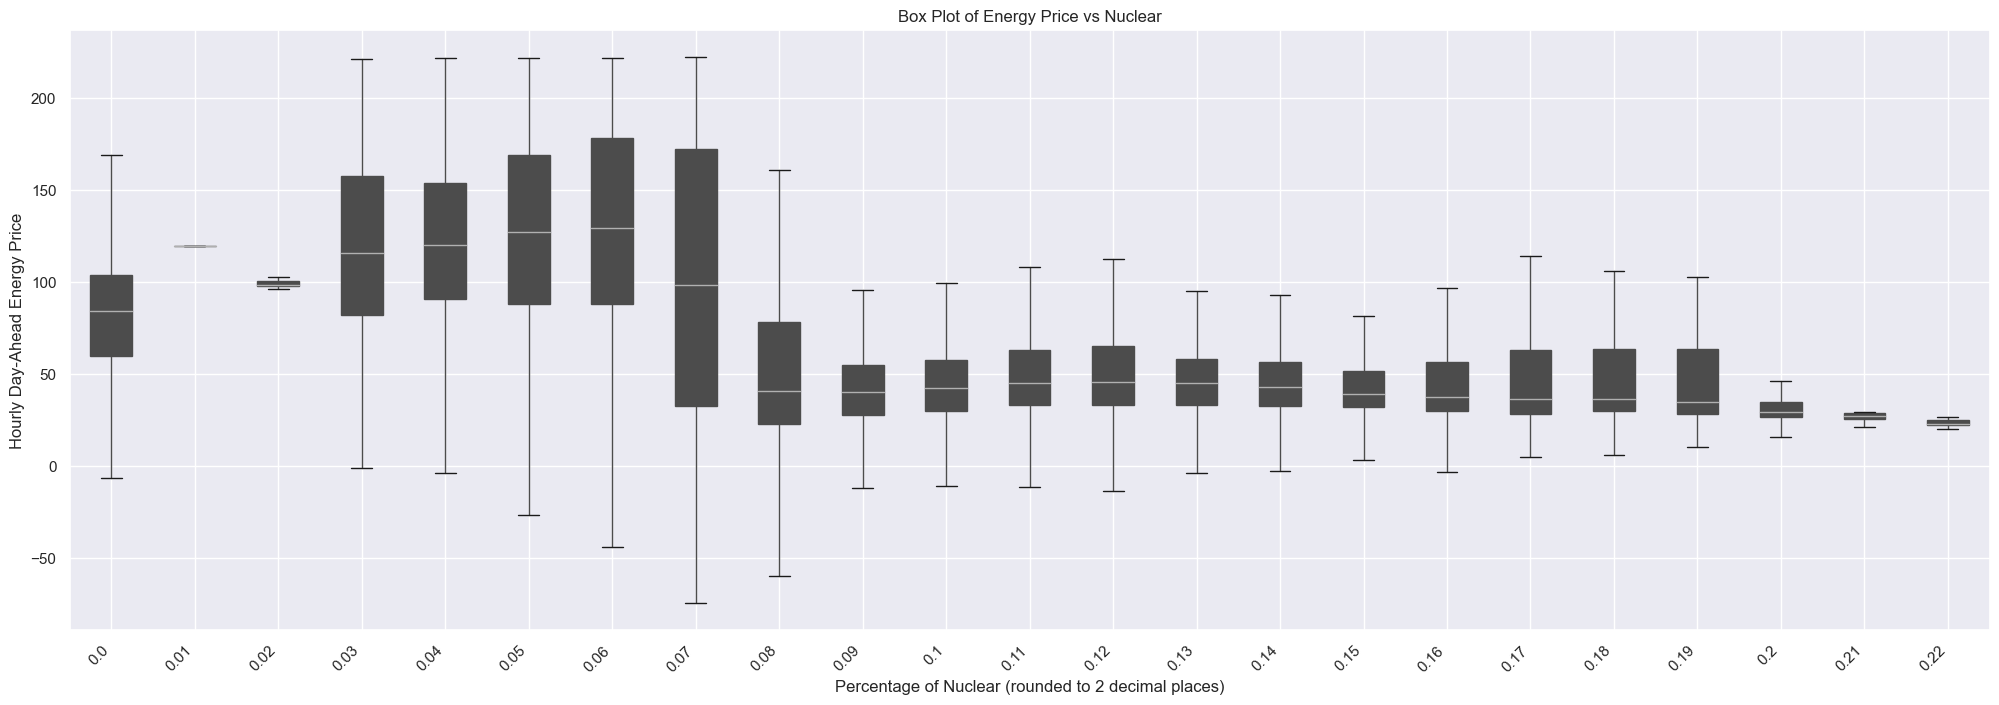

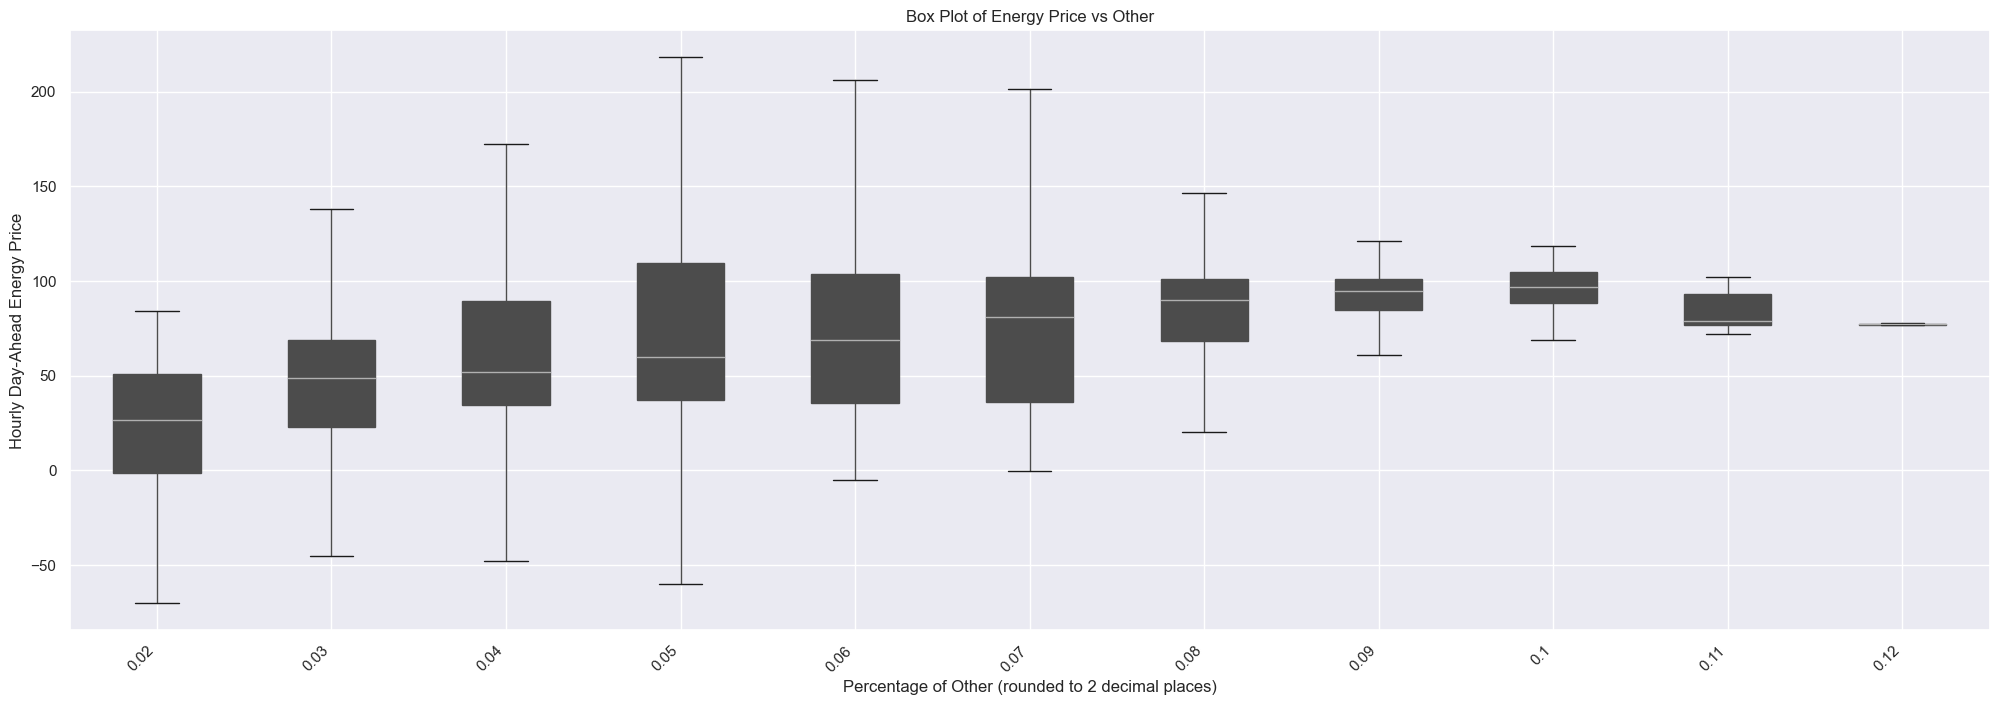

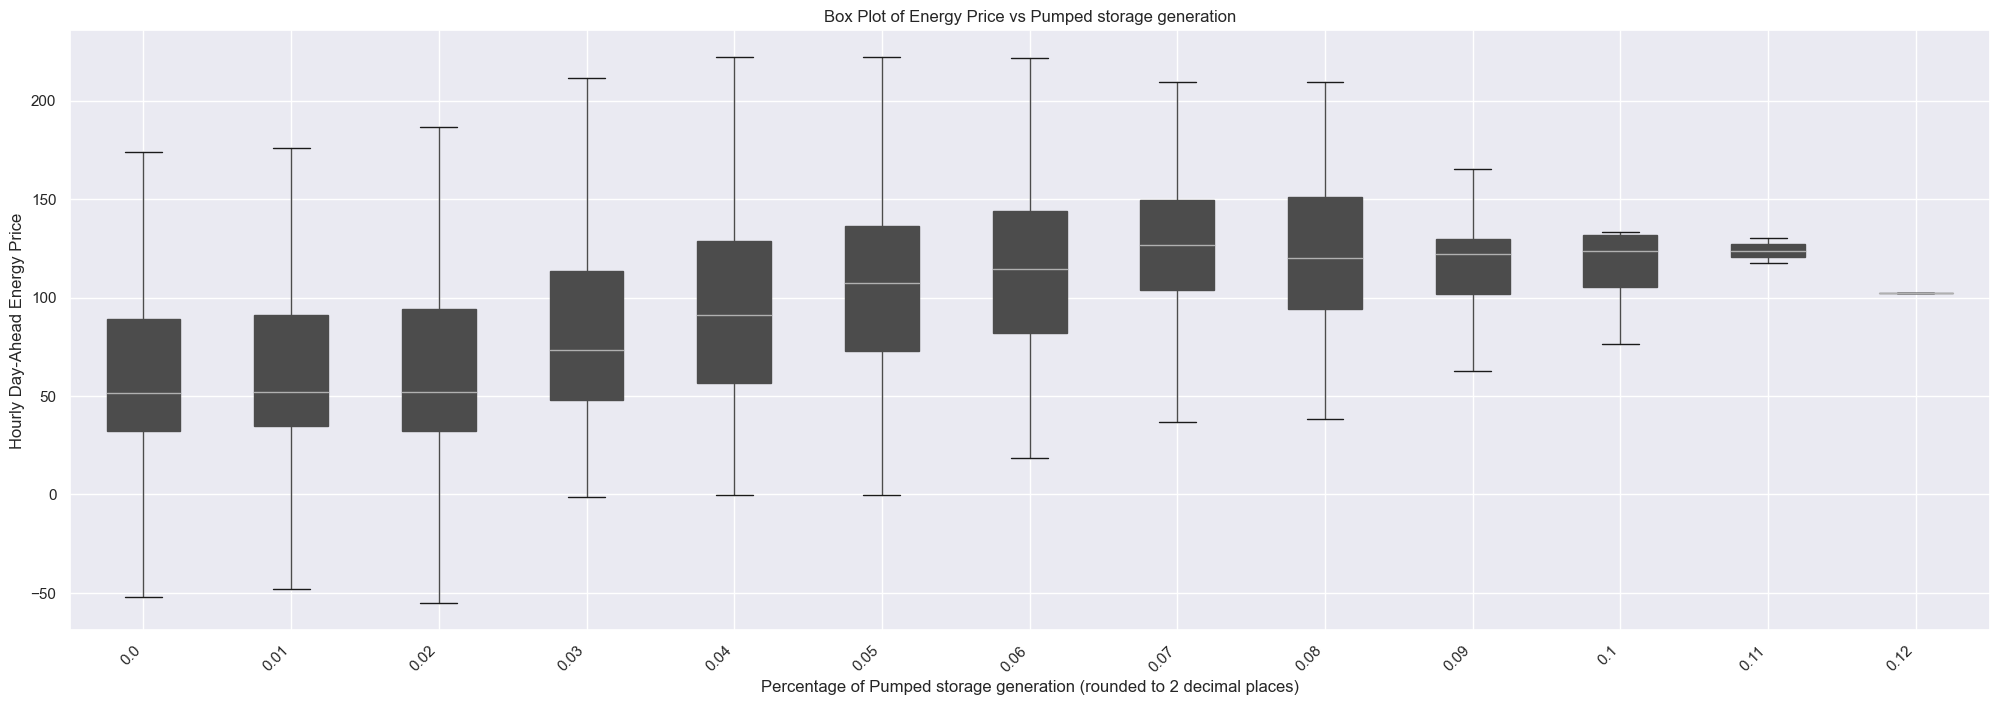

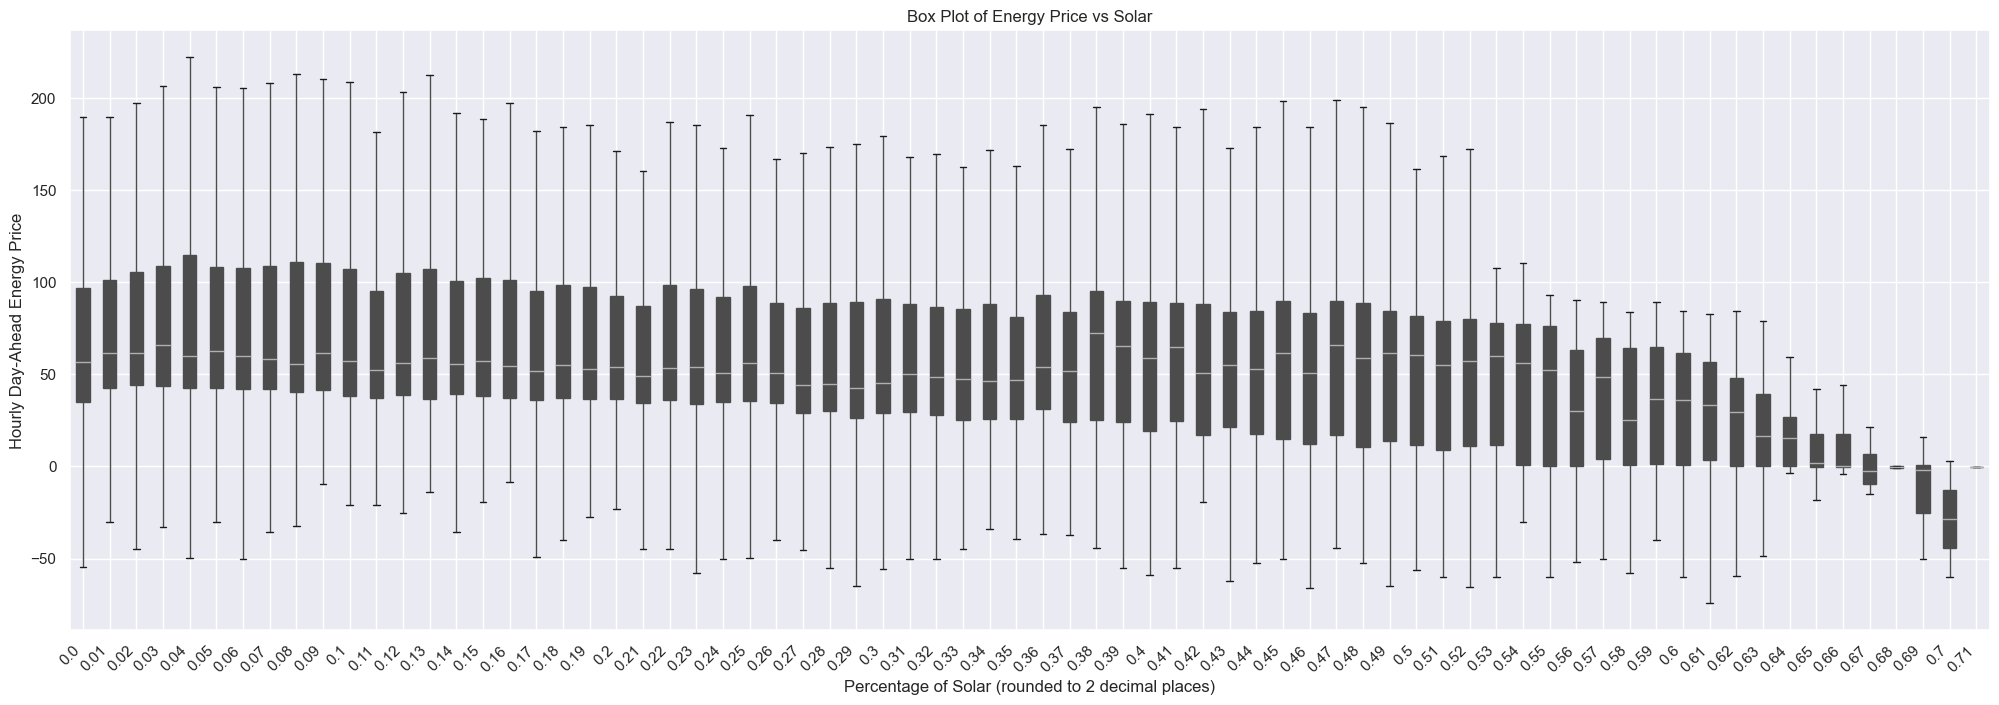

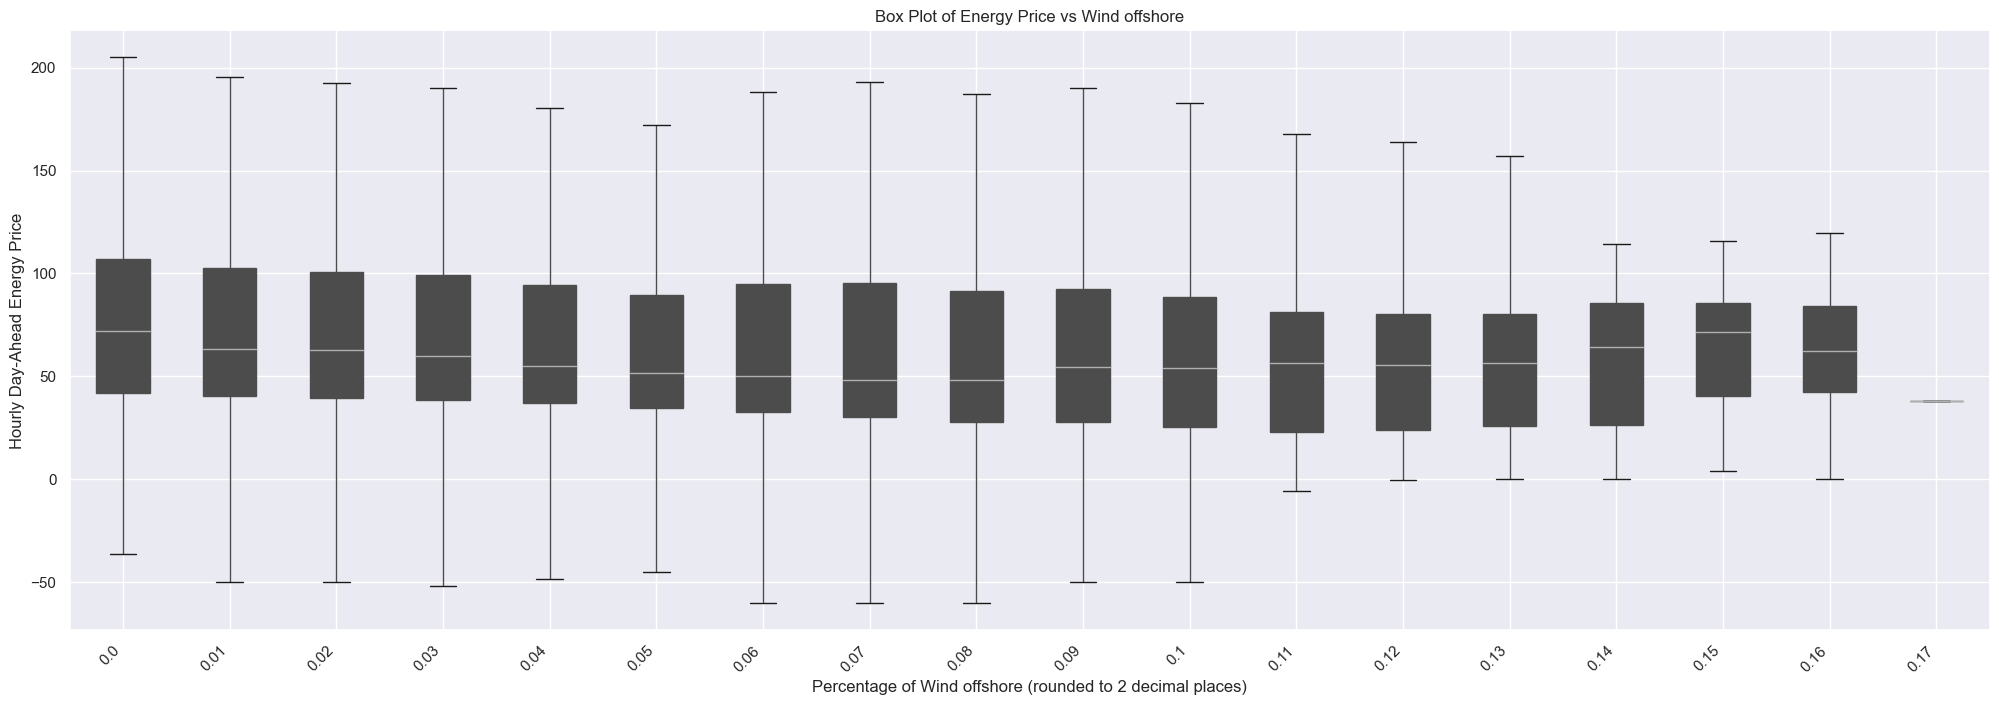

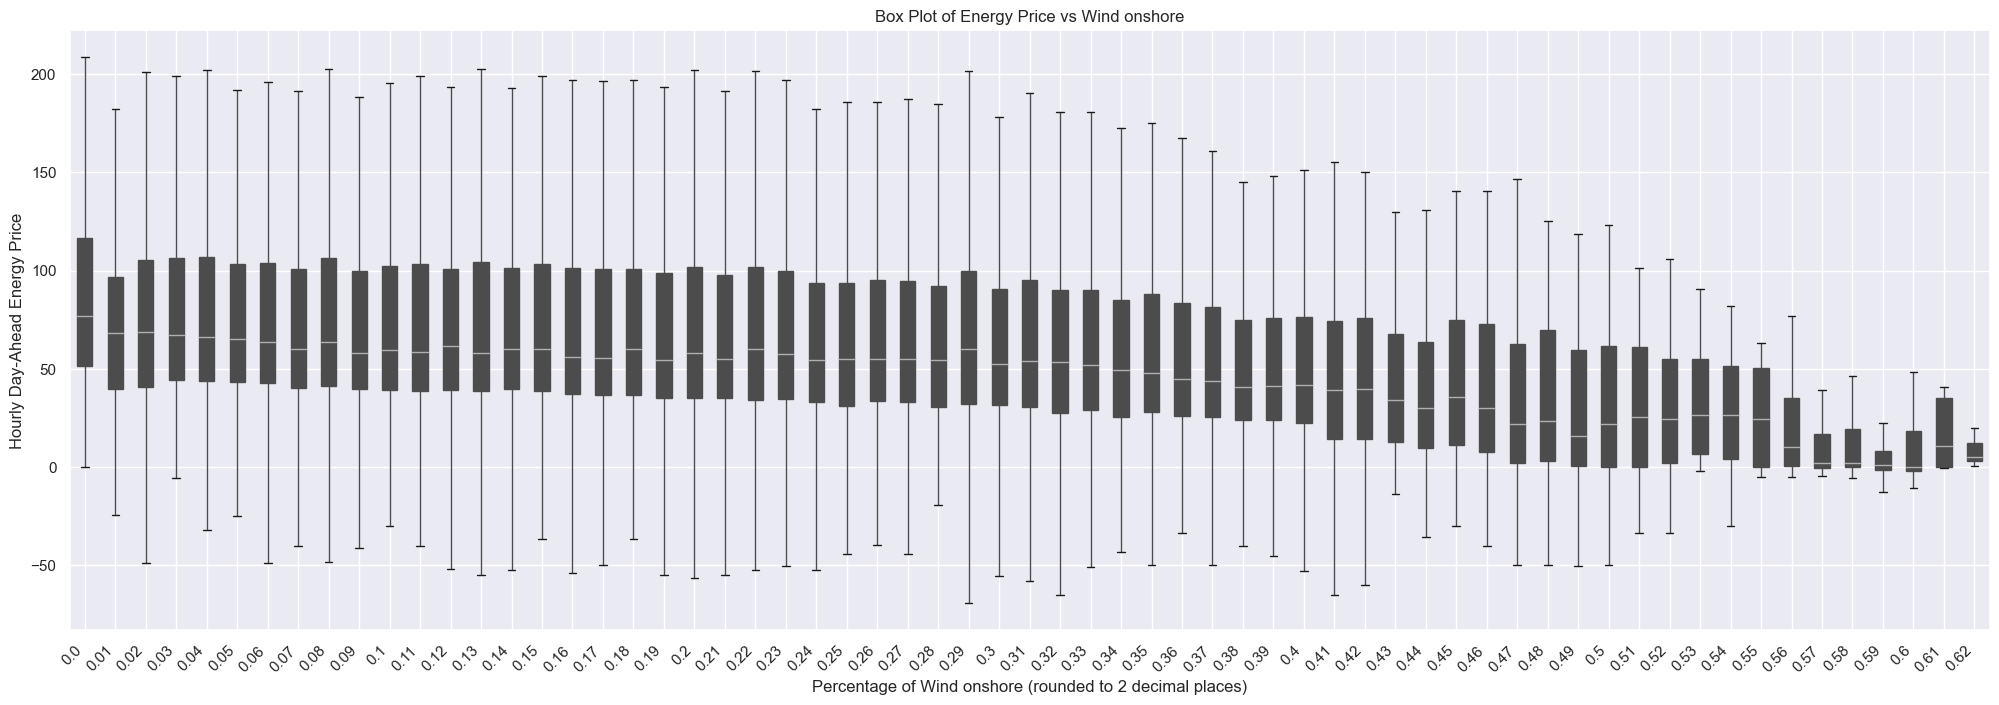

Index(['Biomass', 'Hard Coal', 'Hydro', 'Lignite', 'Natural Gas', 'Nuclear',
       'Other', 'Pumped storage generation', 'Solar', 'Wind offshore',
       'Wind onshore', 'Price'],
      dtype='object')


In [11]:
import pandas as pd

energy_mix_df = pd.read_csv("../data/hourly_market_mix_cleaned.csv")
energy_prices_df = pd.read_csv(
    "../data/day_ahead_energy_prices.csv", 
    usecols=["Datetime", "hourly day-ahead energy price"]
)

# Rename the columns
energy_prices_df.rename(columns={"Datetime": "Timestamp", "hourly day-ahead energy price": "Price"}, inplace=True)


# Convert timestamp columns to datetime format using correct column names
energy_mix_df['Timestamp'] = pd.to_datetime(energy_mix_df['Timestamp'])
energy_prices_df['Timestamp'] = pd.to_datetime(energy_prices_df['Timestamp'])

# Merge datasets on timestamp
merged_df = pd.merge(energy_mix_df, energy_prices_df, on='Timestamp', how='inner')

# Set the Timestamp column as the index
merged_df.set_index('Timestamp', inplace=True)


# Define the min and max energy price thresholds
min_price = -74.44
max_price = 222.01

# Filter the dataframe to remove rows with energy prices outside the range
filtered_df = merged_df[
    (merged_df['Price'] >= min_price) &
    (merged_df['Price'] <= max_price)
]


import matplotlib.pyplot as plt

cols_to_round = filtered_df.columns.difference(['Price'])  # Select all columns except 'Price'
filtered_df.loc[:, cols_to_round] = filtered_df.loc[:, cols_to_round].round(2)

# Remove duplicates based on all columns except 'Price'
filtered_df_unique = filtered_df.drop_duplicates(subset=cols_to_round)

for col in filtered_df_unique.columns:

    if col != "Price":
        fig, ax = plt.subplots(figsize=(24, 8))
        filtered_df_unique.boxplot(ax=ax, column='Price', by=col, vert=True, patch_artist=True, showfliers=False)
        plt.title(f'Box Plot of Energy Price vs {col}')
        plt.suptitle('')
        plt.xlabel(f'Percentage of {col} (rounded to 2 decimal places)')
        plt.ylabel('Hourly Day-Ahead Energy Price')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.show()


print(filtered_df_unique.columns)





# Total Energy Demand

In [6]:
import pandas as pd

demand_df = pd.read_csv("../data/hourly_market_mix.csv")

# Sample data (assuming your DataFrame is named df)
demand_df.columns = ['Timestamp', 'Value', 'Category']  # Rename columns if needed

# Convert the timestamp column to datetime format
demand_df['Timestamp'] = pd.to_datetime(demand_df['Timestamp'])

# Pivot the DataFrame to have categories as columns and timestamps as index
pivoted_df = demand_df.pivot(index='Timestamp', columns='Category', values='Value')

# Reset index if needed (optional)
pivoted_df.reset_index(inplace=True)


print(pivoted_df["Total electricity demand"].describe())



count    62664.000000
mean        60.624167
std          9.371617
min         36.699000
25%         53.414000
50%         60.358000
75%         68.188250
max         85.205000
Name: Total electricity demand, dtype: float64


                     Total electricity demand   Price
Timestamp                                            
2018-10-01 00:00:00                    52.442   59.53
2018-10-01 01:00:00                    52.009   56.10
2018-10-01 02:00:00                    51.341   51.41
2018-10-01 03:00:00                    53.145   47.38
2018-10-01 04:00:00                    54.961   47.59
...                                       ...     ...
2024-10-29 20:00:00                    59.140  140.60
2024-10-29 21:00:00                    57.003  124.05
2024-10-29 22:00:00                    54.139  118.08
2024-10-29 23:00:00                    51.464  103.09
2024-10-30 00:00:00                    49.734  100.71

[53161 rows x 2 columns]


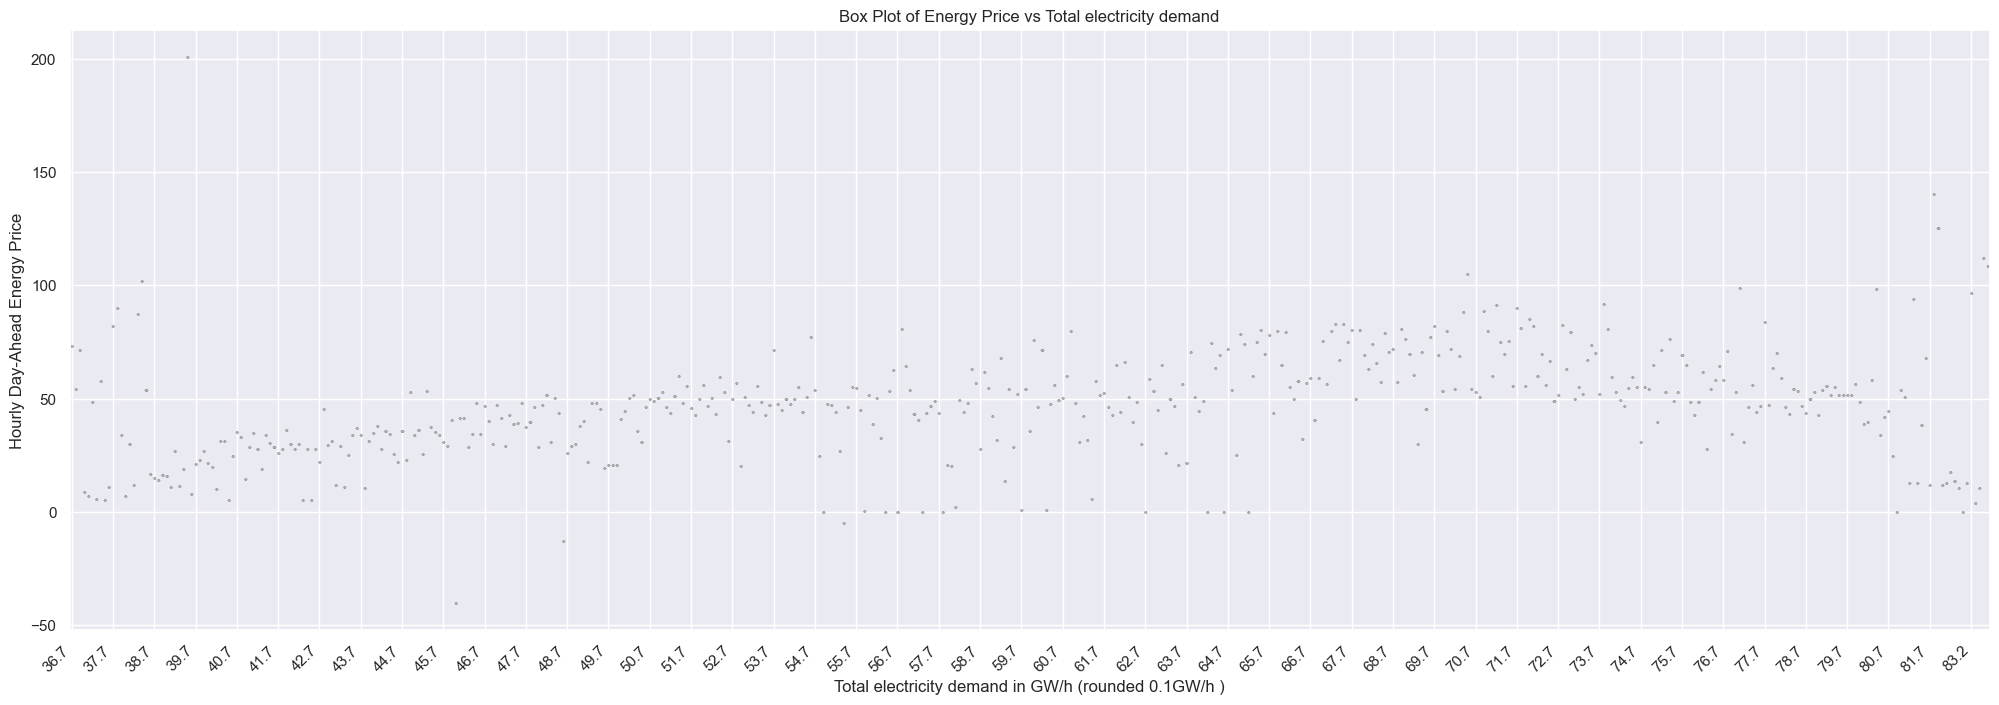

In [12]:
import pandas as pd


energy_mix_df = pd.read_csv("../data/hourly_market_metrics_cleaned.csv", usecols=["Timestamp", "Total electricity demand"])
energy_prices_df = pd.read_csv(
    "../data/day_ahead_energy_prices.csv", 
    usecols=["Datetime", "hourly day-ahead energy price"]
)

# Rename the columns
energy_prices_df.rename(columns={"Datetime": "Timestamp", "hourly day-ahead energy price": "Price"}, inplace=True)


# Convert timestamp columns to datetime format using correct column names
energy_mix_df['Timestamp'] = pd.to_datetime(energy_mix_df['Timestamp'])
energy_prices_df['Timestamp'] = pd.to_datetime(energy_prices_df['Timestamp'])

# Merge datasets on timestamp
merged_df = pd.merge(energy_mix_df, energy_prices_df, on='Timestamp', how='inner')

# Set the Timestamp column as the index
merged_df.set_index('Timestamp', inplace=True)
print(merged_df)

# Define the min and max energy price thresholds
min_price = -74.44
max_price = 222.01

# Filter the dataframe to remove rows with energy prices outside the range
filtered_df = merged_df[
    (merged_df['Price'] >= min_price) &
    (merged_df['Price'] <= max_price)
]


import matplotlib.pyplot as plt

cols_to_round = filtered_df.columns.difference(['Price'])  # Select all columns except 'Price'
filtered_df.loc[:, cols_to_round] = filtered_df.loc[:, cols_to_round].round(1)

# Remove duplicates based on all columns except 'Price'
filtered_df_unique = filtered_df.drop_duplicates(subset=cols_to_round)

fig, ax = plt.subplots(figsize=(24, 8))
filtered_df_unique.boxplot(ax=ax, column='Price', by="Total electricity demand", vert=True, patch_artist=True)
plt.title(f'Box Plot of Energy Price vs Total electricity demand')
plt.suptitle('')
plt.xlabel(f'Total electricity demand in GW/h (rounded 0.1GW/h )')
plt.ylabel('Hourly Day-Ahead Energy Price')

xticks = ax.get_xticks()
ax.set_xticks(xticks[::10])  # Show every 10th tick (adjust as needed)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


# Energy Mix 

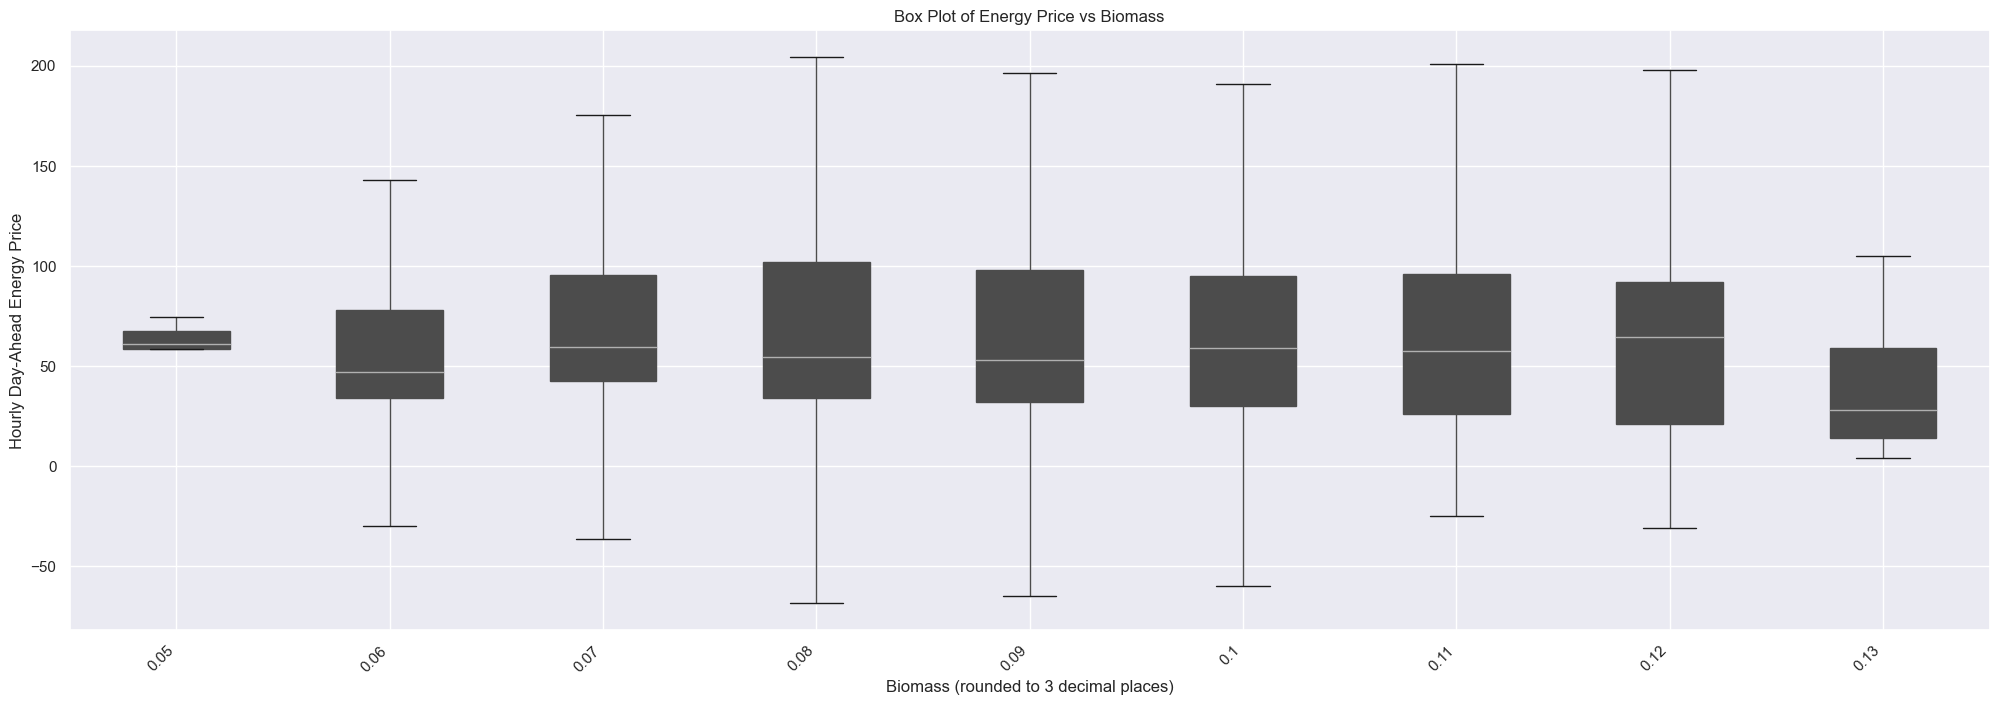

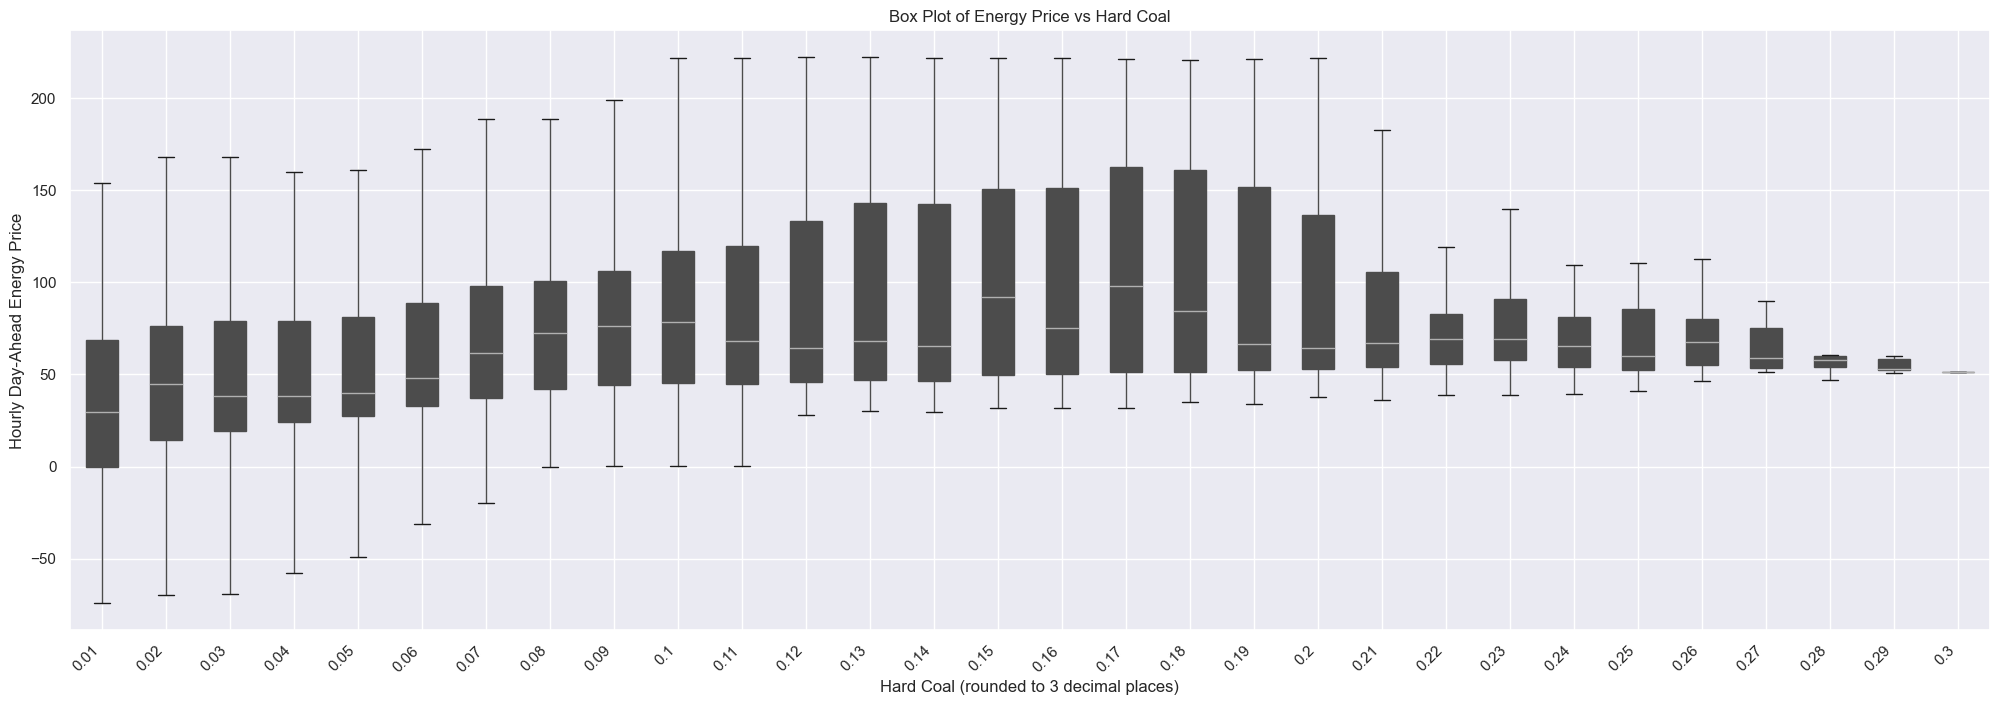

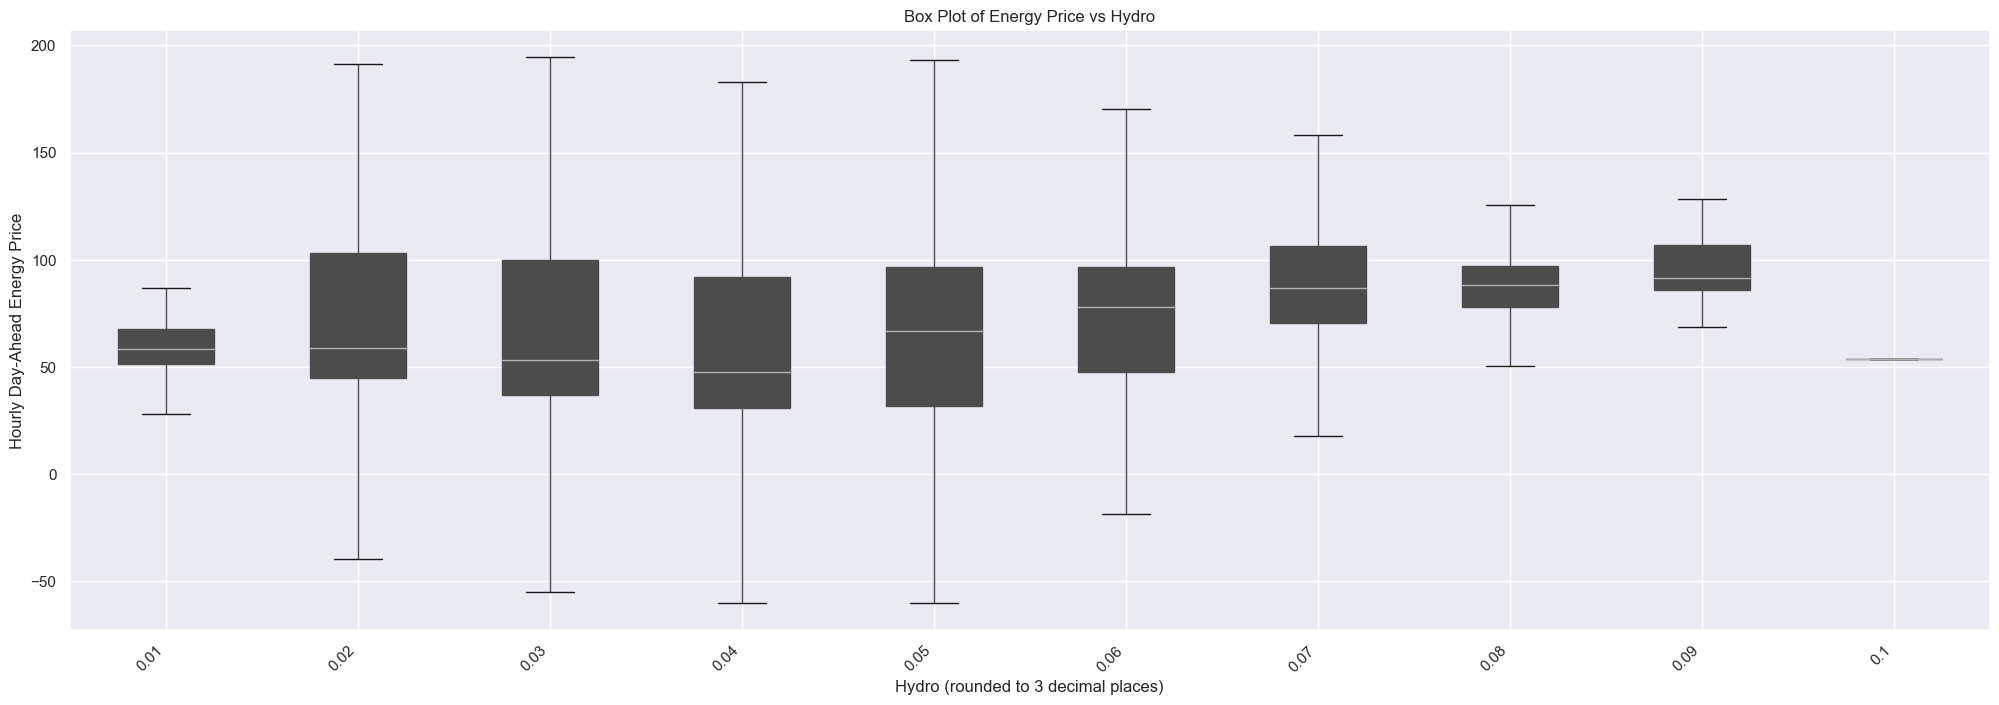

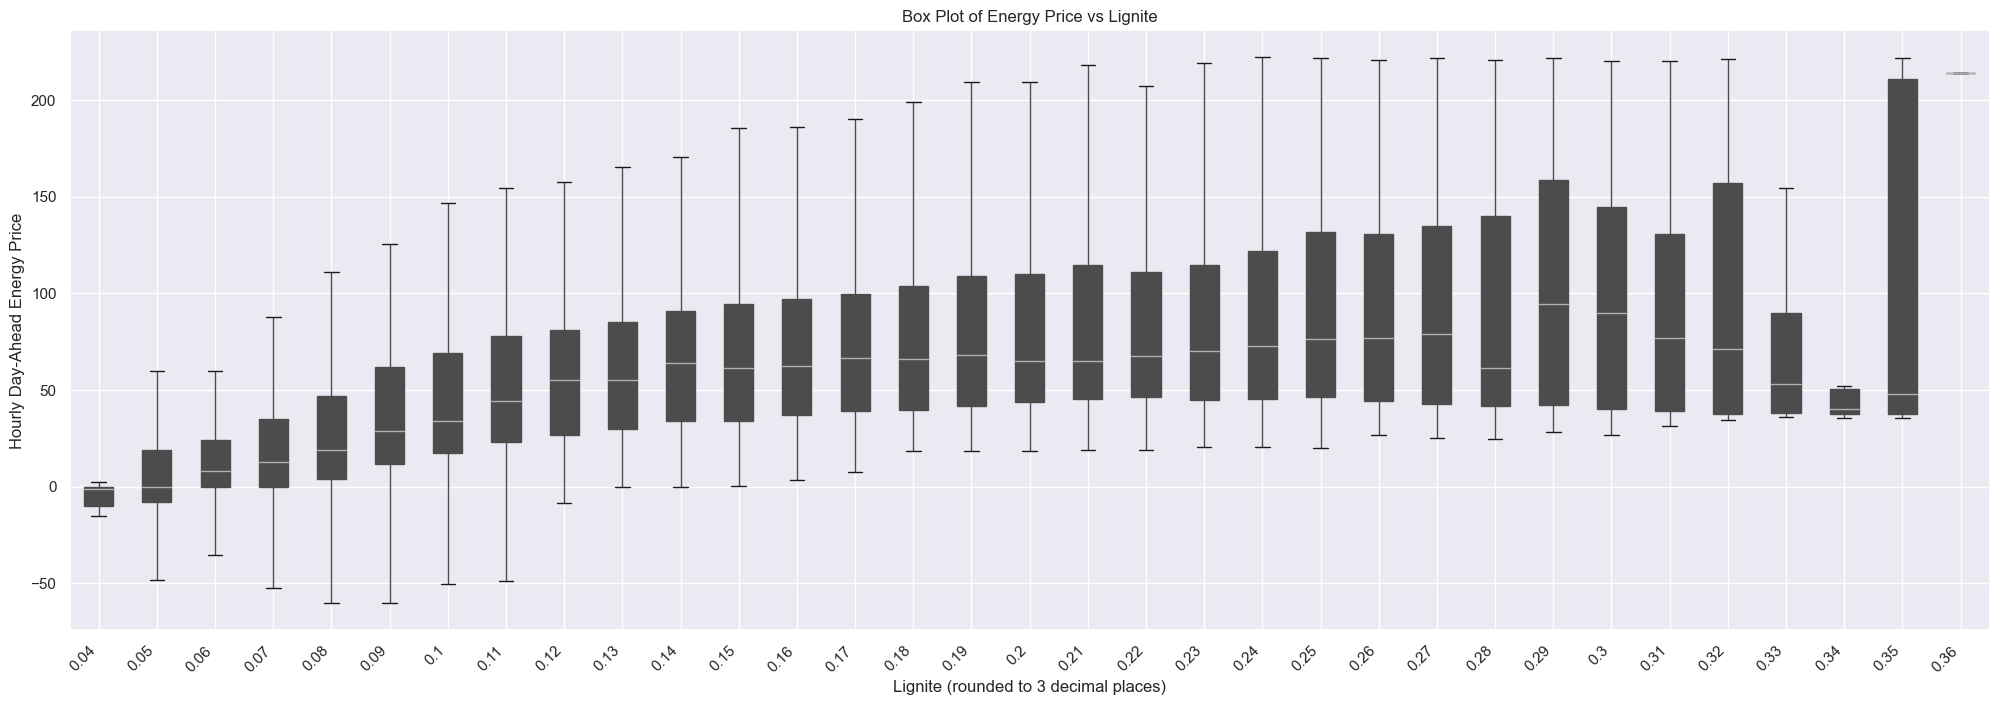

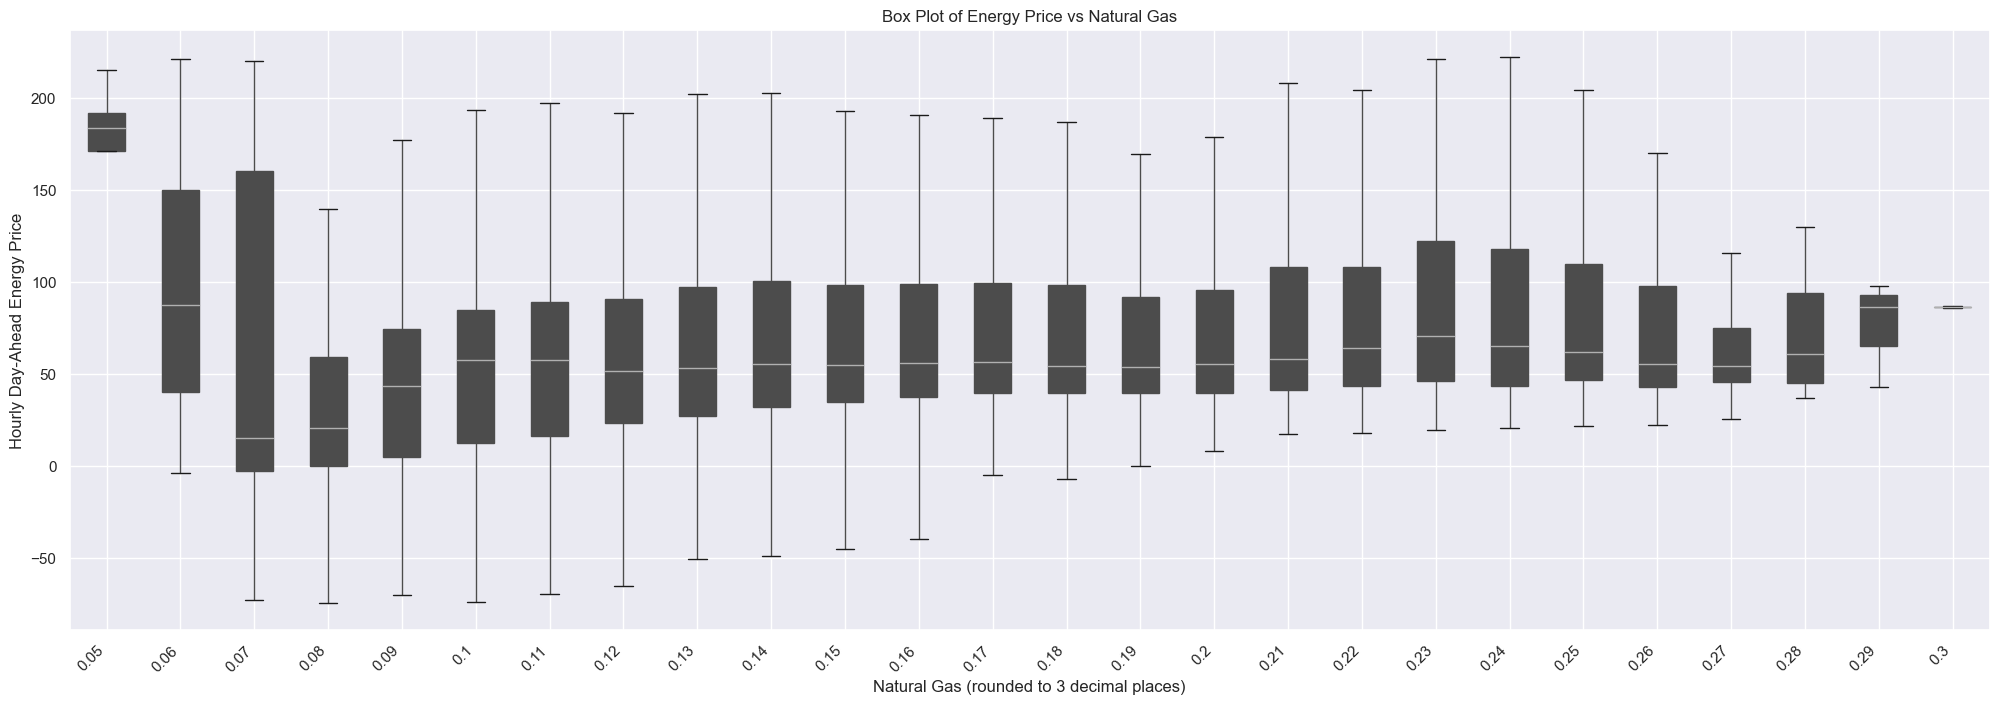

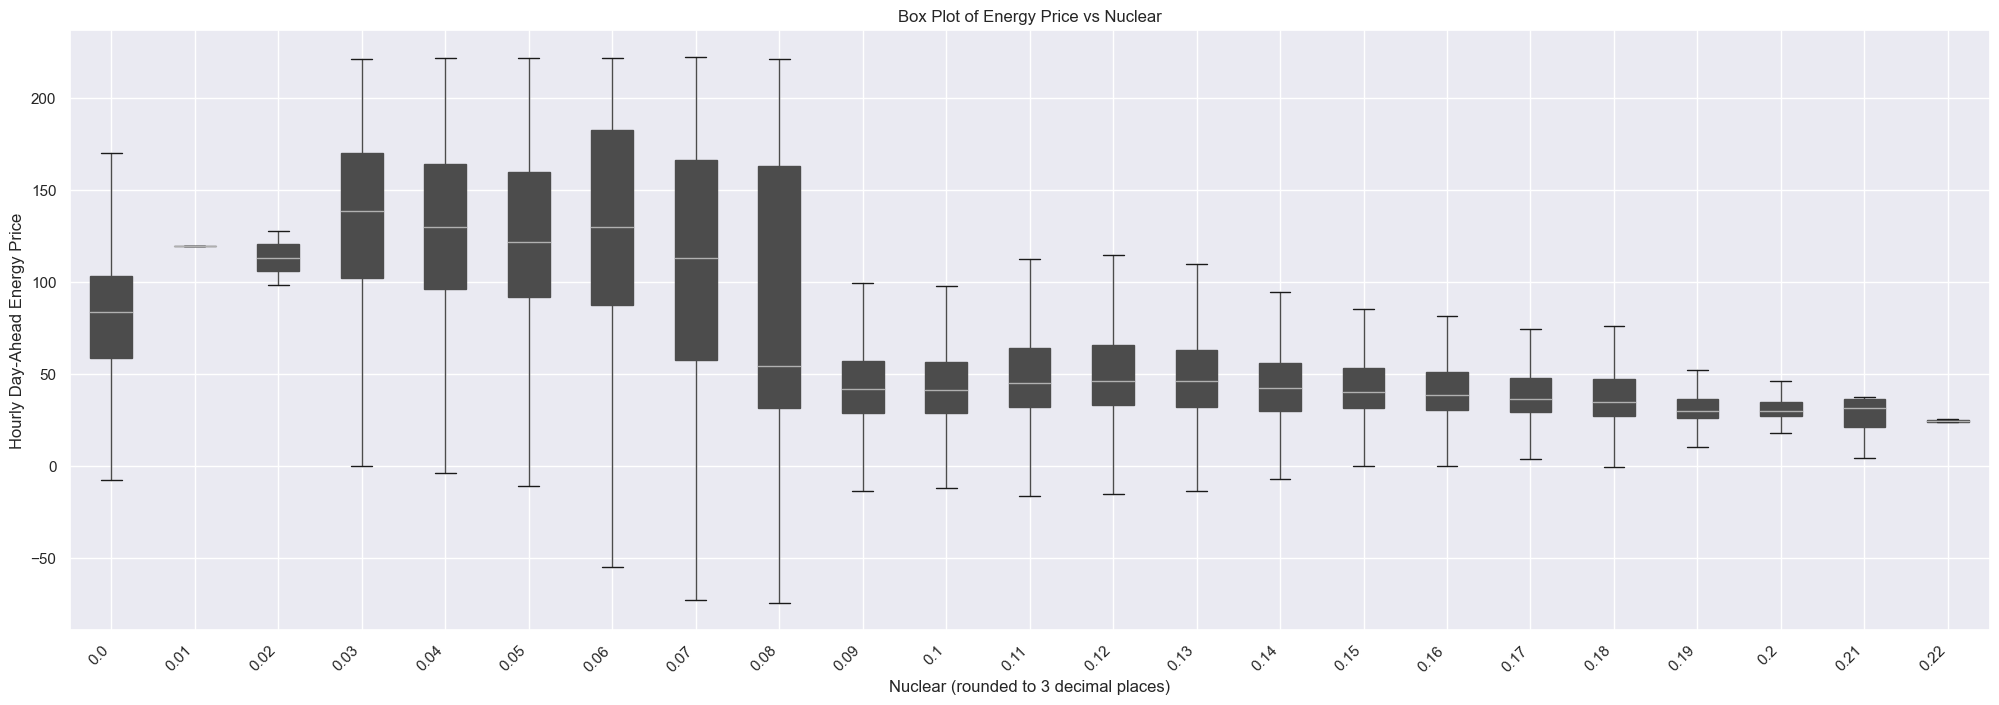

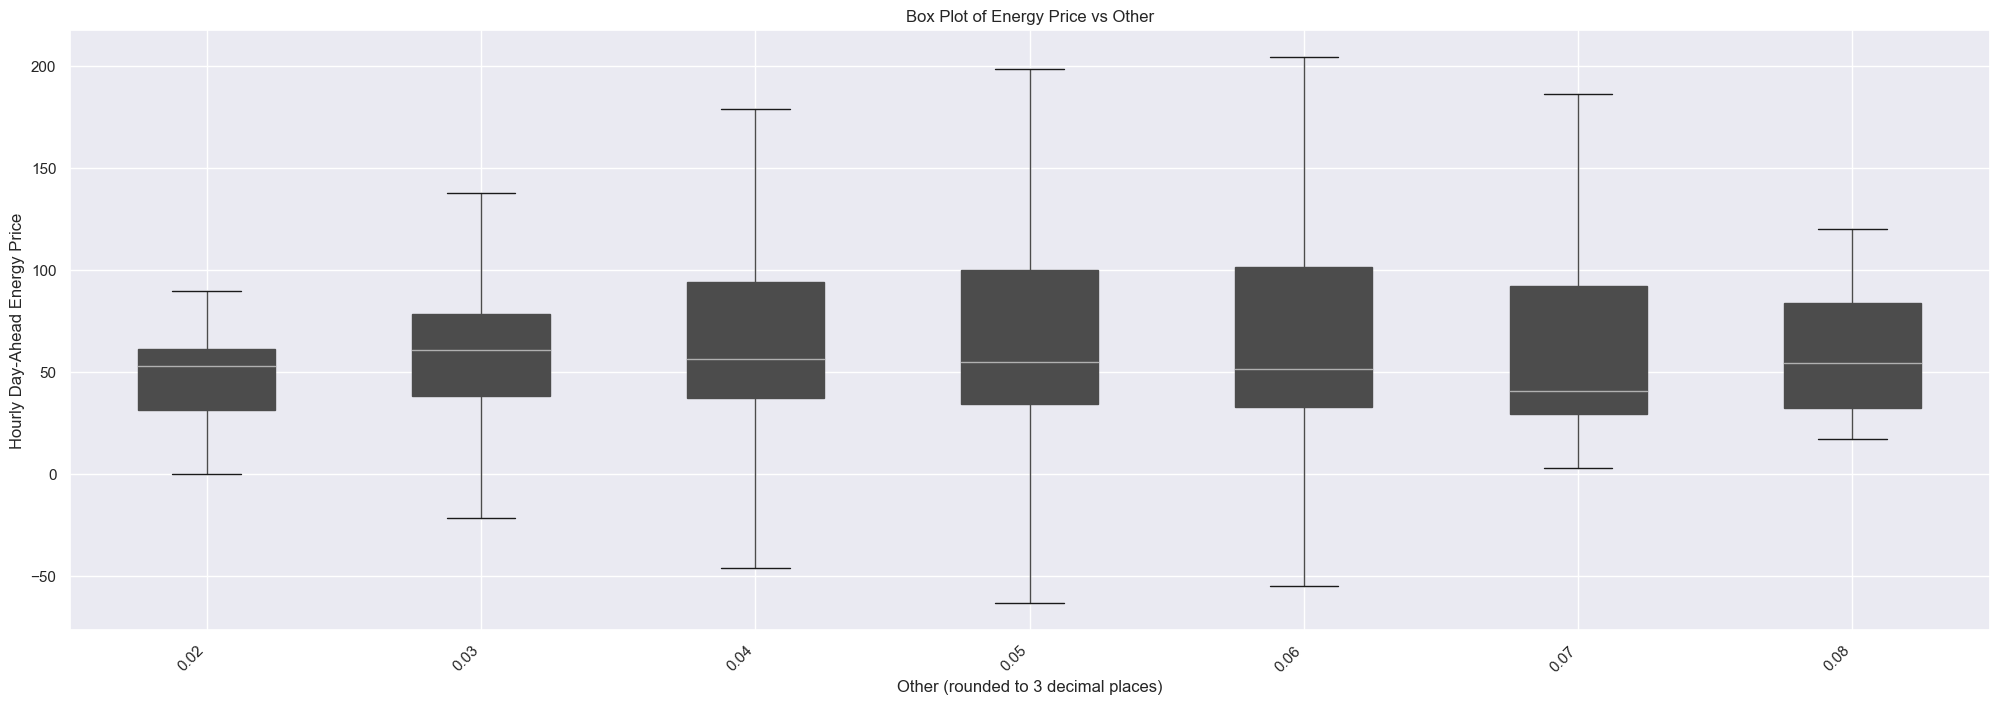

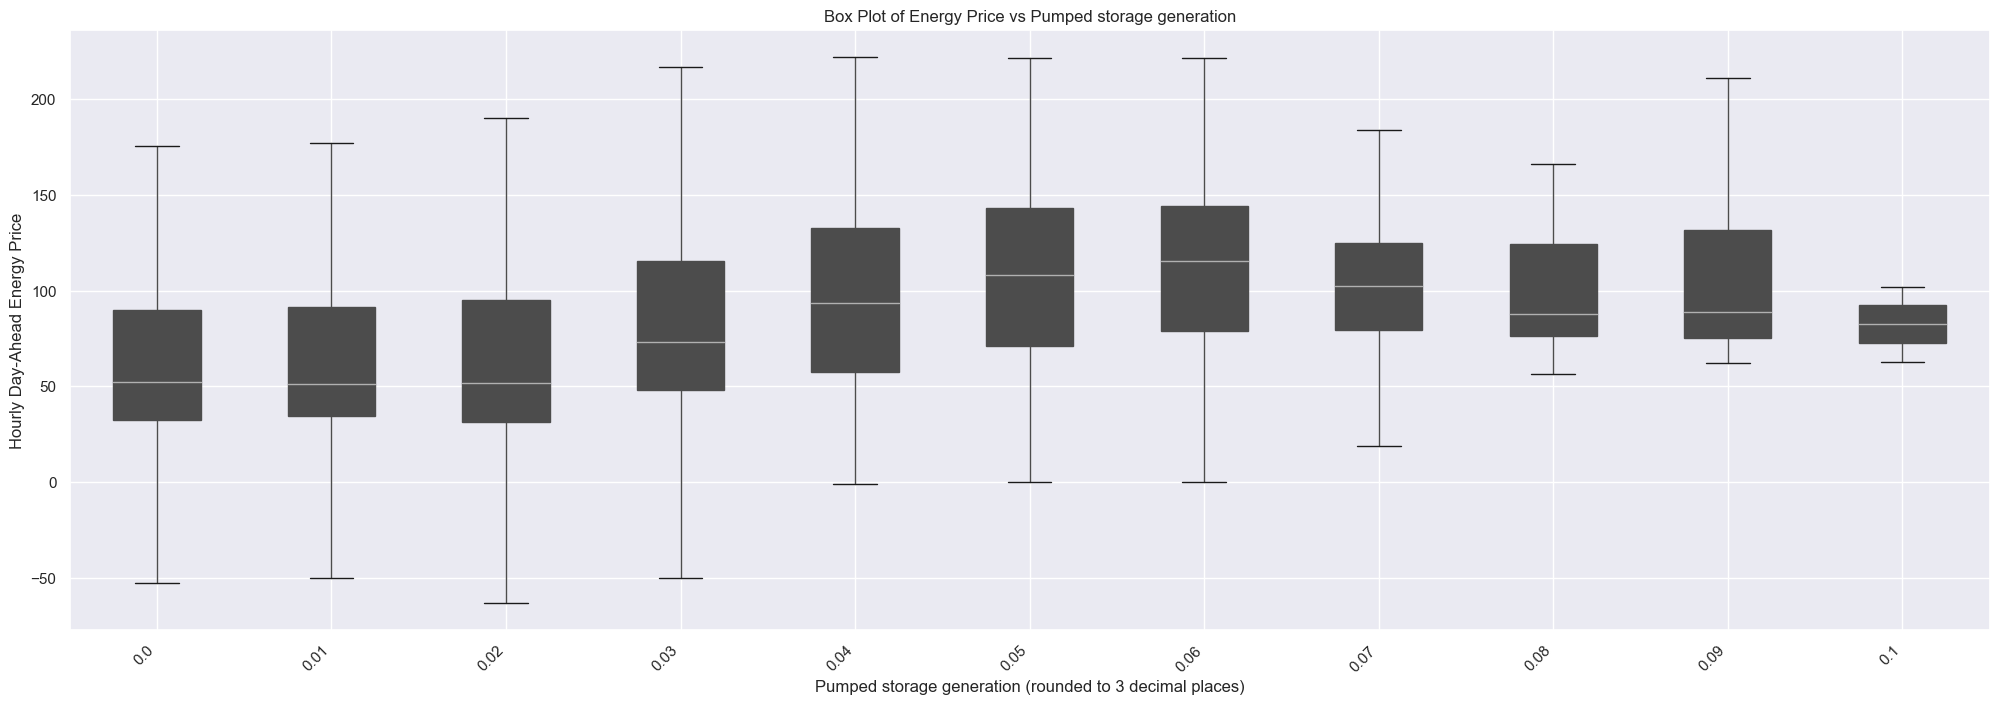

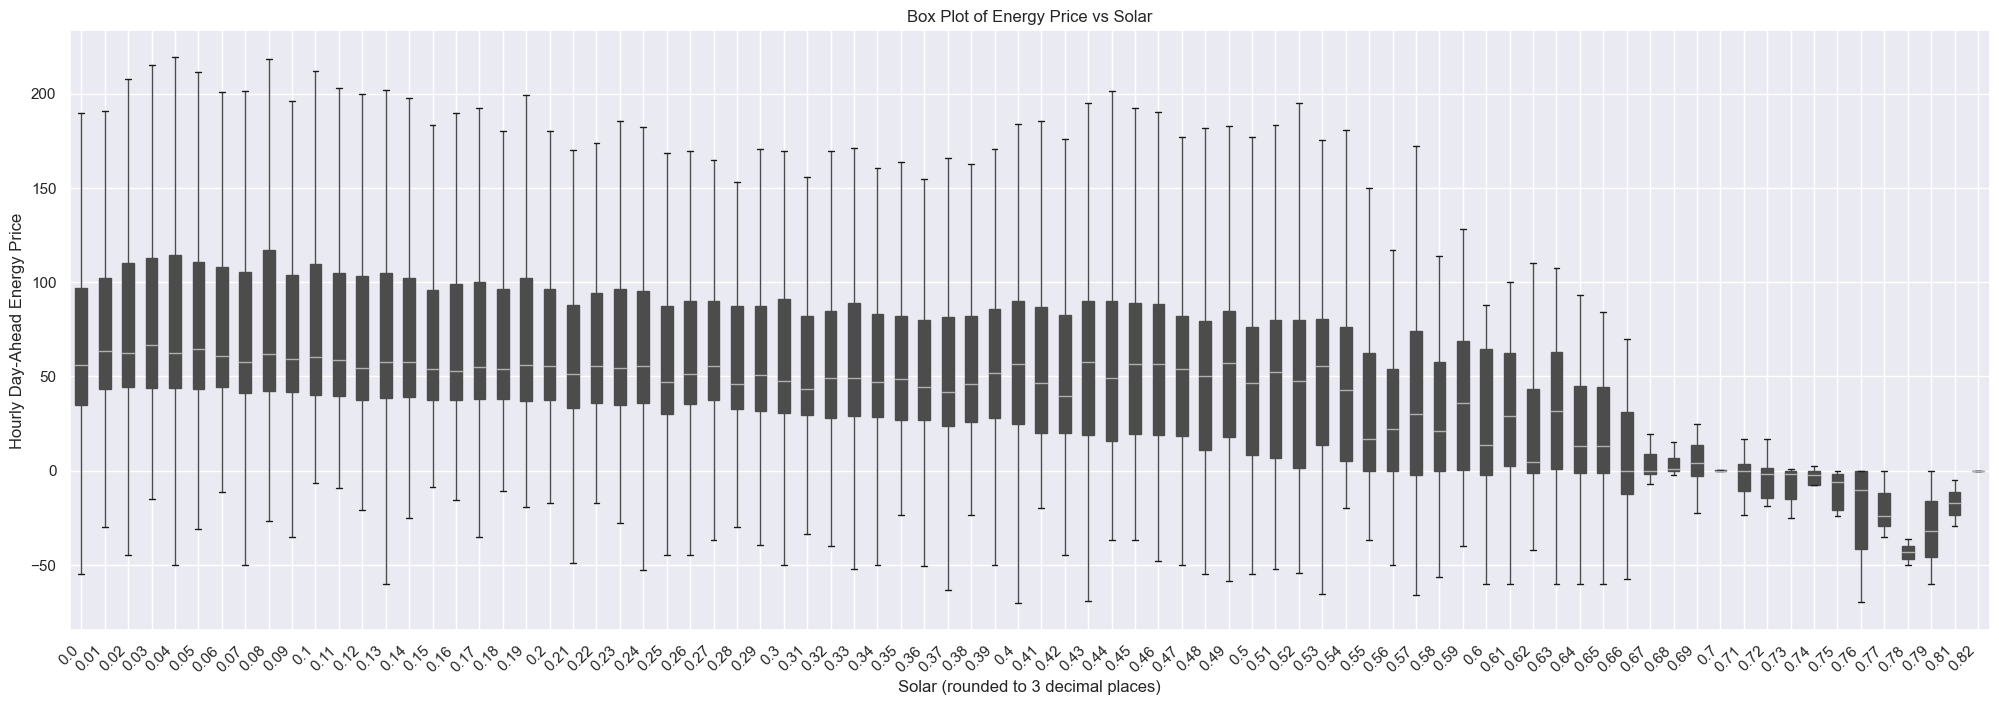

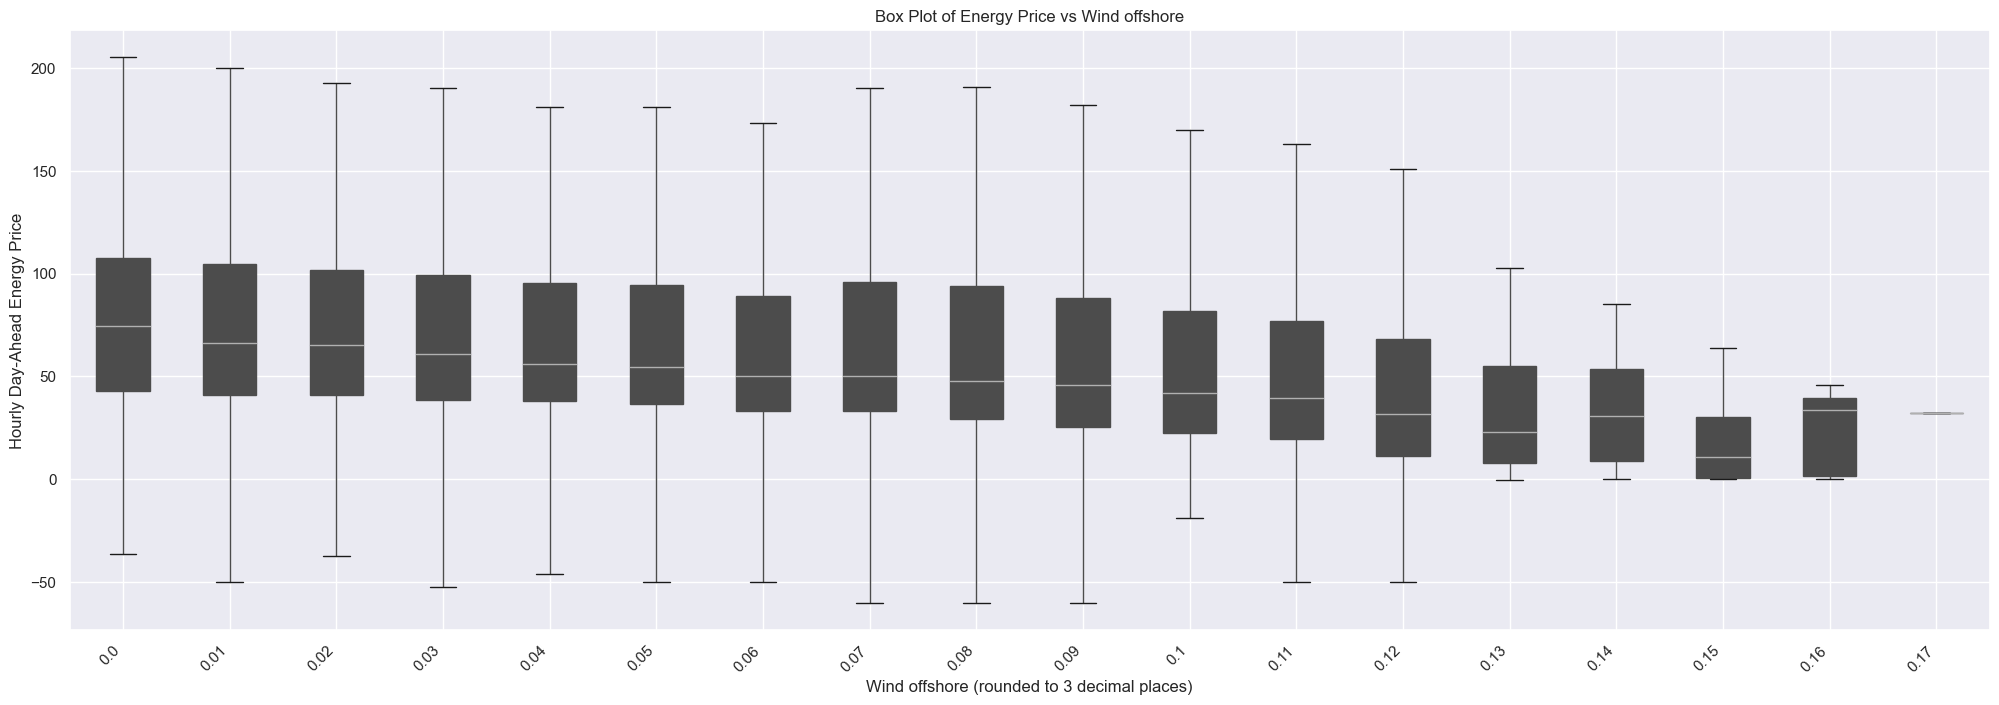

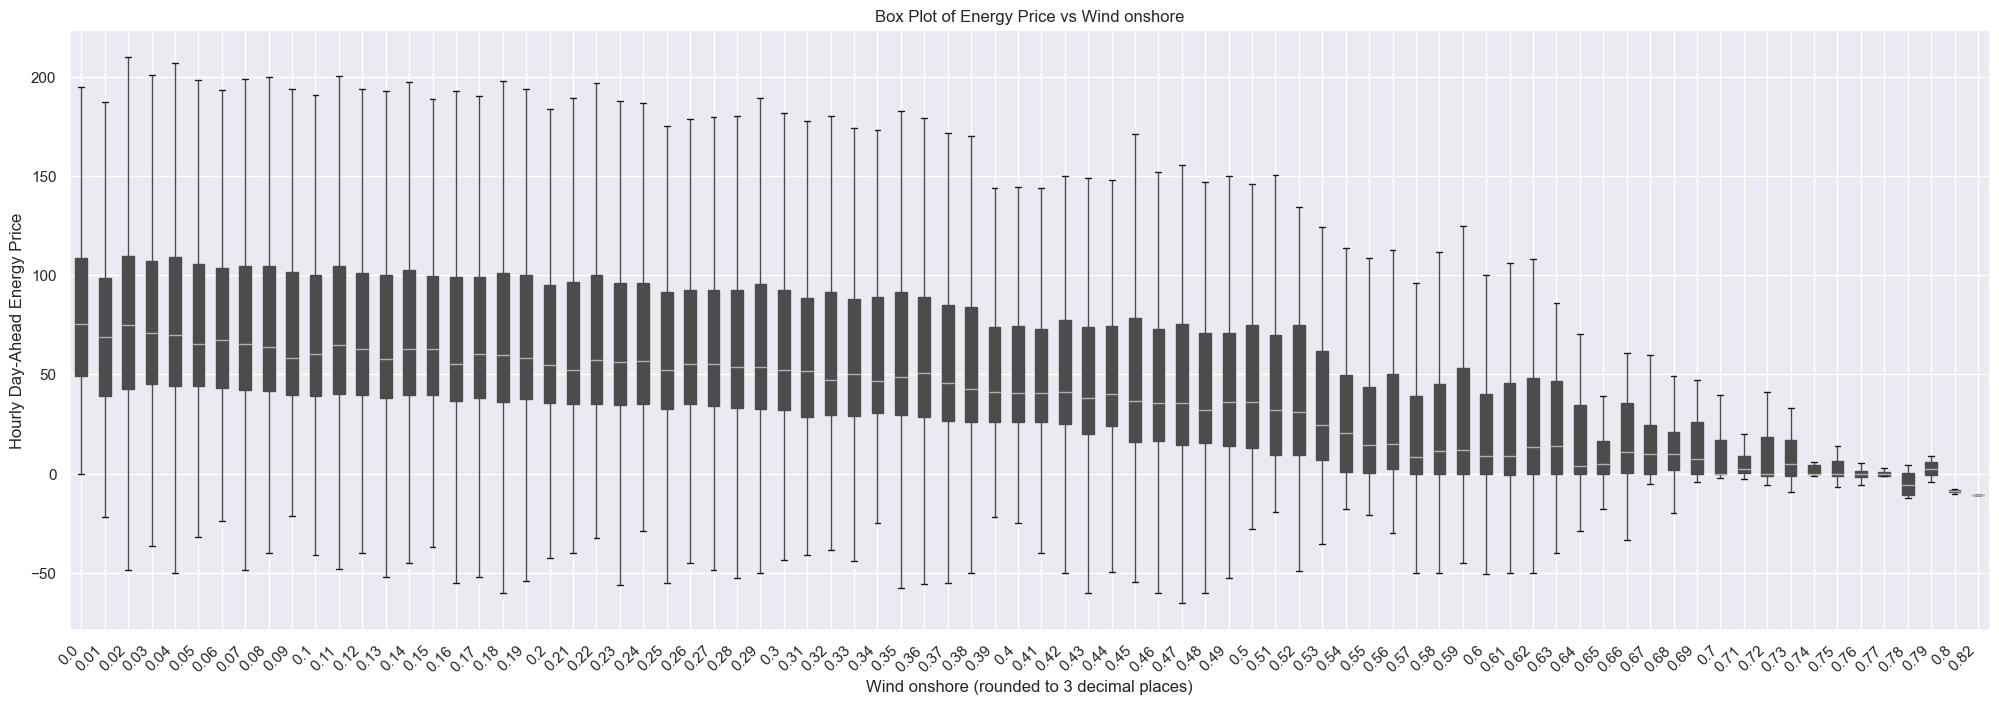

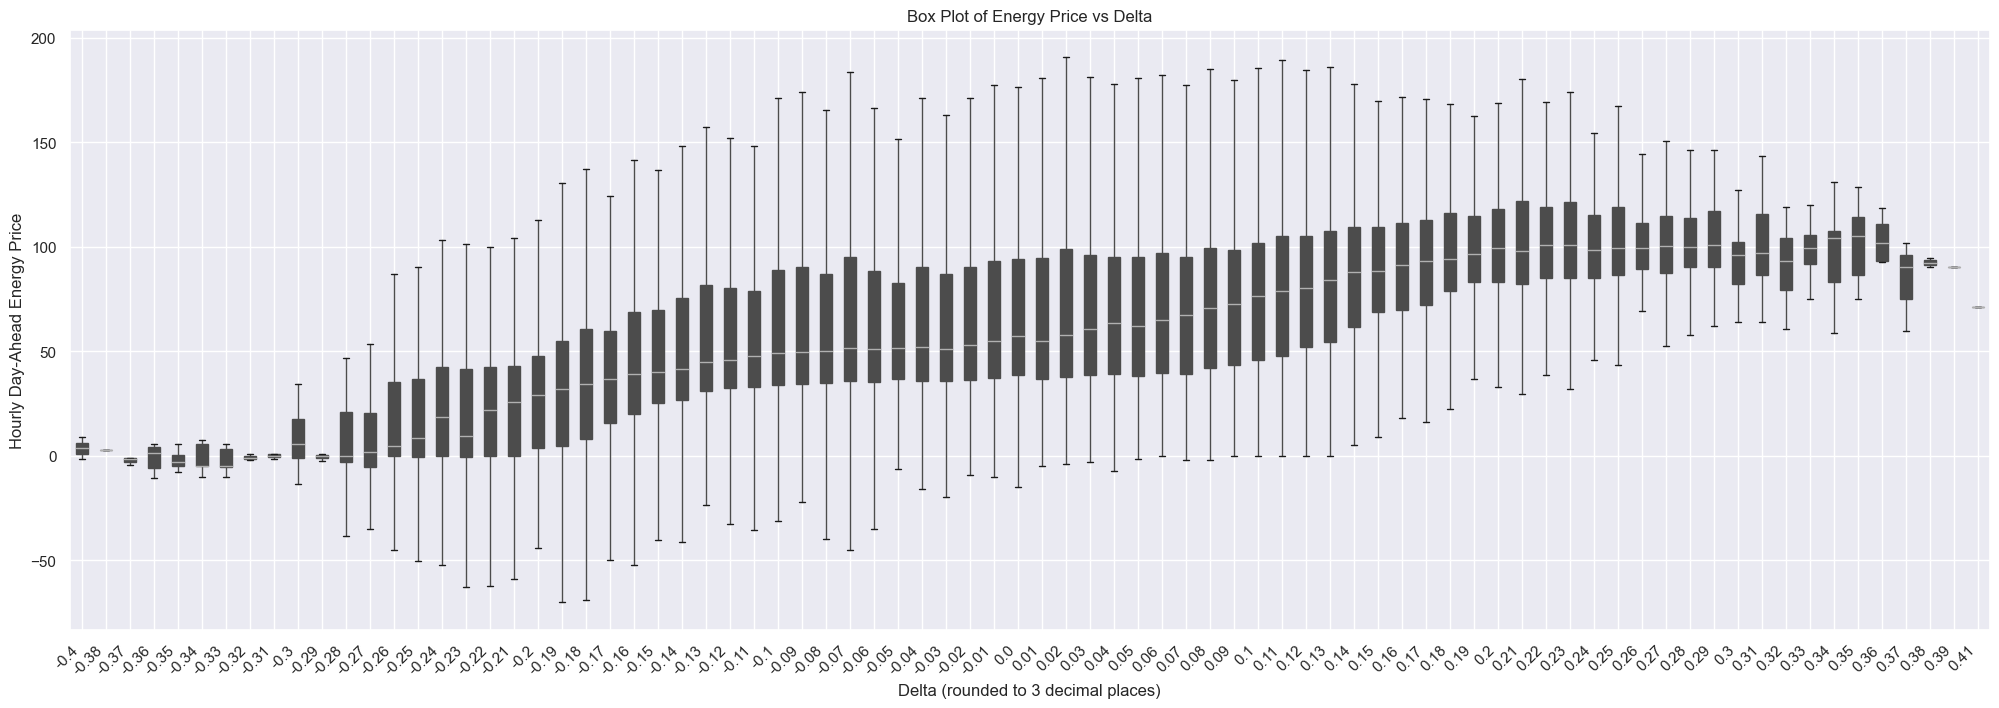

Index(['Biomass', 'Hard Coal', 'Hydro', 'Lignite', 'Natural Gas', 'Nuclear',
       'Other', 'Pumped storage generation', 'Solar', 'Wind offshore',
       'Wind onshore', 'Delta', 'Price'],
      dtype='object')


In [30]:
import pandas as pd

energy_mix_df = pd.read_csv("../data/hourly_market_mix_delta.csv")
energy_prices_df = pd.read_csv(
    "../data/day_ahead_energy_prices.csv", 
    usecols=["Datetime", "hourly day-ahead energy price"]
)

# Rename the columns
energy_prices_df.rename(columns={"Datetime": "Timestamp", "hourly day-ahead energy price": "Price"}, inplace=True)


# Convert timestamp columns to datetime format using correct column names
energy_mix_df['Timestamp'] = pd.to_datetime(energy_mix_df['Timestamp'])
energy_prices_df['Timestamp'] = pd.to_datetime(energy_prices_df['Timestamp'])

# Merge datasets on timestamp
merged_df = pd.merge(energy_mix_df, energy_prices_df, on='Timestamp', how='inner')

# Set the Timestamp column as the index
merged_df.set_index('Timestamp', inplace=True)


# Define the min and max energy price thresholds
min_price = -74.44
max_price = 222.01

# Filter the dataframe to remove rows with energy prices outside the range
filtered_df = merged_df[
    (merged_df['Price'] >= min_price) &
    (merged_df['Price'] <= max_price)
]


import matplotlib.pyplot as plt

cols_to_round = filtered_df.columns.difference(['Price'])  # Select all columns except 'Price'
filtered_df.loc[:, cols_to_round] = filtered_df.loc[:, cols_to_round].round(2)

# Remove duplicates based on all columns except 'Price'
filtered_df_unique = filtered_df.drop_duplicates(subset=cols_to_round)

for col in filtered_df_unique.columns:

    if col != "Price":
        fig, ax = plt.subplots(figsize=(24, 8))
        filtered_df_unique.boxplot(ax=ax, column='Price', by=col, vert=True, patch_artist=True, showfliers=False)
        plt.title(f'Box Plot of Energy Price vs {col}')
        plt.suptitle('')
        plt.xlabel(f'{col} (rounded to 3 decimal places)')
        plt.ylabel('Hourly Day-Ahead Energy Price')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.show()


print(filtered_df_unique.columns)





# Energy Mix (abs)

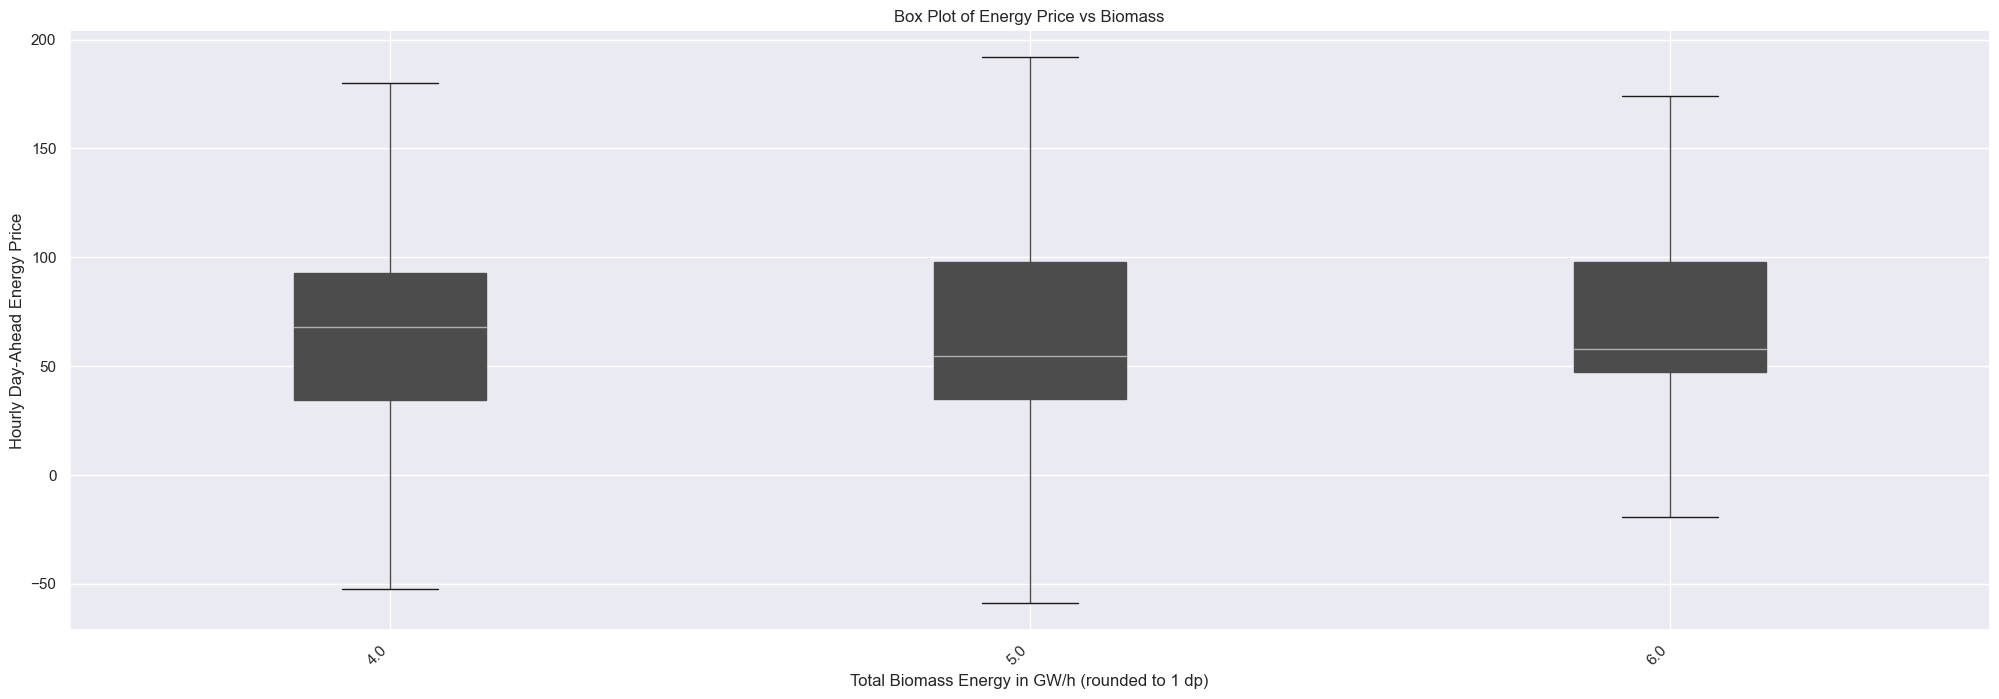

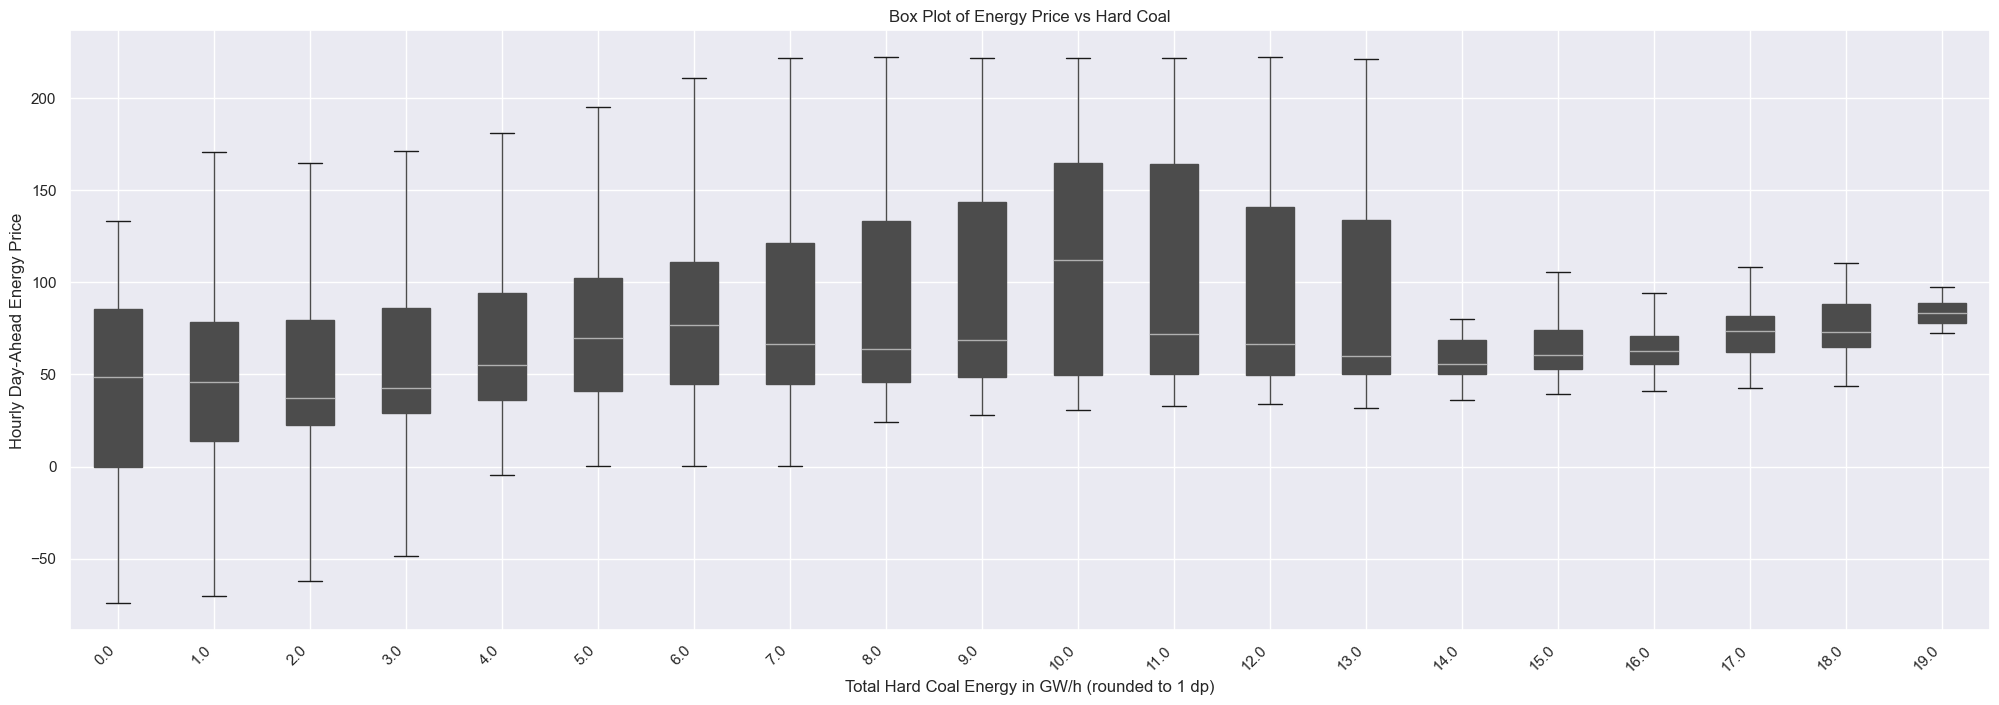

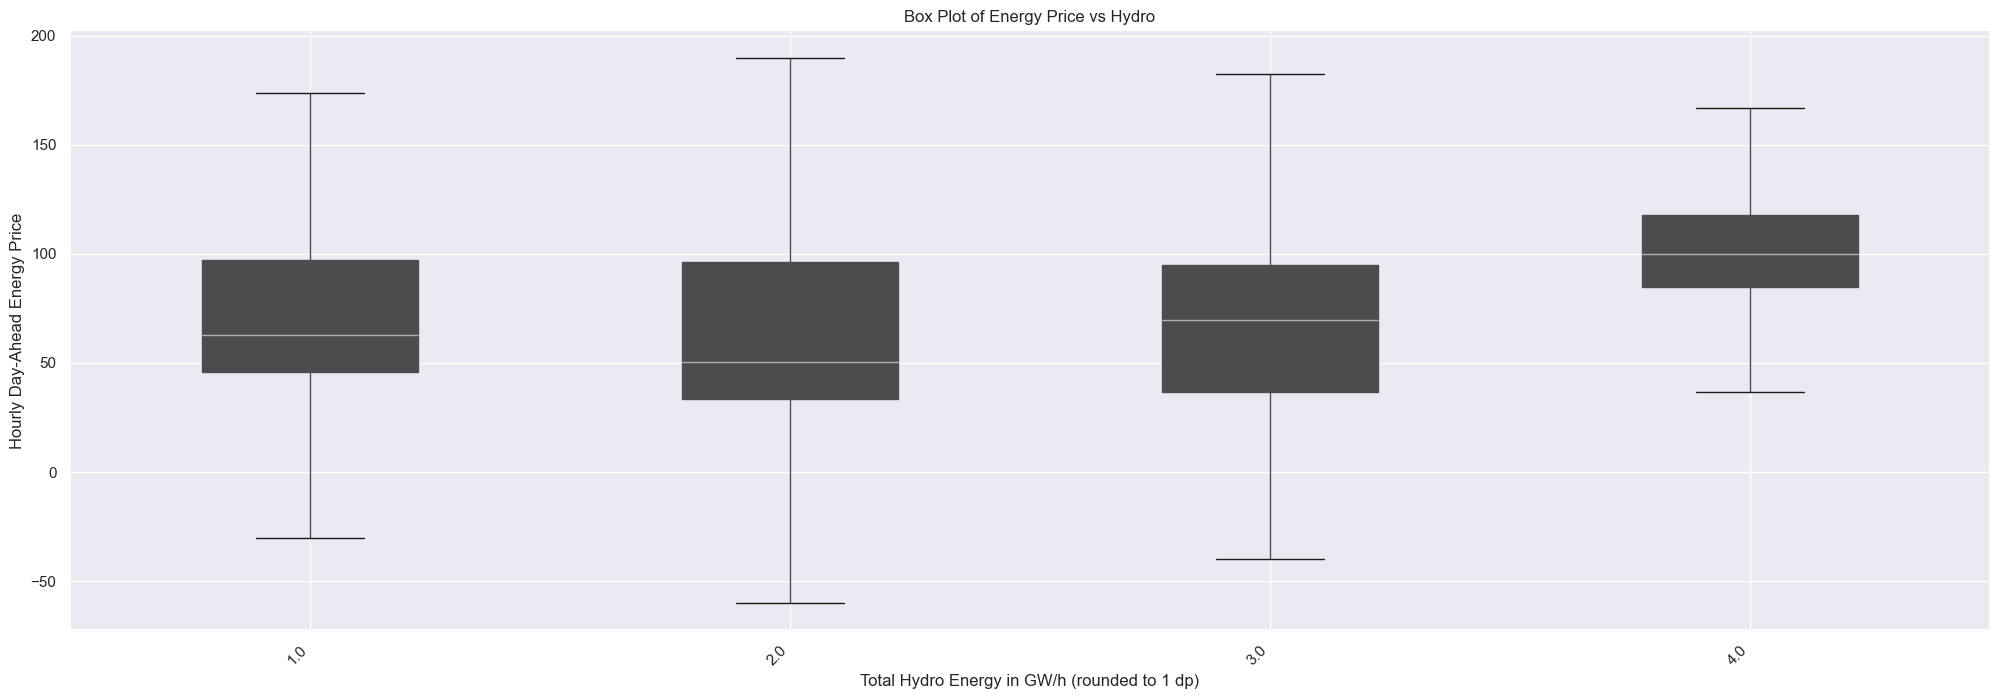

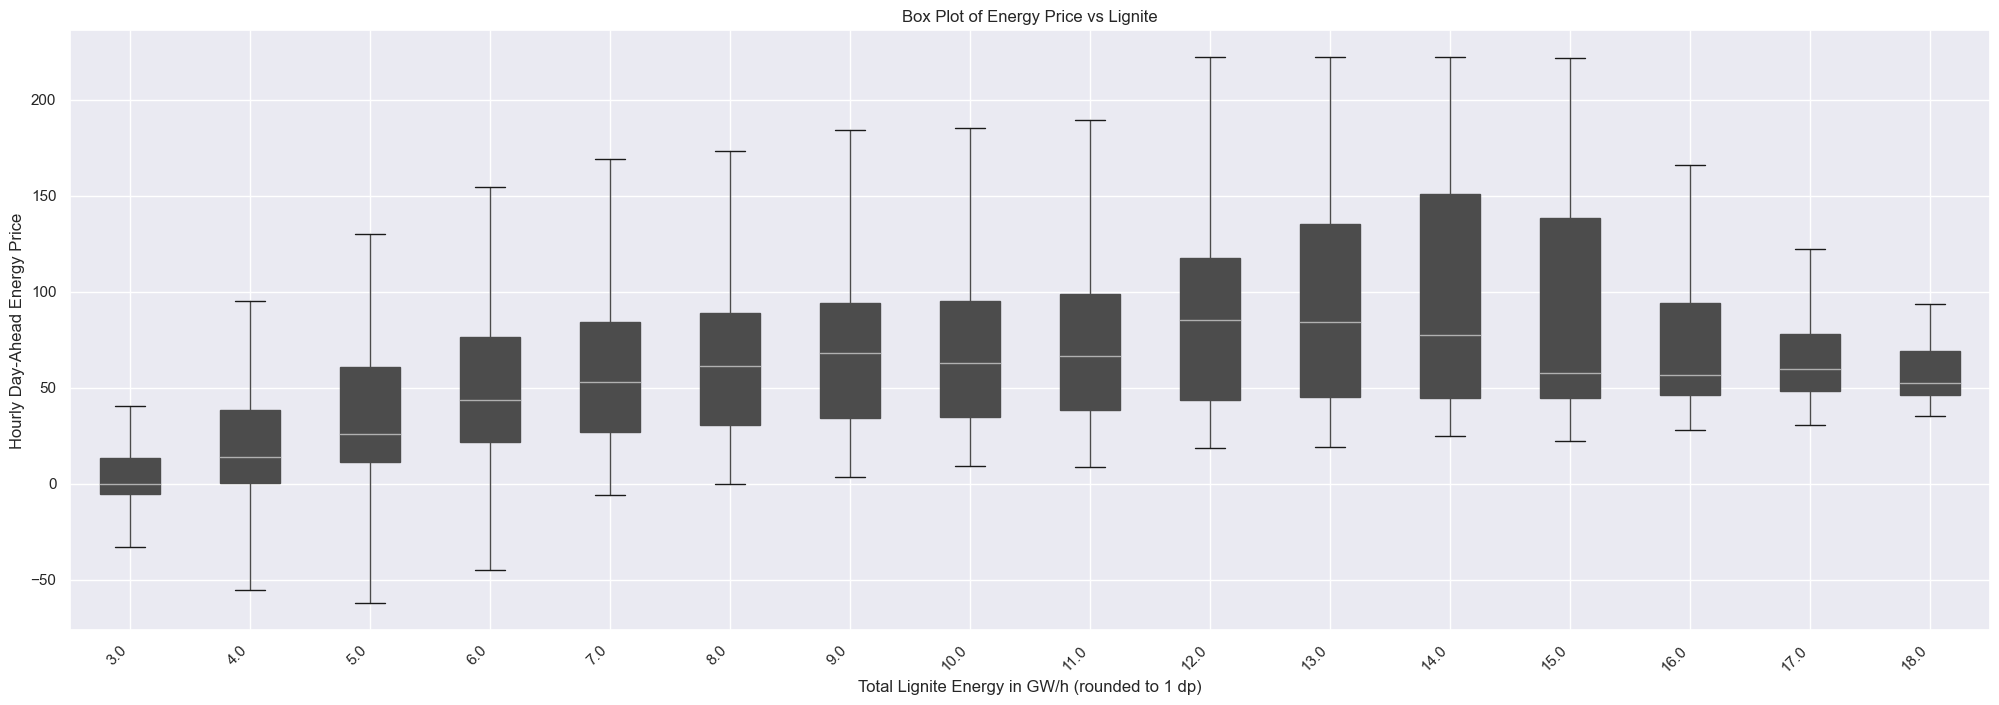

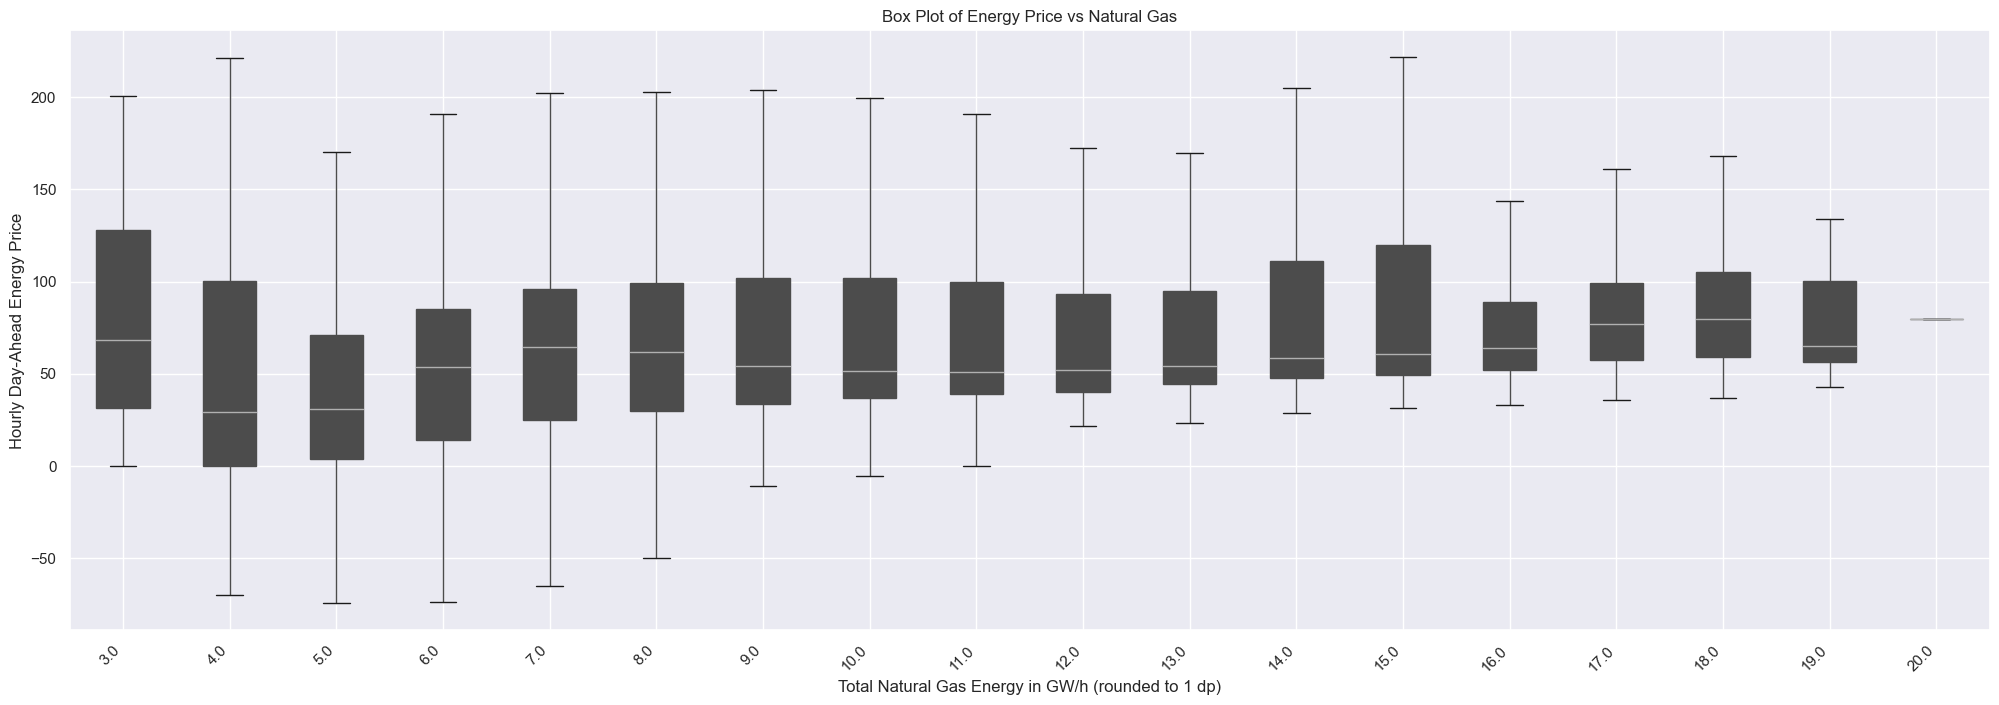

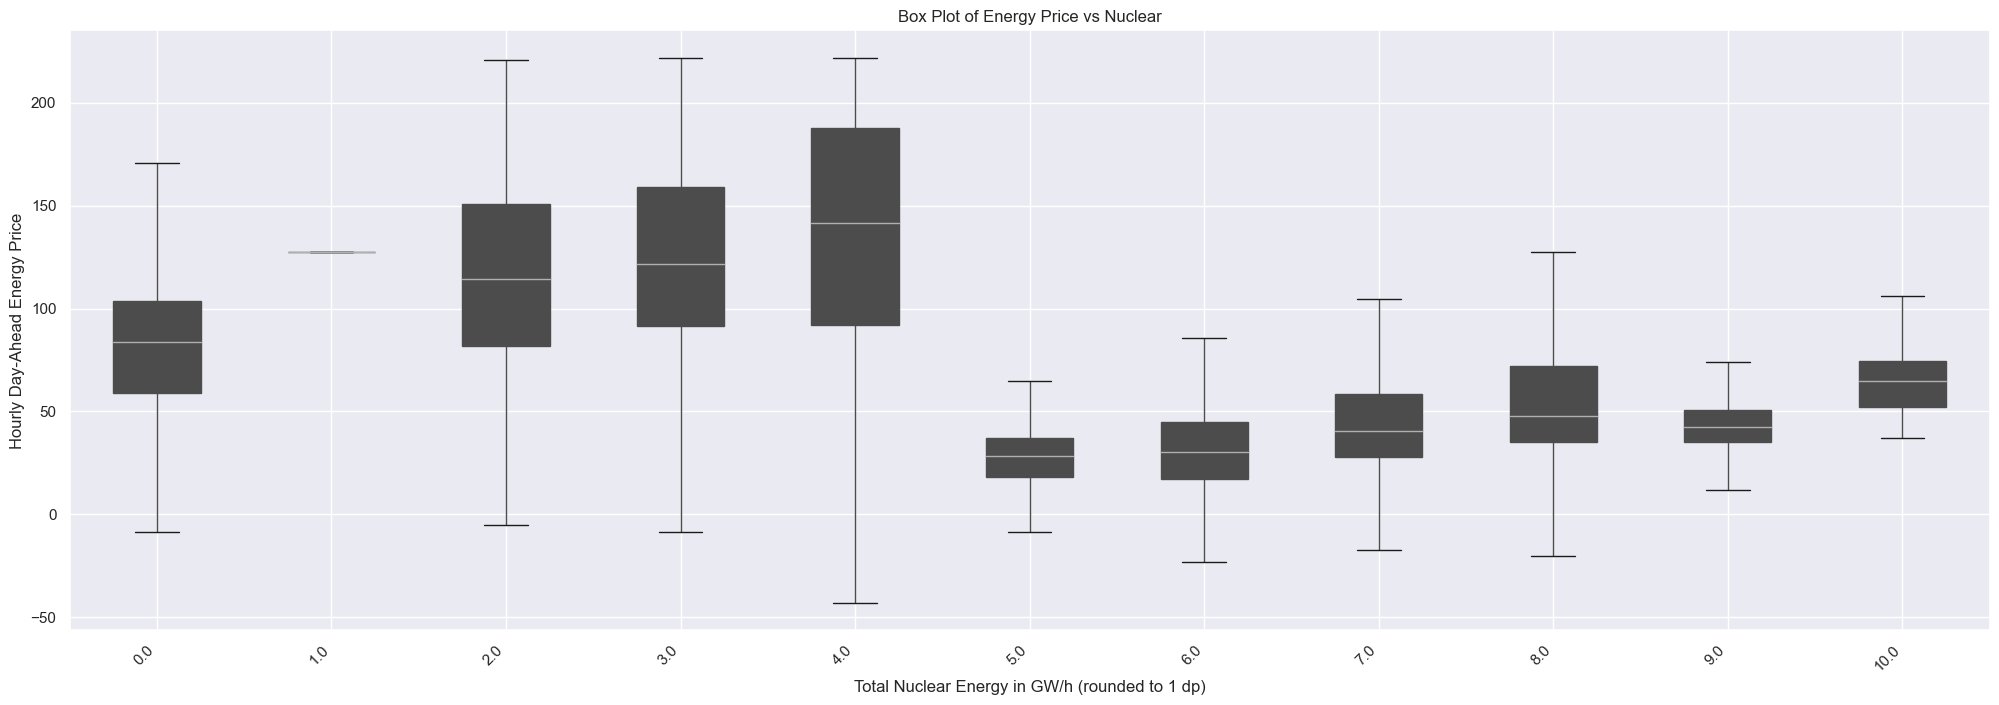

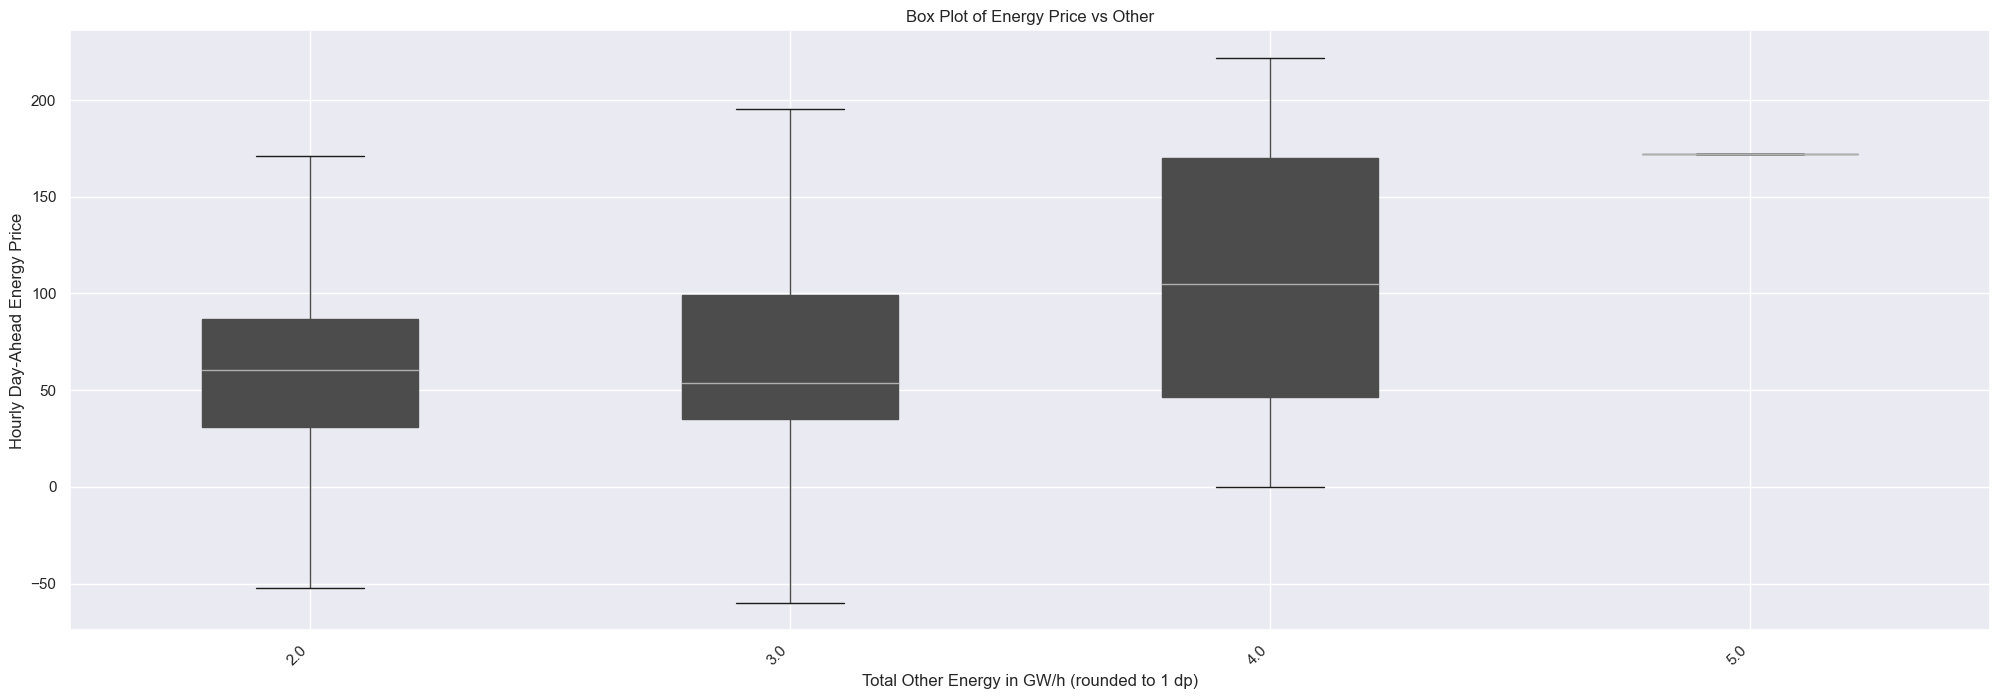

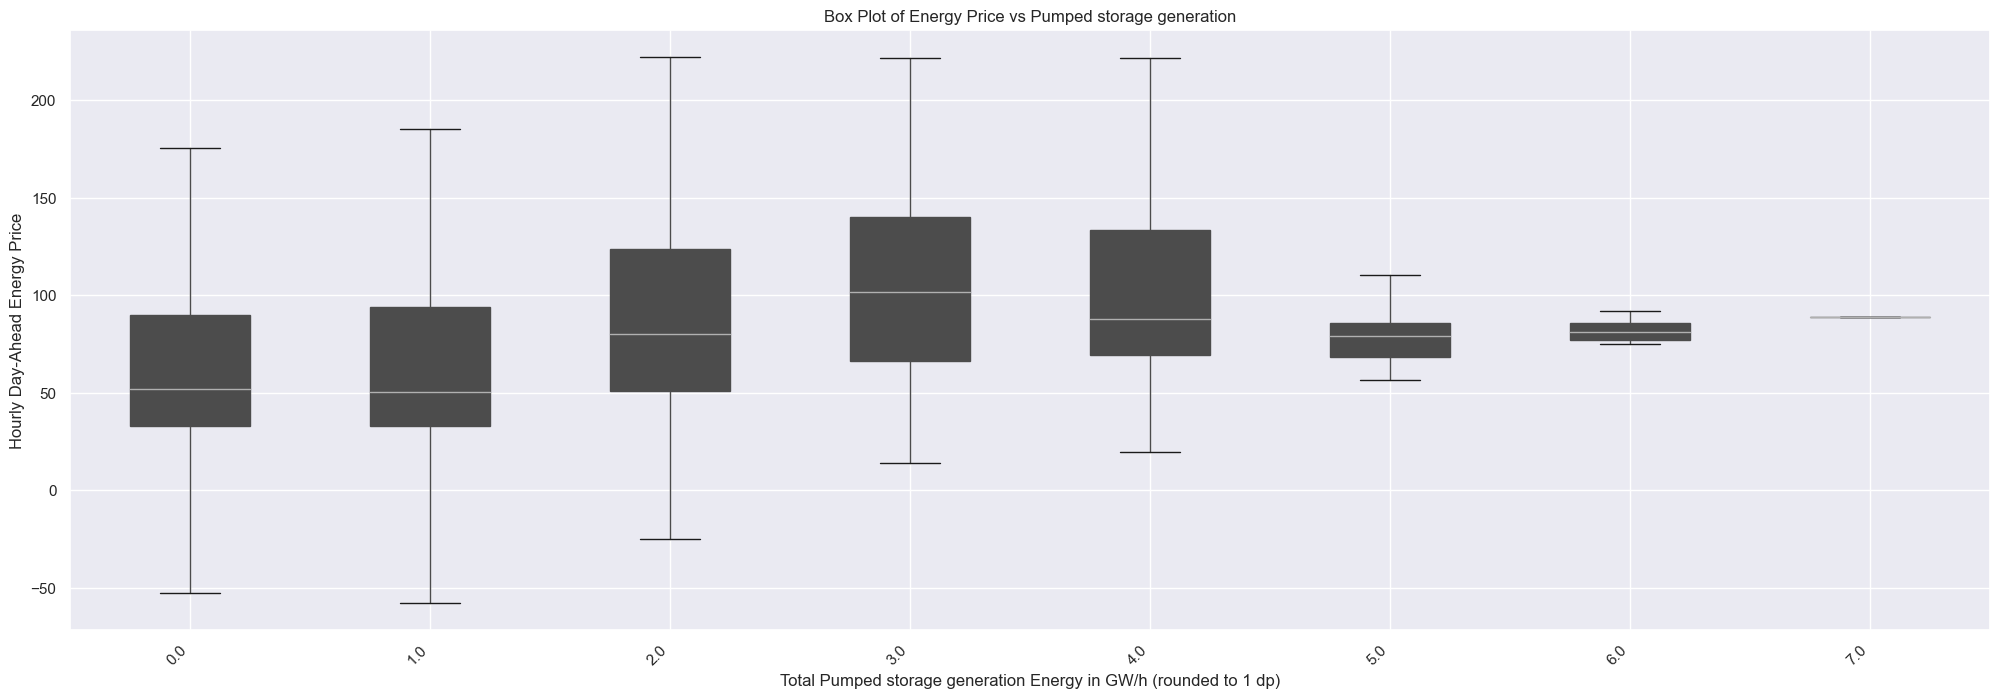

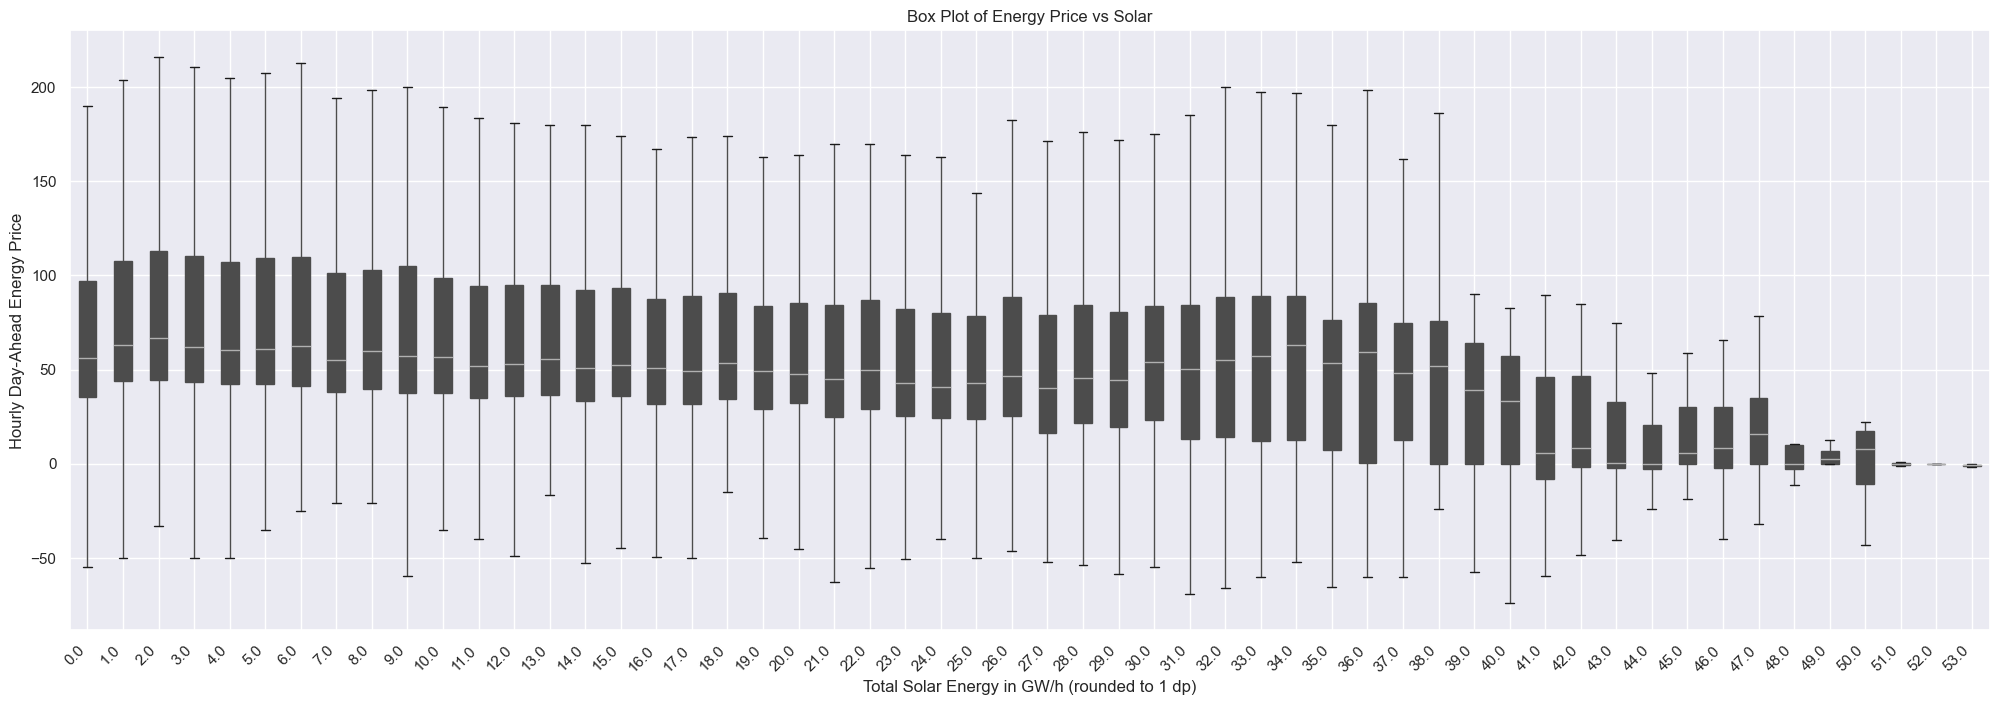

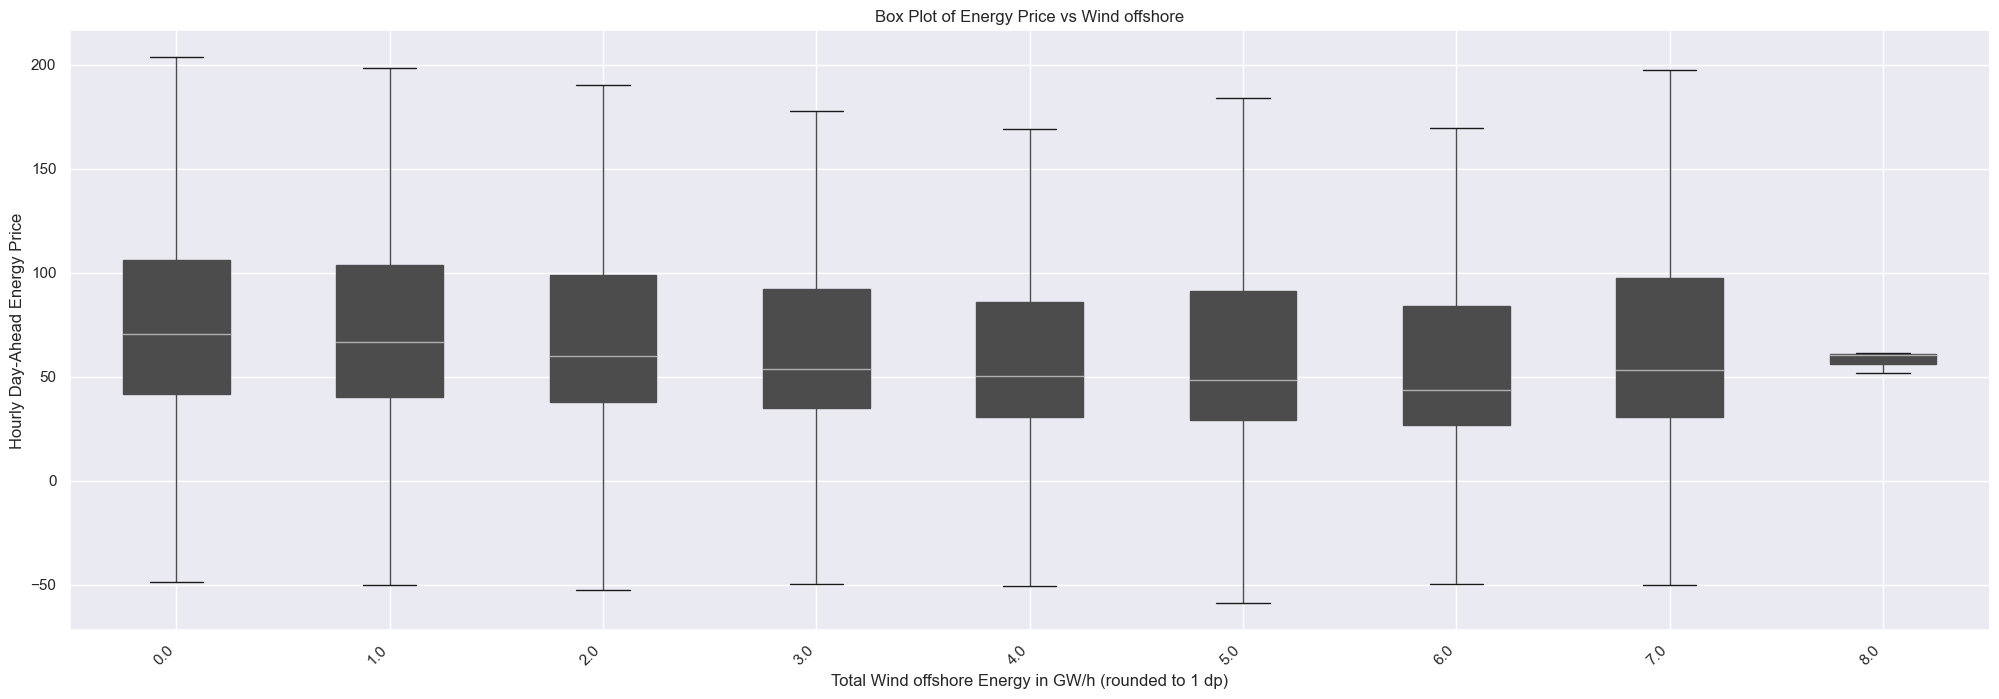

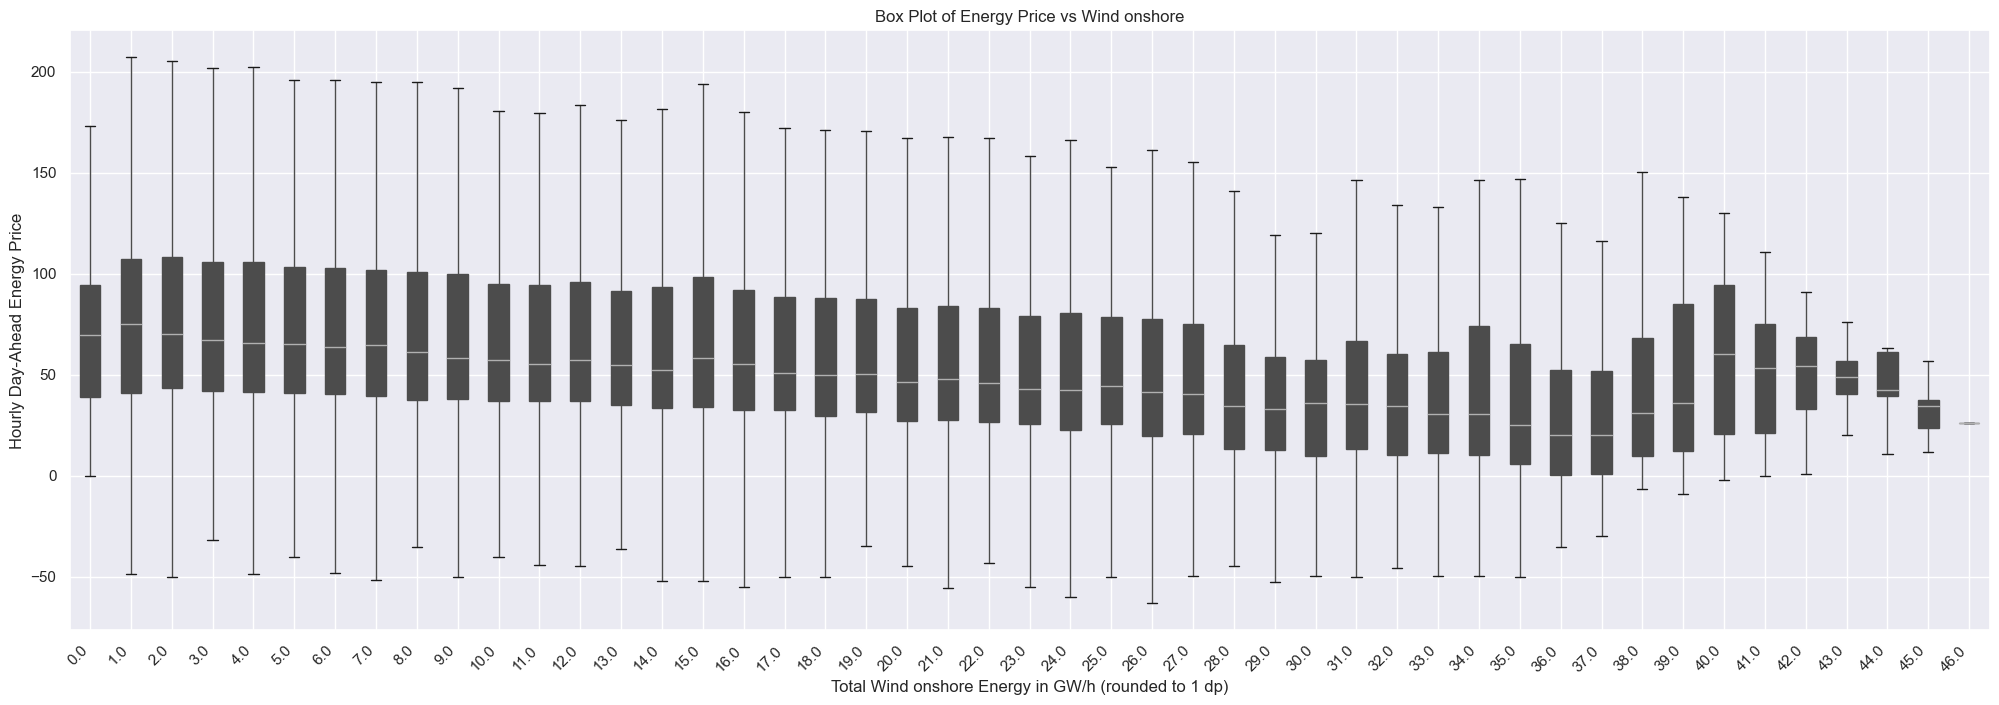

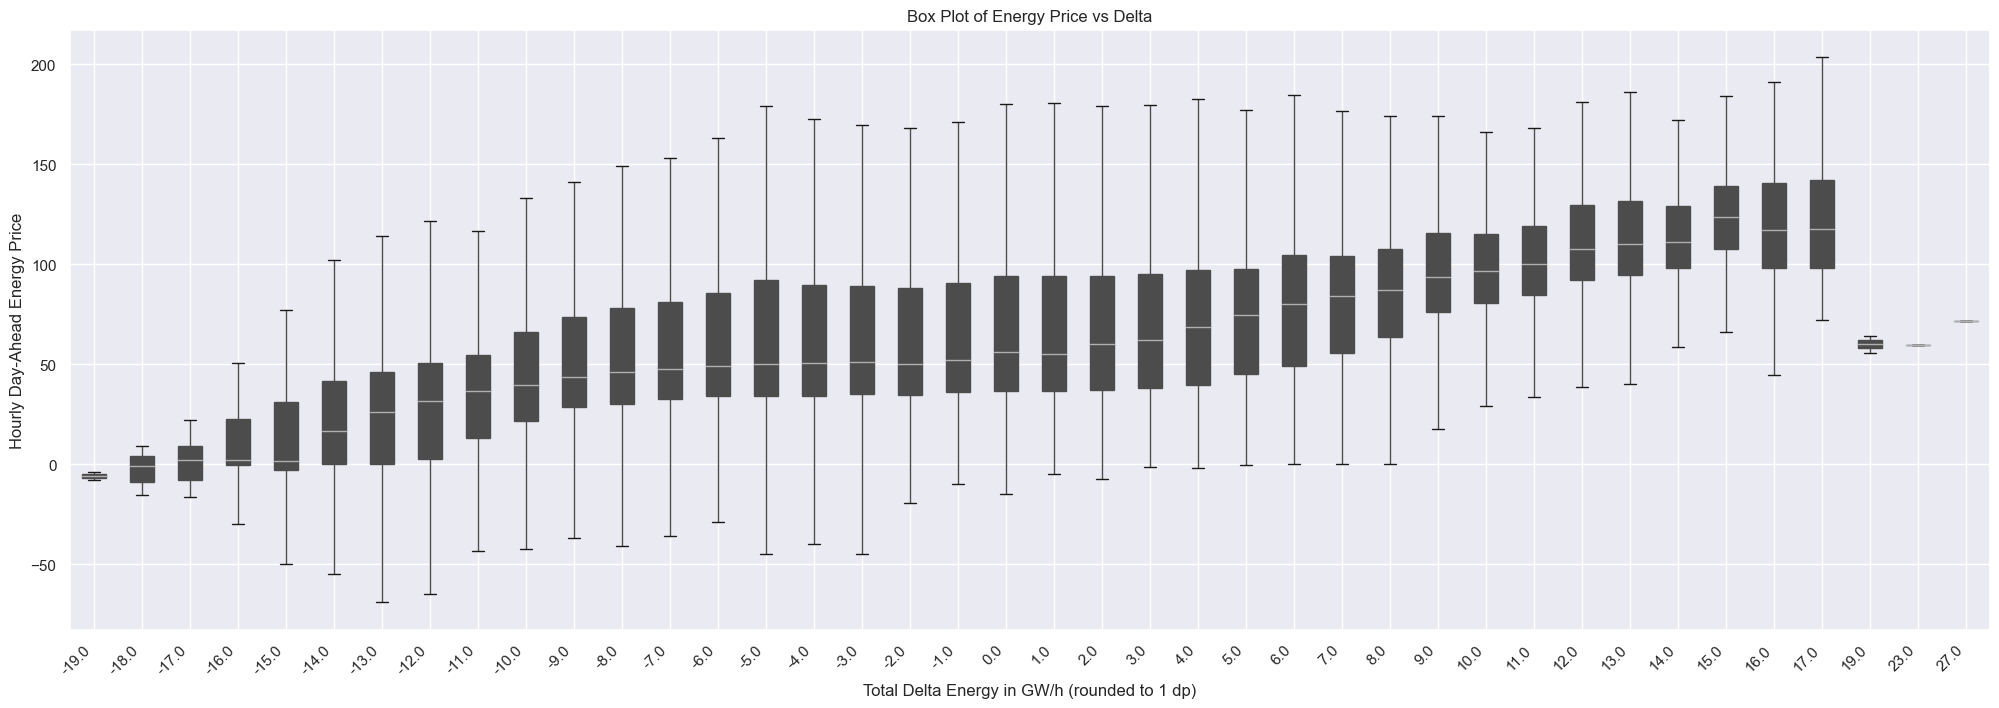

In [21]:
import pandas as pd

energy_mix_df = pd.read_csv("../data/hourly_market_mix_delta_abs.csv")
energy_prices_df = pd.read_csv(
    "../data/day_ahead_energy_prices.csv", 
    usecols=["Datetime", "hourly day-ahead energy price"]
)

# Rename the columns
energy_prices_df.rename(columns={"Datetime": "Timestamp", "hourly day-ahead energy price": "Price"}, inplace=True)


# Convert timestamp columns to datetime format using correct column names
energy_mix_df['Timestamp'] = pd.to_datetime(energy_mix_df['Timestamp'])
energy_prices_df['Timestamp'] = pd.to_datetime(energy_prices_df['Timestamp'])

# Merge datasets on timestamp
merged_df = pd.merge(energy_mix_df, energy_prices_df, on='Timestamp', how='inner')

# Set the Timestamp column as the index
merged_df.set_index('Timestamp', inplace=True)


# Define the min and max energy price thresholds
min_price = -74.44
max_price = 222.01

# Filter the dataframe to remove rows with energy prices outside the range
filtered_df = merged_df[
    (merged_df['Price'] >= min_price) &
    (merged_df['Price'] <= max_price)
]


import matplotlib.pyplot as plt

cols_to_round = filtered_df.columns.difference(['Price'])  # Select all columns except 'Price'
filtered_df.loc[:, cols_to_round] = filtered_df.loc[:, cols_to_round].round(0)

# Remove duplicates based on all columns except 'Price'
filtered_df_unique = filtered_df.drop_duplicates(subset=cols_to_round)

for col in filtered_df_unique.columns:

    if col != "Price":
        fig, ax = plt.subplots(figsize=(24, 8))
        filtered_df_unique.boxplot(ax=ax, column='Price', by=col, vert=True, patch_artist=True, showfliers=False)
        plt.title(f'Box Plot of Energy Price vs {col}')
        plt.suptitle('')
        plt.xlabel(f'Total {col} Energy in GW/h (rounded to 1 dp)')
        plt.ylabel('Hourly Day-Ahead Energy Price')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.show()





# Weather

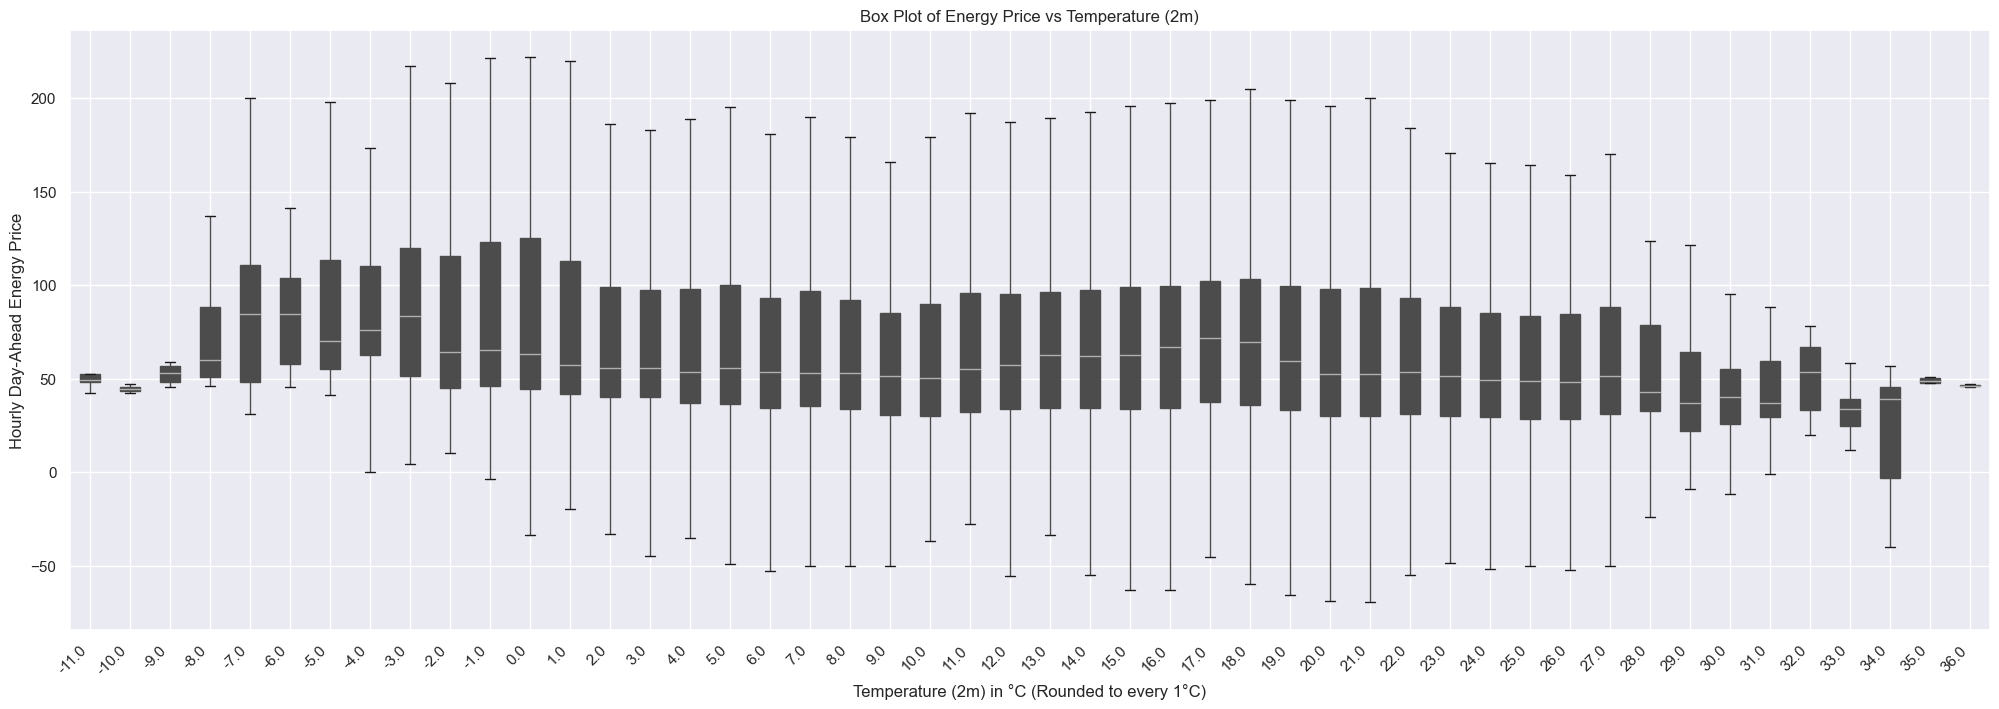

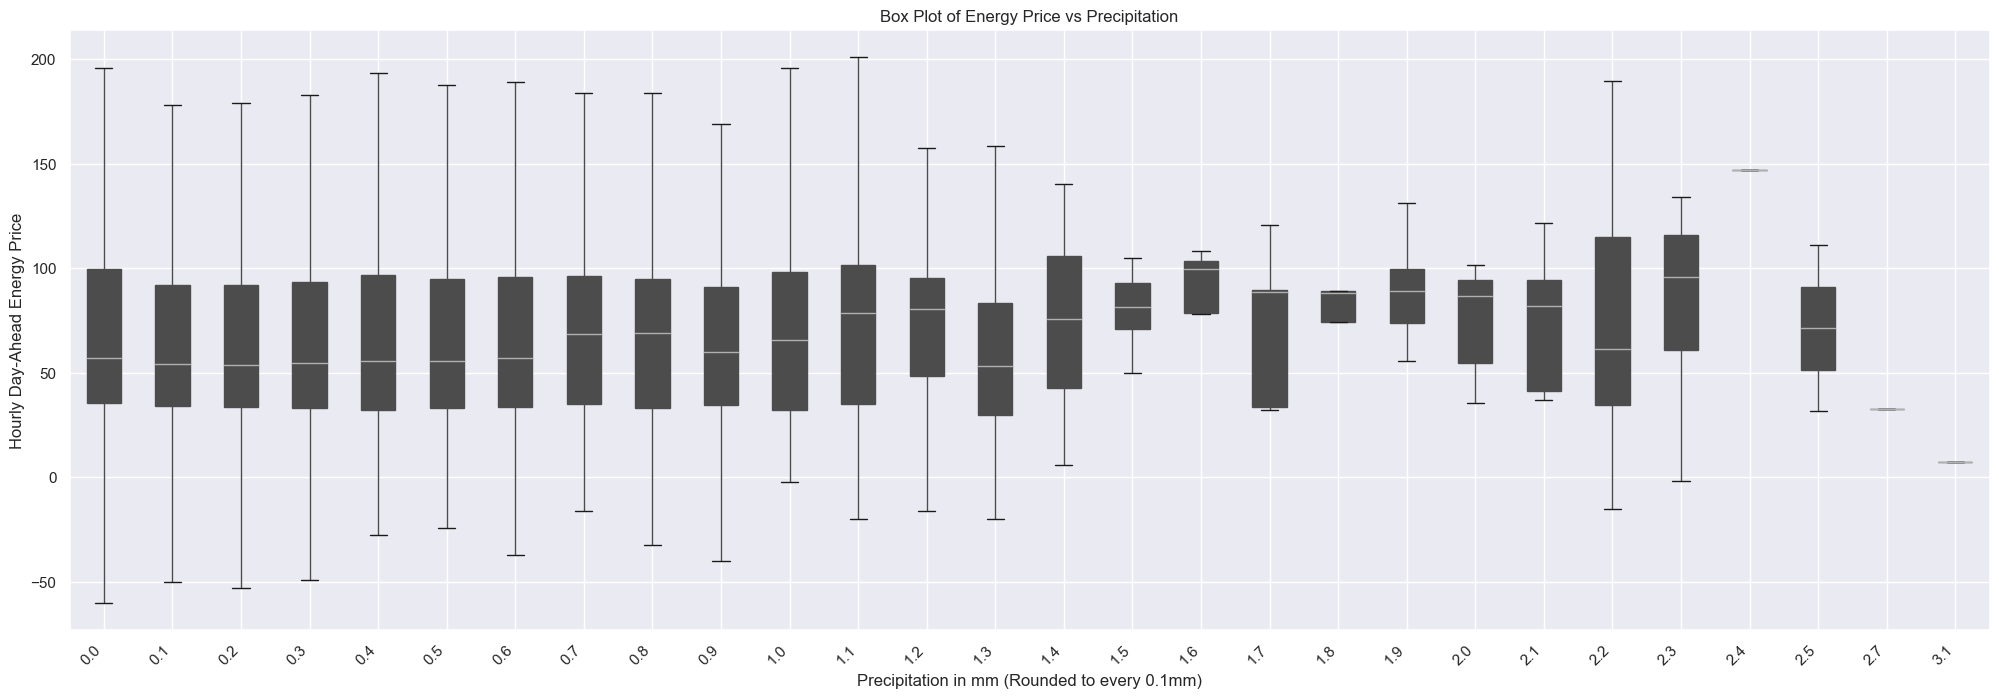

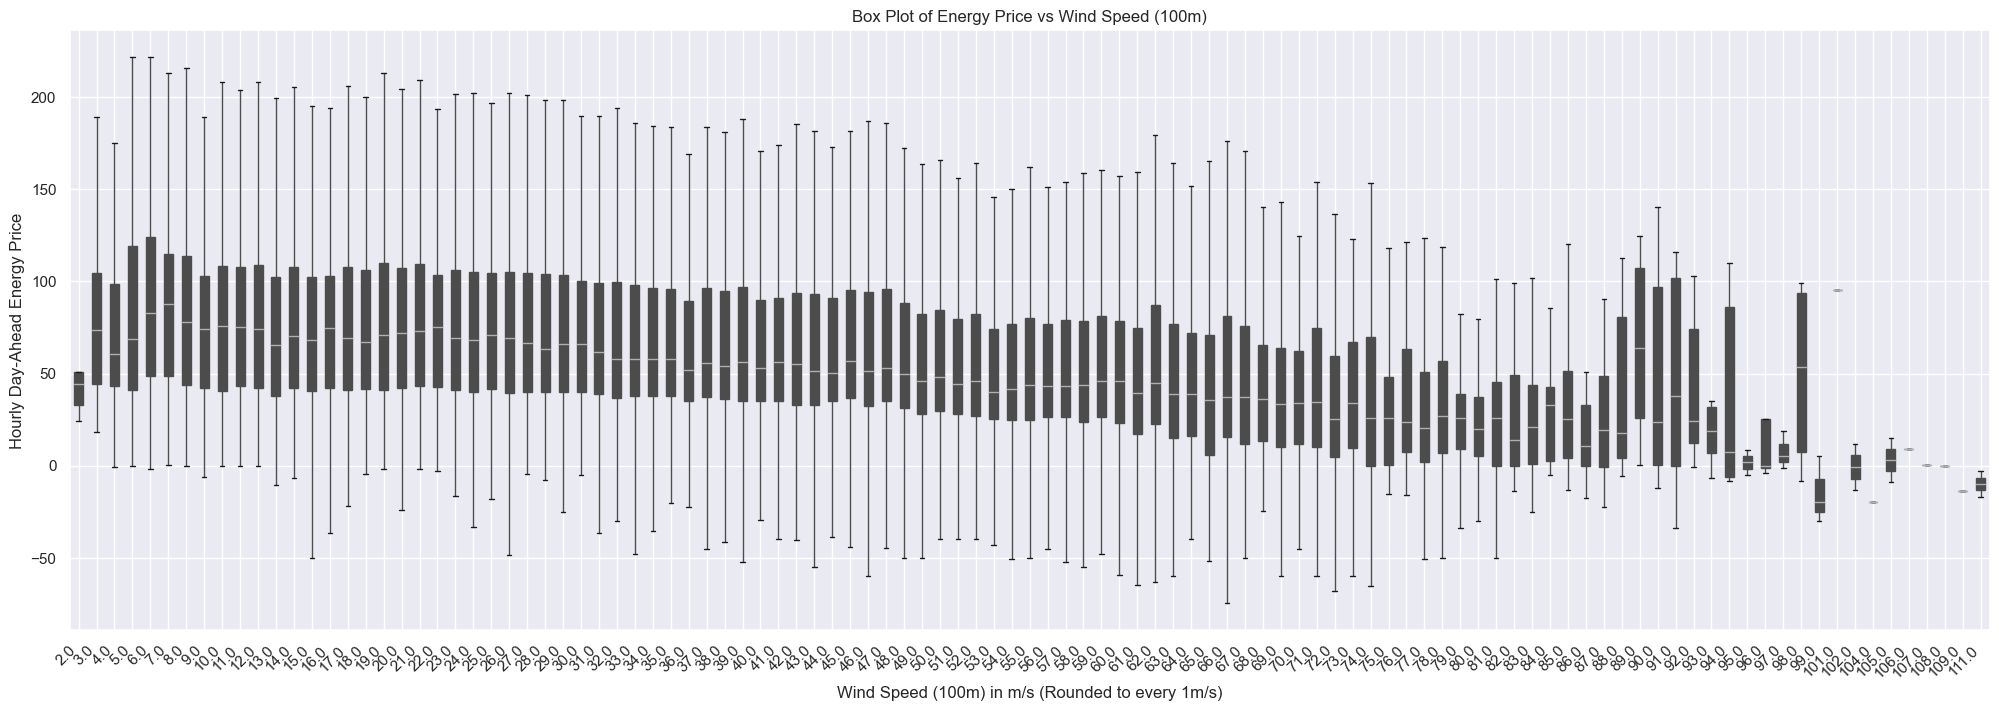

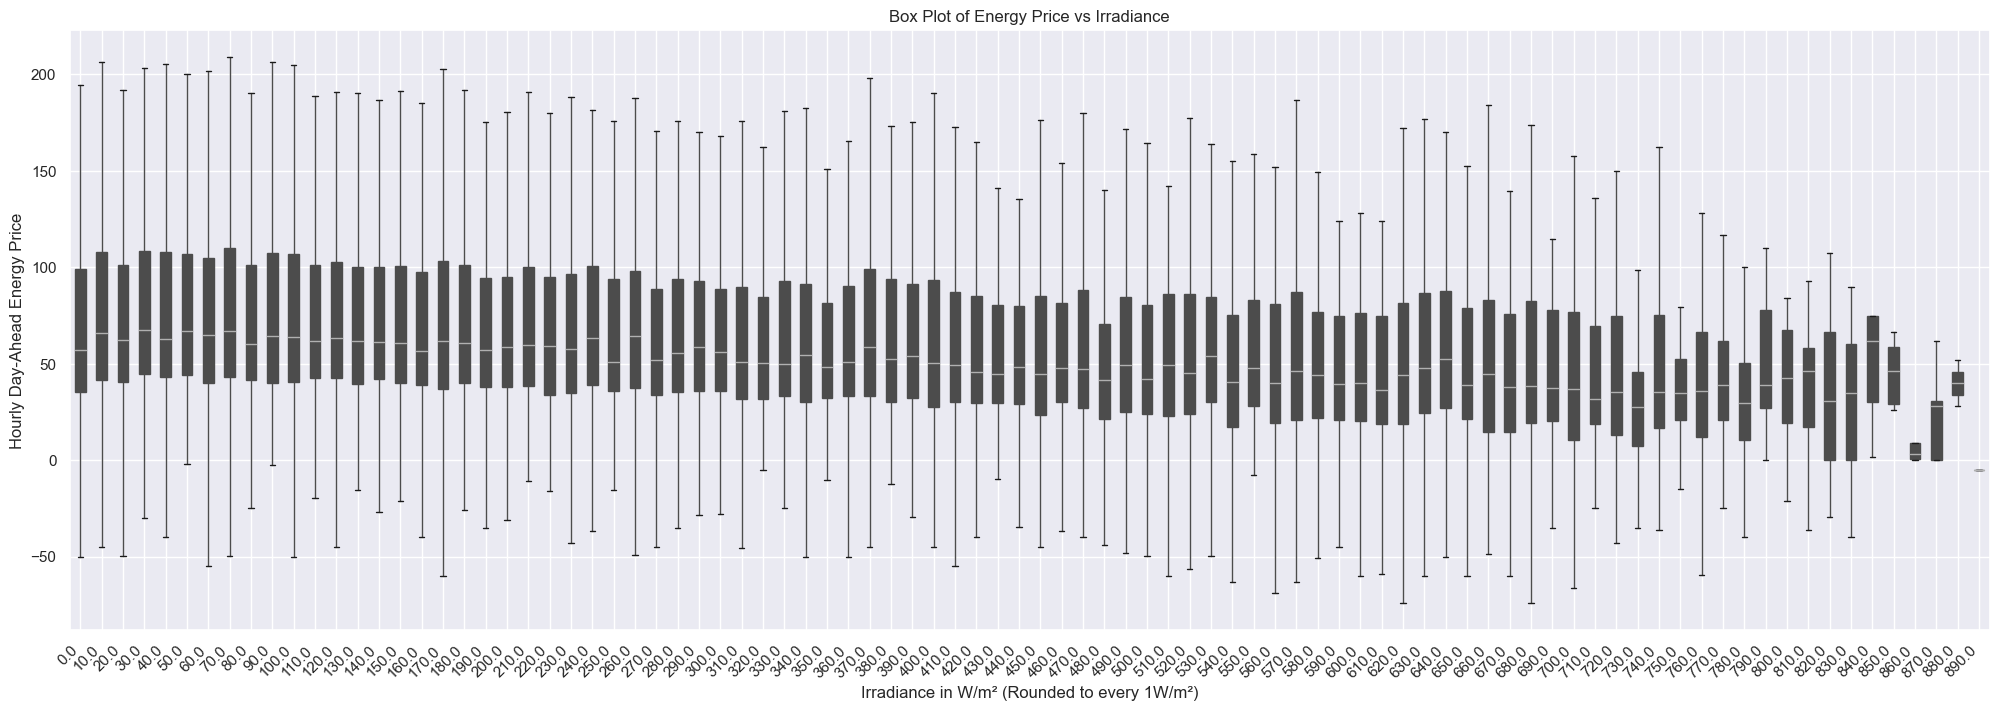

In [14]:
import pandas as pd

weather_df = pd.read_csv("../data/germany_weather_average.csv")
weather_df.rename(columns={"date": "Timestamp", 'temperature_2m': "Temperature (2m)", 'Precipitation (rain/snow)': "Precipitation",'wind_speed_100m': "Wind Speed (100m)",'Global Horizontal Irradiance': "Irradiance"}, inplace=True)
energy_prices_df = pd.read_csv(
    "../data/day_ahead_energy_prices.csv", 
    usecols=["Datetime", "hourly day-ahead energy price"]
)

# Rename the columns
energy_prices_df.rename(columns={"Datetime": "Timestamp", "hourly day-ahead energy price": "Price"}, inplace=True)


# Convert timestamp columns to datetime format using correct column names
weather_df['Timestamp'] = pd.to_datetime(weather_df['Timestamp'])

energy_prices_df['Timestamp'] = pd.to_datetime(energy_prices_df['Timestamp'])

if weather_df['Timestamp'].dt.tz is None:
    weather_df['Timestamp'] = weather_df['Timestamp'].dt.tz_localize('UTC')
else:
    weather_df['Timestamp'] = weather_df['Timestamp'].dt.tz_convert('UTC')

if energy_prices_df['Timestamp'].dt.tz is None:
    energy_prices_df['Timestamp'] = energy_prices_df['Timestamp'].dt.tz_localize('UTC')
else:
    energy_prices_df['Timestamp'] = energy_prices_df['Timestamp'].dt.tz_convert('UTC')


# Merge datasets on timestamp
merged_df = pd.merge(weather_df, energy_prices_df, on='Timestamp', how='inner')

# Set the Timestamp column as the index
merged_df.set_index('Timestamp', inplace=True)


# Define the min and max energy price thresholds
min_price = -74.44
max_price = 222.01

# Filter the dataframe to remove rows with energy prices outside the range
filtered_df = merged_df[
    (merged_df['Price'] >= min_price) &
    (merged_df['Price'] <= max_price)
]


import matplotlib.pyplot as plt

cols_to_round = filtered_df.columns.difference(['Price'])  # Select all columns except 'Price'
filtered_df = filtered_df.round({'Temperature (2m)': 0,'relative_humidity_2m': 0, 'Precipitation': 1,
       'surface_pressure': 0, 'cloud_cover': 0, 'Wind Speed (100m)': 0,
       'sunshine_duration': 1, 'Irradiance': -1, 'direct_radiation': 1})


# Remove duplicates based on all columns except 'Price'
filtered_df_unique = filtered_df.drop_duplicates(subset=cols_to_round)


units = [
    '°C (Rounded to every 1°C)',        # Temperature (2m) (degrees Celsius)
    '%',         # relative_humidity_2m (percentage)
    'mm (Rounded to every 0.1mm)',        # Precipitation (millimeters)
    'hPa',       # surface_pressure (hectopascals)
    '%',         # cloud_cover (percentage)
    'm/s (Rounded to every 1m/s)',       # Wind Speed (100m) (meters per second)
    'seconds',   # sunshine_duration (seconds)
    'W/m² (Rounded to every 1W/m²)',      # Irradiance (watts per square meter)
    'W/m²'       # direct_radiation (watts per square meter)
]


for col, unit in zip(filtered_df_unique.columns, units):

    if col not in ['relative_humidity_2m', 'surface_pressure', 'cloud_cover','sunshine_duration','direct_radiation', 'Price']:
        fig, ax = plt.subplots(figsize=(24, 8))
        filtered_df_unique.boxplot(ax=ax, column='Price', by=col, vert=True, patch_artist=True, showfliers=False)
        plt.title(f'Box Plot of Energy Price vs {col}')
        plt.suptitle('')
        plt.xlabel(f'{col} in {unit}')
        plt.ylabel('Hourly Day-Ahead Energy Price')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.show()


            Biomass     Hard Coal         Hydro       Lignite   Natural Gas   
count  48538.000000  48538.000000  48538.000000  48538.000000  48538.000000  \
mean       4.849972      4.924655      2.241805     10.439352      9.524876   
std        0.306590      3.594411      0.498524      3.844679      2.816460   
min        3.827000      0.313000      0.784000      2.603000      3.356000   
25%        4.610000      2.212000      1.901000      7.291250      7.381250   
50%        4.862000      3.782500      2.218000     10.914000      9.200000   
75%        5.059000      6.621000      2.593000     13.534000     11.255000   
max        5.852000     19.394000      4.167000     17.977000     19.547000   

            Nuclear         Other  Pumped storage generation         Solar   
count  48538.000000  48538.000000               48538.000000  48538.000000  \
mean       4.853687      2.763044                   0.666392      6.259041   
std        3.456344      0.401315                   0.

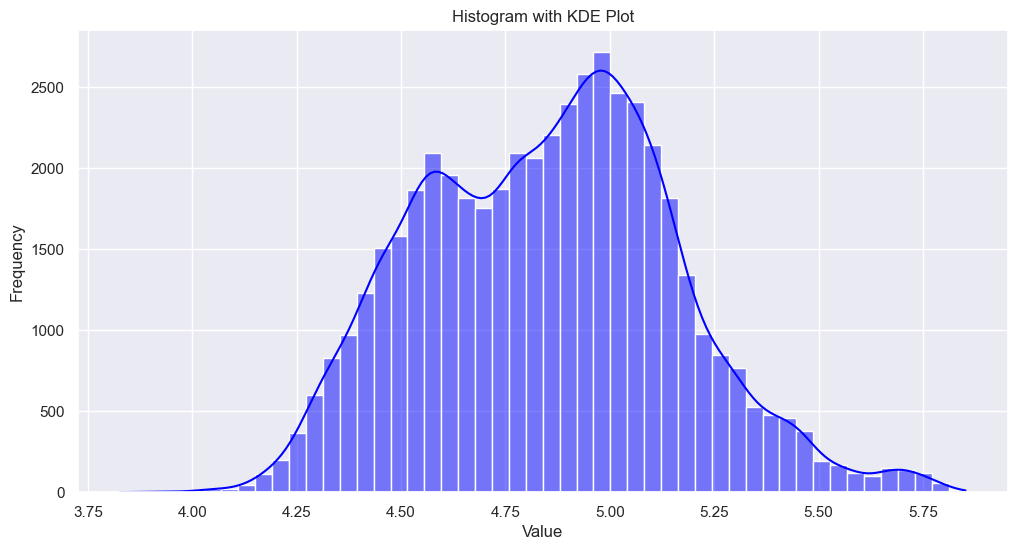

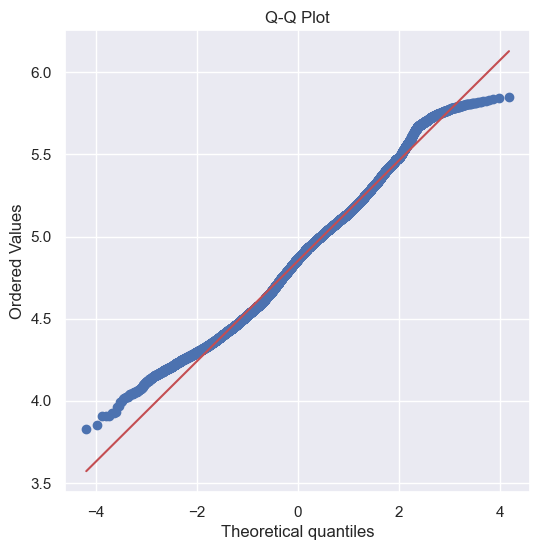


Hard Coal
Kolmogorov-Smirnov Test: Statistic=0.1275, p-value=0.0000


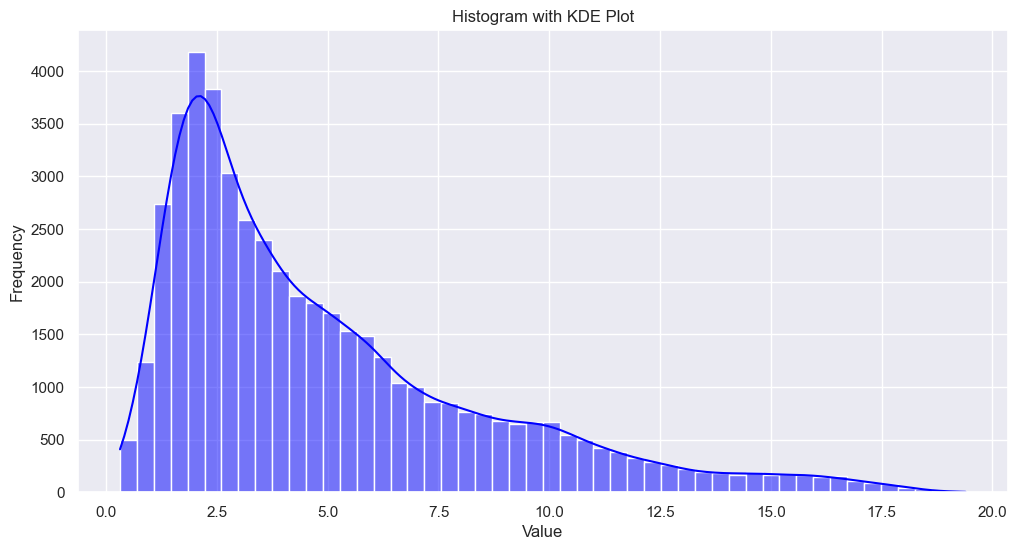

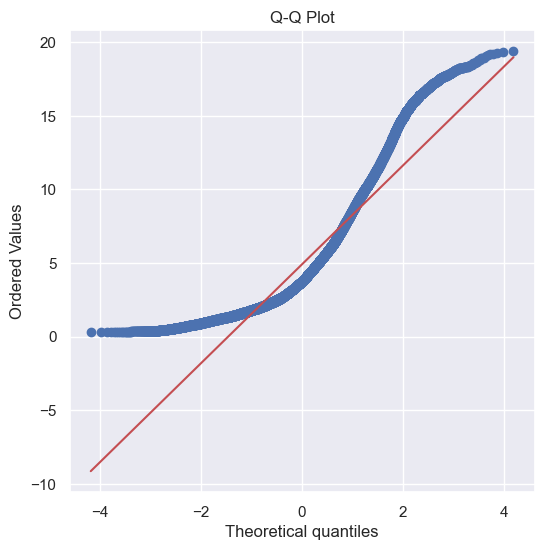


Hydro
Kolmogorov-Smirnov Test: Statistic=0.0204, p-value=0.0000


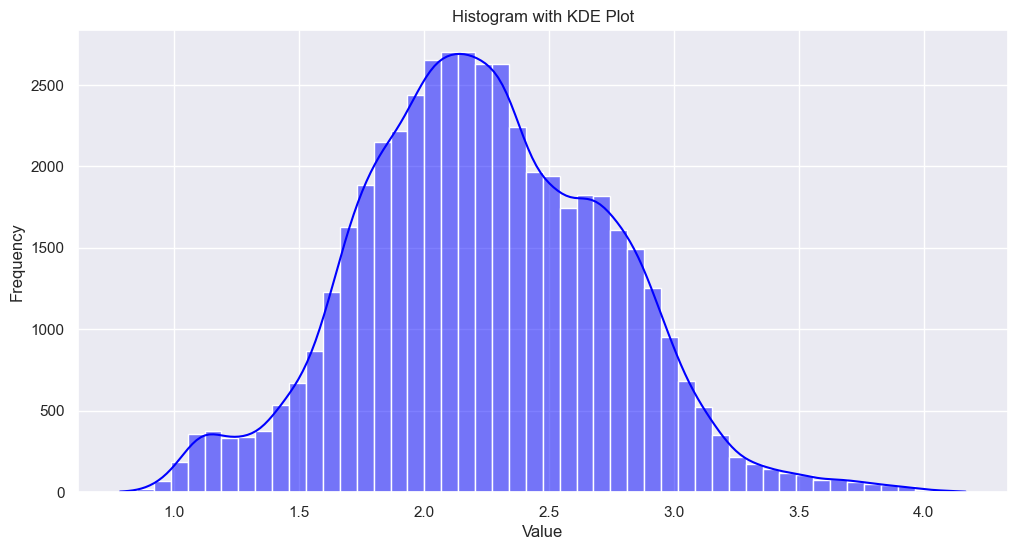

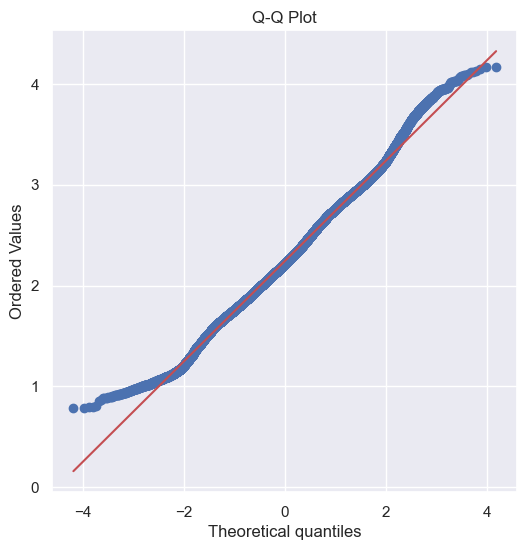


Lignite
Kolmogorov-Smirnov Test: Statistic=0.0554, p-value=0.0000


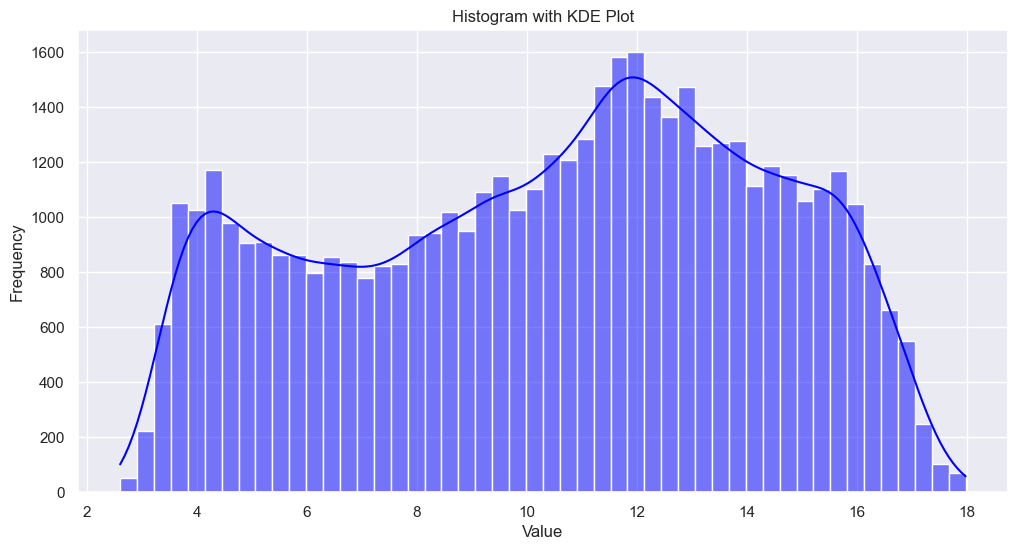

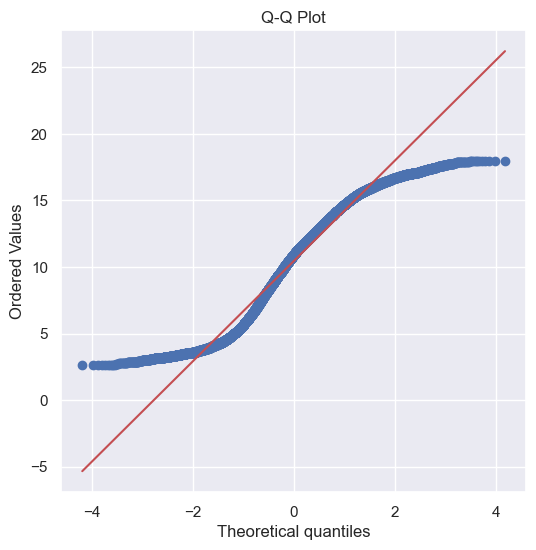


Natural Gas
Kolmogorov-Smirnov Test: Statistic=0.0486, p-value=0.0000


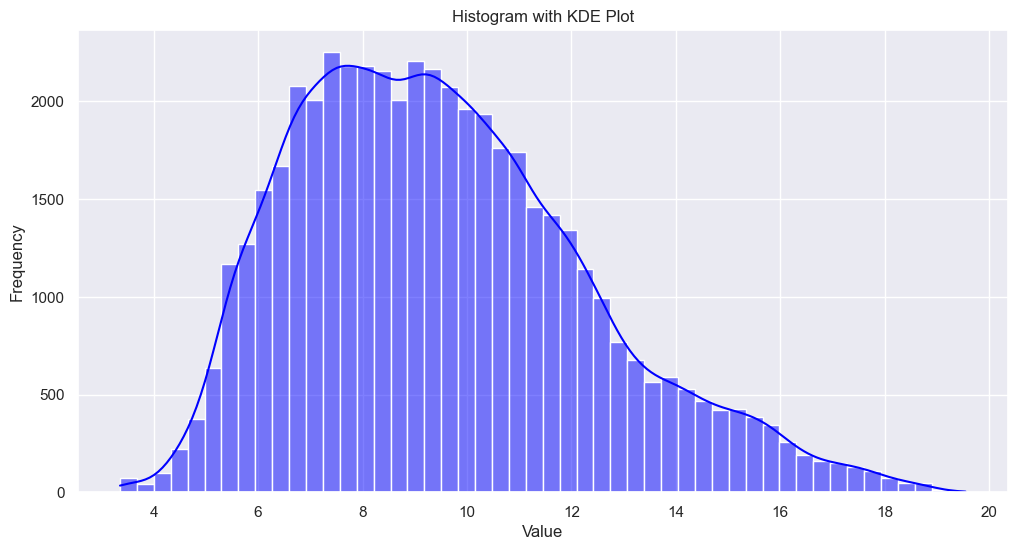

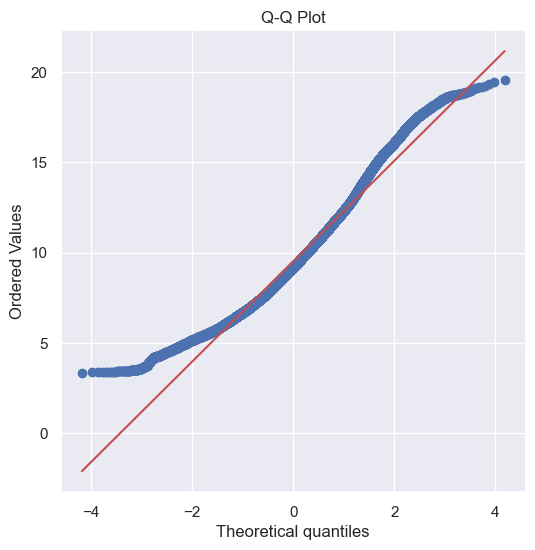


Nuclear
Kolmogorov-Smirnov Test: Statistic=0.1956, p-value=0.0000


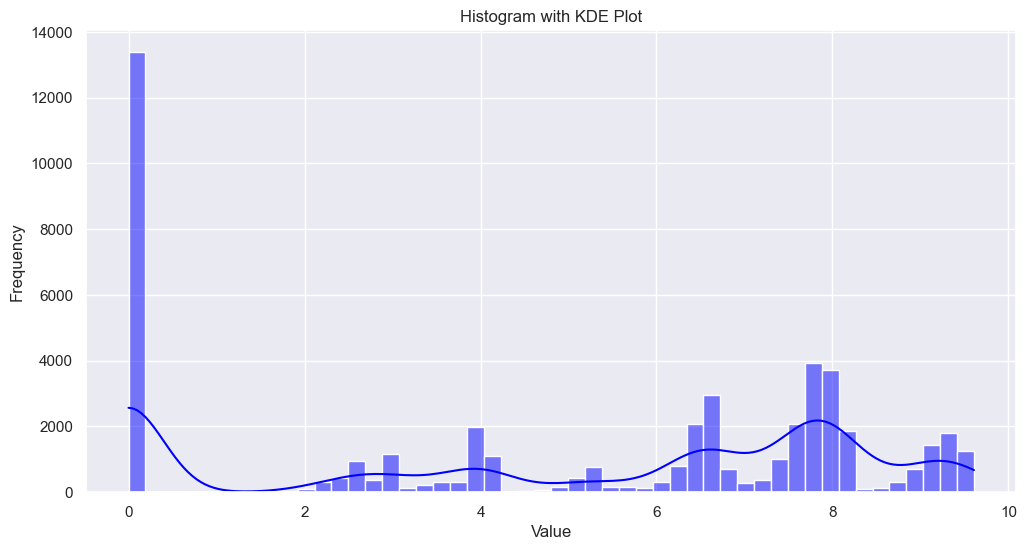

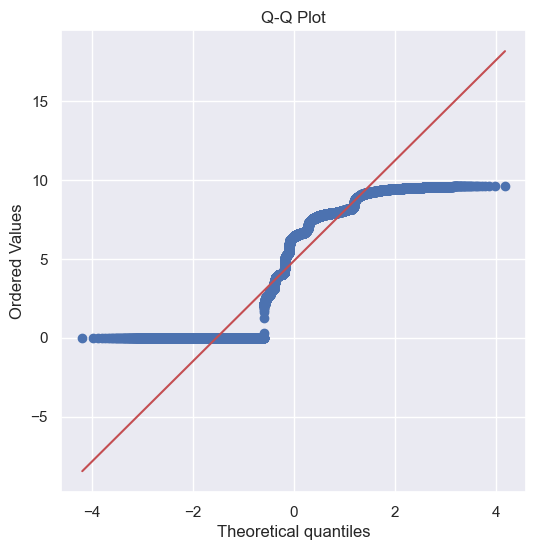


Other
Kolmogorov-Smirnov Test: Statistic=0.0230, p-value=0.0000


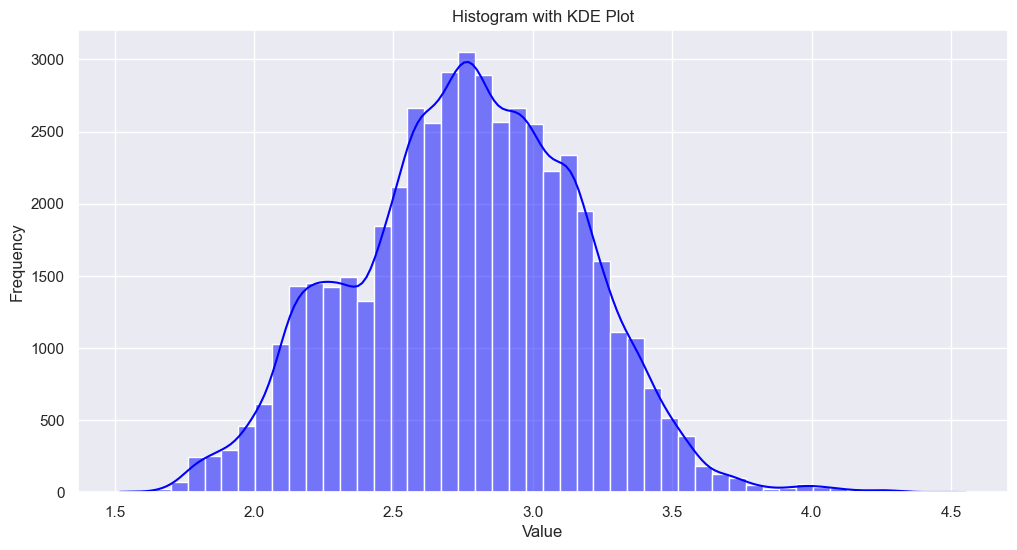

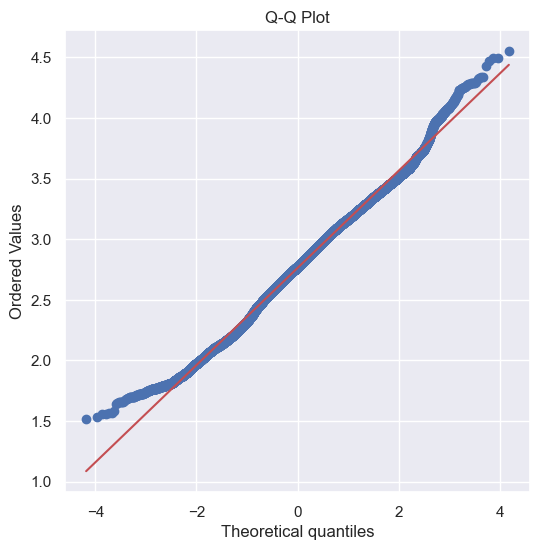


Pumped storage generation
Kolmogorov-Smirnov Test: Statistic=0.1983, p-value=0.0000


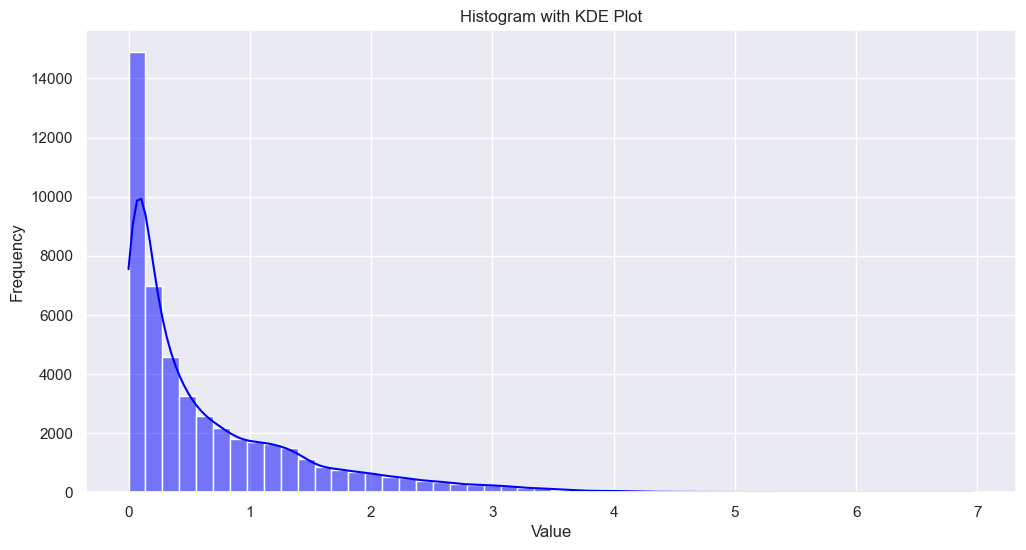

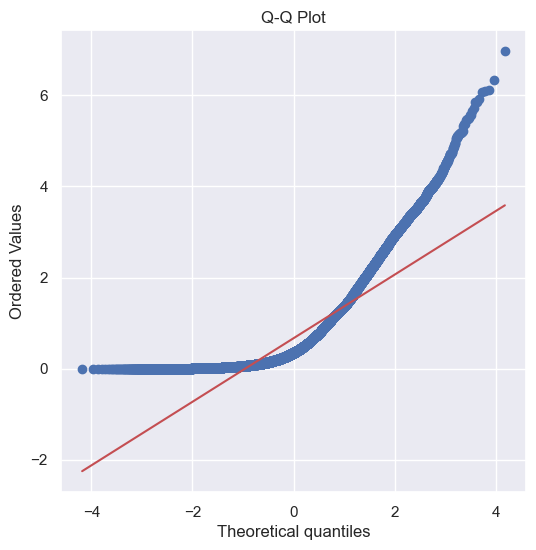


Solar
Kolmogorov-Smirnov Test: Statistic=0.2600, p-value=0.0000


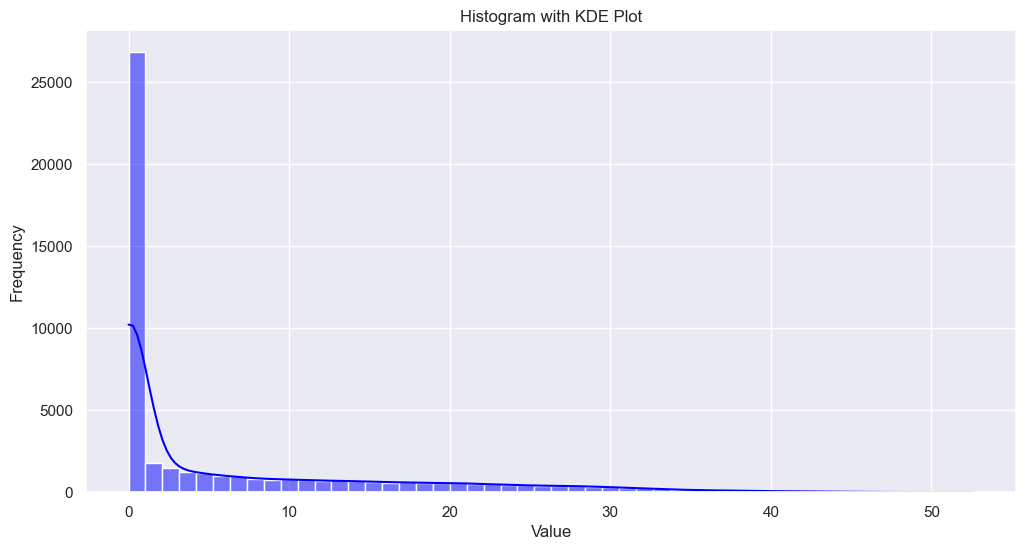

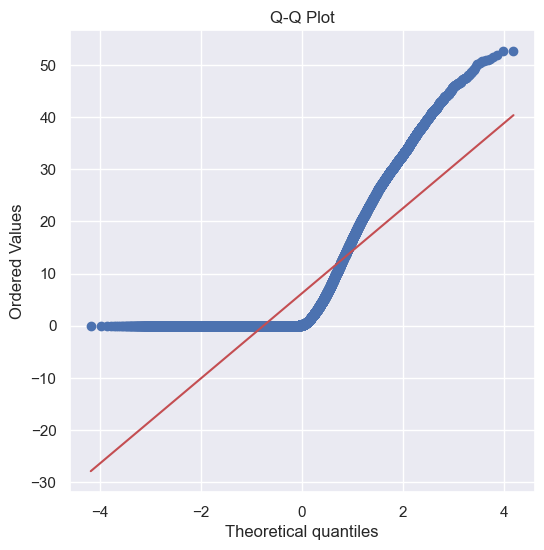


Wind offshore
Kolmogorov-Smirnov Test: Statistic=0.0829, p-value=0.0000


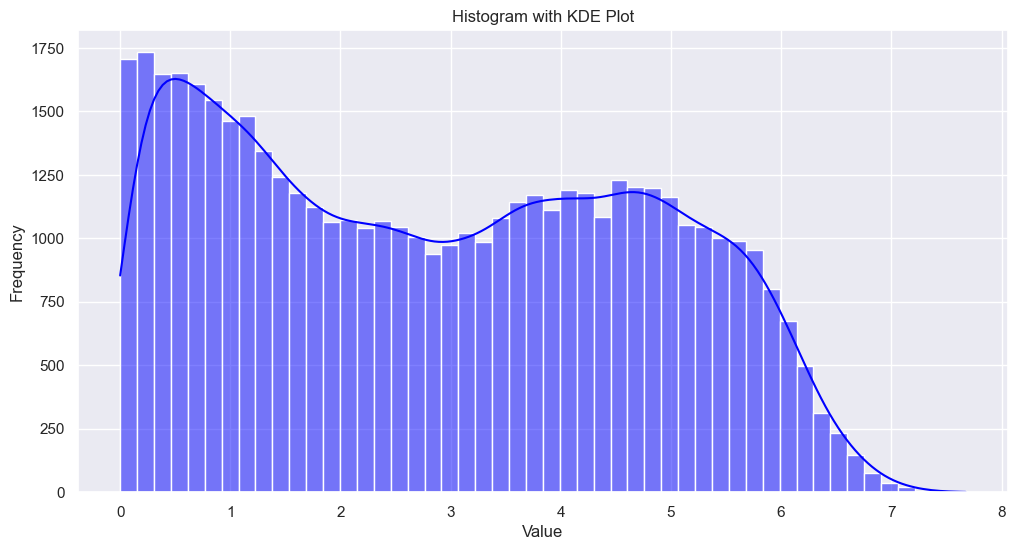

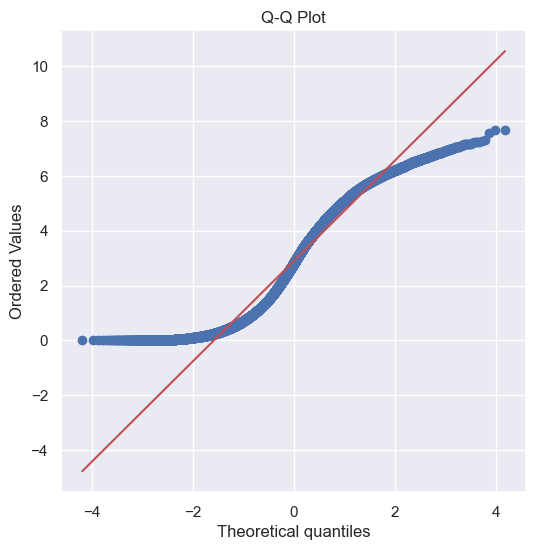


Wind onshore
Kolmogorov-Smirnov Test: Statistic=0.1140, p-value=0.0000


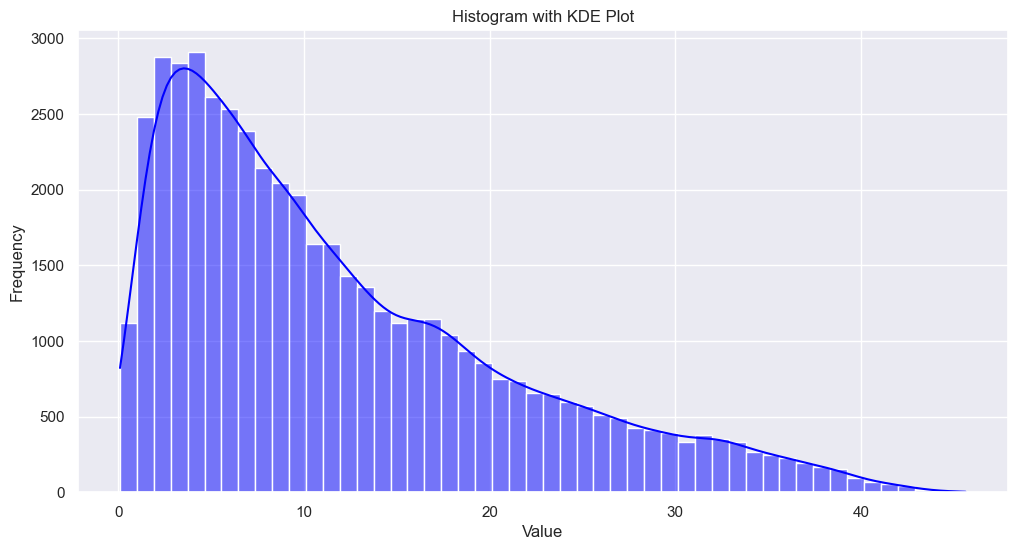

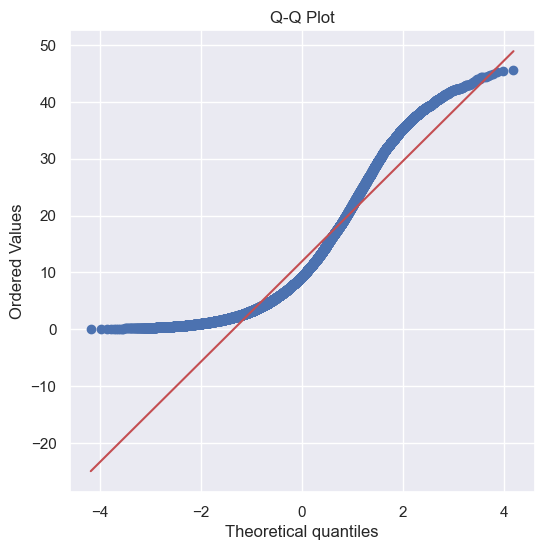


Delta
Kolmogorov-Smirnov Test: Statistic=0.0400, p-value=0.0000


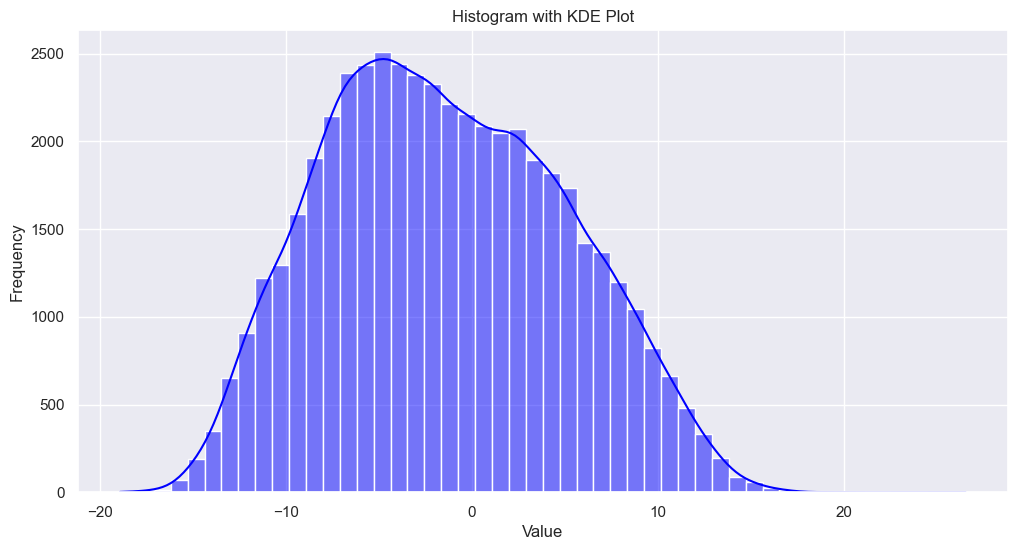

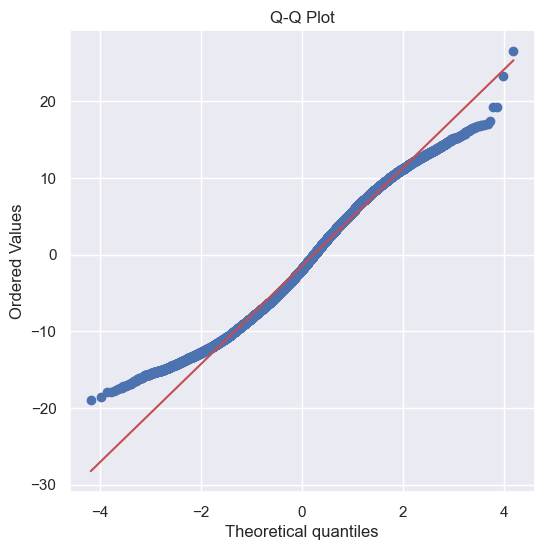


Price
Kolmogorov-Smirnov Test: Statistic=0.1096, p-value=0.0000


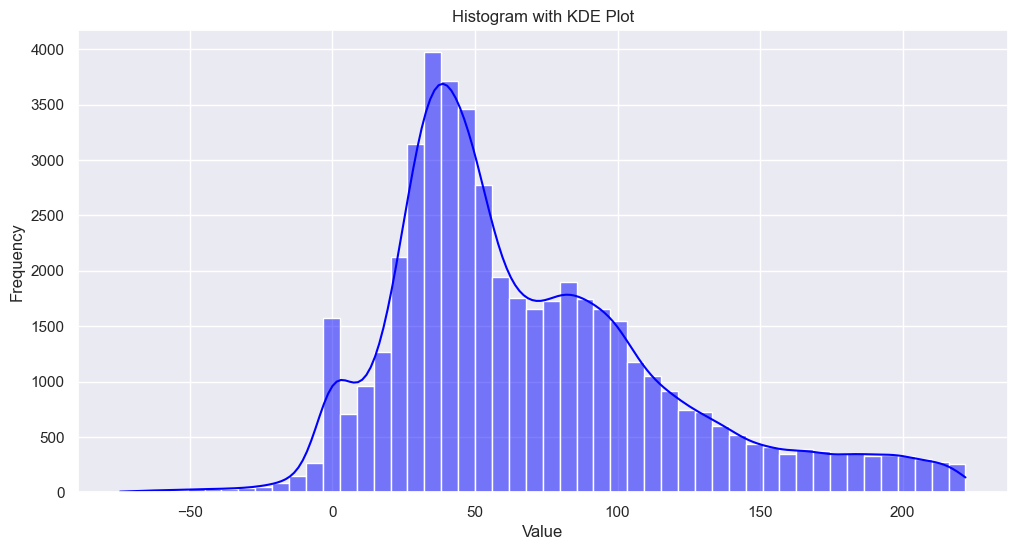

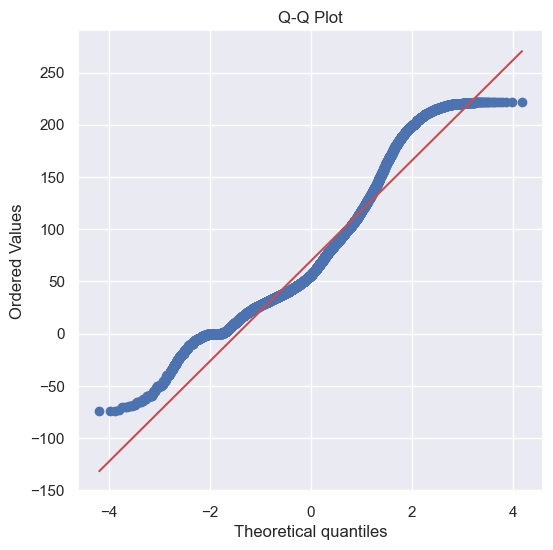

In [29]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

price_df = pd.read_csv("../data/day_ahead_energy_prices.csv")
price_df.rename(columns={"Datetime": "Timestamp", "hourly day-ahead energy price": "Price"}, inplace=True)

min_price = -74.44
max_price = 222.01

# Filter the dataframe to remove rows with energy prices outside the range
price_df = price_df[
    (price_df['Price'] >= min_price) &
    (price_df['Price'] <= max_price)
]

energy_mix_df = pd.read_csv("../data/hourly_market_mix_delta_abs.csv")
# Merge datasets on timestamp
merged_df = pd.merge(energy_mix_df, price_df, on='Timestamp', how='inner')

# Set the Timestamp column as the index
merged_df.set_index('Timestamp', inplace=True)

# Load your dataset (example with random normal data)
# Replace this with your actual data

# Kolmogorov-Smirnov test (against normal distribution)

print(merged_df.describe())
print(merged_df.isnull)

for col in merged_df.columns:
    print(f"\n{col}")
    
    ks_stat, ks_p = stats.kstest(merged_df[col], 'norm', args=(np.mean(merged_df[col]), np.std(merged_df[col])))
    print(f"Kolmogorov-Smirnov Test: Statistic={ks_stat:.4f}, p-value={ks_p:.4f}")

    # Visualization
    plt.figure(figsize=(12, 6))

    # Histogram with density plot
    sns.histplot(merged_df[col], kde=True, bins=50, color='blue')
    plt.title('Histogram with KDE Plot')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

    # Q-Q Plot
    plt.figure(figsize=(6, 6))
    stats.probplot(merged_df[col], dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    plt.show()


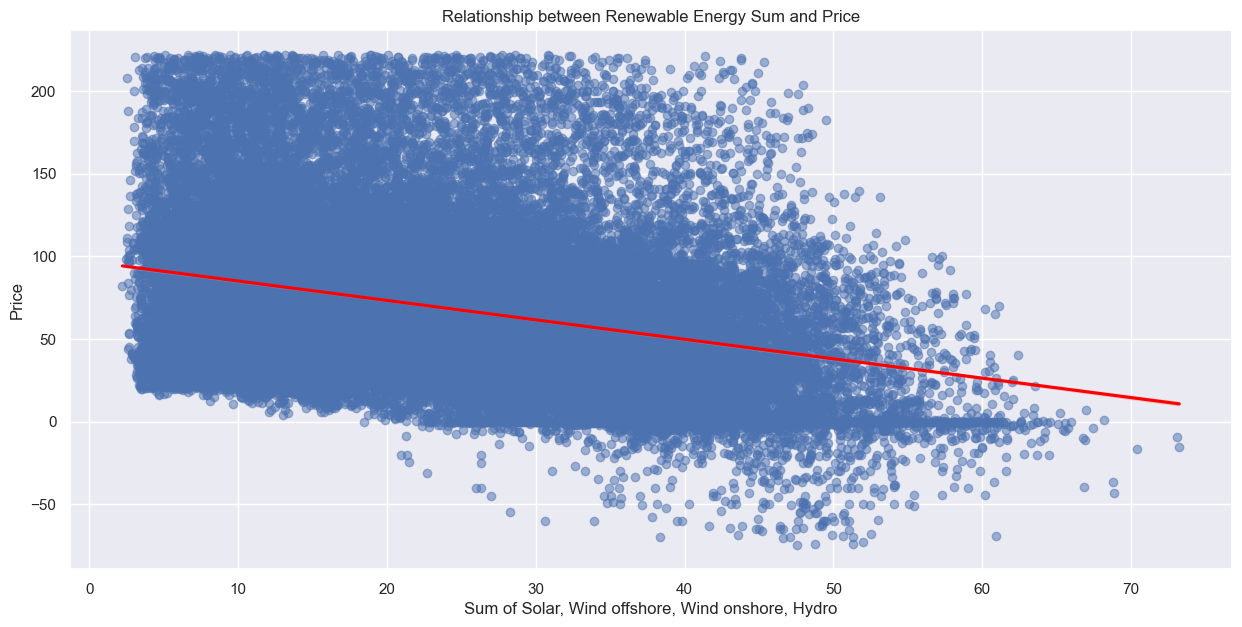

(-0.2958963240302657, 1.1102230246251565e-16)

In [35]:
price_df = pd.read_csv("../data/day_ahead_energy_prices.csv")
price_df.rename(columns={"Datetime": "Timestamp", "hourly day-ahead energy price": "Price"}, inplace=True)

min_price = -74.44
max_price = 222.01

# Filter the dataframe to remove rows with energy prices outside the range
price_df = price_df[
    (price_df['Price'] >= min_price) &
    (price_df['Price'] <= max_price)
]

energy_mix_df = pd.read_csv("../data/hourly_market_mix_delta_abs.csv")
# Merge datasets on timestamp
merged_df = pd.merge(energy_mix_df, price_df, on='Timestamp', how='inner')

# Set the Timestamp column as the index
merged_df.set_index('Timestamp', inplace=True)

# Calculate the sum of the specified columns
min_price = -74.44
max_price = 222.01

# Filter the dataframe to remove rows with energy prices outside the range
merged_df = merged_df[
    (merged_df['Price'] >= min_price) &
    (merged_df['Price'] <= max_price)
]

merged_df['Renewable_Sum'] = merged_df[['Solar', 'Wind offshore', 'Wind onshore', 'Hydro']].sum(axis=1)
# Plot the relationship with a correlation line
plt.figure(figsize=(15, 7))
sns.regplot(x='Renewable_Sum', y='Price', data=merged_df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Relationship between Renewable Energy Sum and Price')
plt.xlabel('Sum of Solar, Wind offshore, Wind onshore, Hydro')
plt.ylabel('Price')
plt.grid(True)
plt.show()


from scipy.stats import pearsonr



r, p_two_tailed = pearsonr(merged_df[['Solar', 'Wind offshore', 'Wind onshore', 'Hydro']].sum(axis=1), merged_df['Price'])

if p_two_tailed == 0.0:
    p_two_tailed = np.finfo(float).eps  # Assign the smallest positive float value

p_one_tailed = p_two_tailed / 2

r,  p_one_tailed

## Null-hypothesis - There exist no inverse relationship between Renewable energy sources (solar, wind onshore, wind offshore) and next-day energy prices

### Veworfen due to significant inverse relationship p < 0.05

## r = -0.312
The correlation coefficient of -0.312 suggests a moderate negative correlation between the summed renewable energy production (Solar, Wind offshore, Wind onshore, Hydro) and the Price variable.
This means that as renewable energy generation increases, energy prices tend to decrease, albeit with some variability.
The magnitude of the correlation (around 0.3) indicates a moderate linear relationship, but it's not very strong.

## One-Tailed p-value (1.11e-16)
The extremely small p-value (essentially zero within numerical precision limits) suggests that the observed negative correlation is highly statistically significant.
In practical terms, this means that the probability of obtaining such a correlation by random chance under the null hypothesis (that there is no correlation) is virtually zero.
Since the p-value is much smaller than common significance levels (e.g., 0.05, 0.01, 0.001), you can reject the null hypothesis and conclude that the negative relationship between renewable energy generation and prices is statistically significant.

## Practical Interpretation:
The negative correlation suggests that an increase in renewable energy production (solar, wind, hydro) could be associated with lower electricity prices. This aligns with expectations, as renewable energy sources typically have lower marginal costs compared to fossil fuels, which can lead to lower market prices when their availability is high.
However, the moderate strength of the correlation (r = -0.312) indicates that while the relationship exists, other factors (e.g., demand fluctuations, fossil fuel prices, regulatory policies) also play a significant role in determining energy prices.